## 1. Import Libraries
We start by importing the required Python libraries used throughout this notebook.

In [464]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  

## 2. Load the Datasets
Here, we read the inventory and order datasets for analysis.

In [465]:
inv = pd.read_csv(r"C:\Users\DELL\Desktop\Sem 2\Intro to Data Sciences\Project\inventory.csv" , encoding='ISO-8859-1')  # Load inventory data from CSV
df = pd.read_csv(r"C:\Users\DELL\Desktop\Sem 2\Intro to Data Sciences\Project\orders_and_shipments.csv", encoding='ISO-8859-1')  # Load orders and shipments data from CSV
df.head()  # Show first few rows of the dataframe

Order ID    Order Item ID    Order YearMonth    Order Year   \
0        3535             8793             201502          2015   
1        4133            10320             201503          2015   
2        7396            18517             201504          2015   
3       11026            27608             201506          2015   
4       11026            27609             201506          2015   

    Order Month    Order Day  Order Time  Order Quantity Product Department  \
0              2           21      14:07               1           Fan Shop   
1              3            2      07:37               1           Fan Shop   
2              4           18      22:47               1           Fan Shop   
3              6           10      22:32               1           Fan Shop   
4              6           10      22:32               1           Fan Shop   

  Product Category  ... Customer Country  Warehouse Country Shipment Year  \
0          Fishing  ...           Mexico        Puerto Rico          2015   
1          Fishing  ...           Brazil        Puerto Rico          2015   
2          Fishing  ...           Mexico        Puerto Rico          2015   
3          Fishing  ...          Denmark        Puerto Rico          2015   
4          Fishing  ...          Denmark        Puerto Rico          2015   

  Shipment Month Shipment Day   Shipment Mode   Shipment Days - Scheduled   \
0              2           27  Standard Class                            4   
1              3            6  Standard Class                            4   
2              4           20  Standard Class                            4   
3              6           12  Standard Class                            4   
4              6           12  Standard Class                            4   

    Gross Sales    Discount %   Profit   
0            400          0.25      200  
1            400          0.09      200  
2            400          0.06      200  
3            400          0.15      200  
4            400          0.13      200  

[5 rows x 24 columns]

In [466]:
print(df.columns)  # Display all column names

Index([' Order ID ', ' Order Item ID ', ' Order YearMonth ', ' Order Year ',
       ' Order Month ', ' Order Day ', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name',
       ' Customer ID ', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       ' Shipment Days - Scheduled ', ' Gross Sales ', ' Discount % ',
       ' Profit '],
      dtype='object')


In [467]:
print(df.shape)  # Print number of rows and columns

(30871, 24)


## 3. Data Quality Check
We identify missing and duplicate values that could affect our analysis.

In [468]:
df.isnull().sum()  # Check for missing values in each column

 Order ID                      0
 Order Item ID                 0
 Order YearMonth               0
 Order Year                    0
 Order Month                   0
 Order Day                     0
Order Time                     0
Order Quantity                 0
Product Department             0
Product Category               0
Product Name                   0
 Customer ID                   0
Customer Market                0
Customer Region                0
Customer Country               0
Warehouse Country              0
Shipment Year                  0
Shipment Month                 0
Shipment Day                   0
Shipment Mode                  0
 Shipment Days - Scheduled     0
 Gross Sales                   0
 Discount %                    0
 Profit                        0
dtype: int64

In [469]:
df.duplicated().sum()  # Check for duplicate rows

0

In [470]:
for col in df.columns:  # Display all column names
    df.loc[df.sample(frac=0.1).index, col] = np.nan  # Randomly introduce missing values (used for testing cleaning logic)

In [471]:
df.isnull().sum()  # Check for missing values in each column

 Order ID                      3087
 Order Item ID                 3087
 Order YearMonth               3087
 Order Year                    3087
 Order Month                   3087
 Order Day                     3087
Order Time                     3087
Order Quantity                 3087
Product Department             3087
Product Category               3087
Product Name                   3087
 Customer ID                   3087
Customer Market                3087
Customer Region                3087
Customer Country               3087
Warehouse Country              3087
Shipment Year                  3087
Shipment Month                 3087
Shipment Day                   3087
Shipment Mode                  3087
 Shipment Days - Scheduled     3087
 Gross Sales                   3087
 Discount %                    3087
 Profit                        3087
dtype: int64

In [472]:
df = df.bfill().ffill()

In [473]:
df.isnull().sum()  # Check for missing values in each column

 Order ID                      0
 Order Item ID                 0
 Order YearMonth               0
 Order Year                    0
 Order Month                   0
 Order Day                     0
Order Time                     0
Order Quantity                 0
Product Department             0
Product Category               0
Product Name                   0
 Customer ID                   0
Customer Market                0
Customer Region                0
Customer Country               0
Warehouse Country              0
Shipment Year                  0
Shipment Month                 0
Shipment Day                   0
Shipment Mode                  0
 Shipment Days - Scheduled     0
 Gross Sales                   0
 Discount %                    0
 Profit                        0
dtype: int64

# Remove Spaces From the column Names

In [474]:
df.columns = df.columns.str.strip()  # Display all column names

In [475]:
print(df.columns)  # Display all column names

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')


In [476]:
print(df.shape)  # Print number of rows and columns

(30871, 24)


In [477]:
# Convert columns to int64 (handle NaNs first)
int_columns = [
    "Order ID", "Order Item ID", "Order Year", "Order Month", "Order Day",
    "Order Quantity", "Customer ID", "Shipment Year", "Shipment Month", "Shipment Day",
    "Shipment Days - Scheduled", "Gross Sales", "Profit"
]

for col in int_columns:
    df[col] = df[col].fillna(0).astype(int)

In [478]:
print(df.dtypes)

Order ID                       int32
Order Item ID                  int32
Order YearMonth              float64
Order Year                     int32
Order Month                    int32
Order Day                      int32
Order Time                    object
Order Quantity                 int32
Product Department            object
Product Category              object
Product Name                  object
Customer ID                    int32
Customer Market               object
Customer Region               object
Customer Country              object
Warehouse Country             object
Shipment Year                  int32
Shipment Month                 int32
Shipment Day                   int32
Shipment Mode                 object
Shipment Days - Scheduled      int32
Gross Sales                    int32
Discount %                    object
Profit                         int32
dtype: object


In [479]:
print(df.shape)  # Print number of rows and columns

(30871, 24)


# Concatenate Year, Month and day of Order and Shipment Features using datetime to have 2 addition new Features which are Order Date and Shipment Date

In [480]:
df["Order Date"] = pd.to_datetime(
    df[["Order Year", "Order Month", "Order Day"]].astype(str).agg("-".join, axis=1),
    errors="coerce"
)
df["Shipment Date"] = pd.to_datetime(
    df[["Shipment Year", "Shipment Month", "Shipment Day"]].astype(str).agg("-".join, axis=1),
    errors="coerce"
)

df[["Order Date", "Shipment Date"]].head()

Order Date Shipment Date
0 2015-02-21    2015-02-27
1 2015-03-02    2015-04-06
2 2015-06-18    2015-04-20
3 2015-06-10    2015-06-12
4 2015-06-10    2015-06-12

# Drop Unnecessary Columns Like Order YearMonth

In [481]:
df.columns  # Display all column names

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit', 'Order Date', 'Shipment Date'],
      dtype='object')

In [482]:
df = df.drop(columns=['Order YearMonth'])
df = df.drop(columns=['Order Year', 'Order Month', 'Order Day'])
df = df.drop(columns=['Shipment Year', 'Shipment Month', 'Shipment Day'])

In [483]:
df.columns  # Display all column names

Index(['Order ID', 'Order Item ID', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Order Date', 'Shipment Date'],
      dtype='object')

# Add a 'Product ID' column. Calculate delivery delays by comparing 'Shipment Date' and 'Order Date' while considering scheduled shipment days. Identify if an order is delayed, including same-day shipments. Set negative delays to 0. Finally, test the results.

In [484]:
print(df.shape)  # Print number of rows and columns

(30871, 19)


In [485]:
# Create 'Product ID' column as a unique identifier for each product (if missing)
df["Product ID"] = df["Order ID"].astype(str) + "-" + df["Order Item ID"].astype(str)

# Calculate the difference in days between Shipment Date and Order Date
df["Delivery Days"] = (df["Shipment Date"] - df["Order Date"]).dt.days

# Create 'IsDelayed' column based on the given conditions
df["IsDelayed"] = (df["Delivery Days"] > df["Shipment Days - Scheduled"]) | \
                  ((df["Shipment Mode"] == "Same Day") & (df["Delivery Days"] > 0))

# Create 'Delays' column to store the actual number of delayed days
df["Delays"] = df["Delivery Days"] - df["Shipment Days - Scheduled"]

# Set negative delays to 0 (as they are not delayed)
df["Delays"] = df["Delays"].apply(lambda x: x if x > 0 else 0)

# Show the first few rows after adding new columns
df

Order ID  Order Item ID Order Time  Order Quantity Product Department  \
0          3535           8793      14:07               1           Fan Shop   
1          4133          10320      07:37               1           Fan Shop   
2          7396          18517      22:47               1           Fan Shop   
3         11026          27609      22:32               1           Fan Shop   
4         11026          27609      22:32               1           Fan Shop   
...         ...            ...        ...             ...                ...   
30866     73246         176561      04:59               1           Fan Shop   
30867      7908          19762      10:10               1           Fan Shop   
30868     29326          73368      01:51               1           Fan Shop   
30869     63308         158284      03:15               1           Fan Shop   
30870     67951         169874      21:54               1           Fan Shop   

         Product Category                               Product Name  \
0                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
1                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
2                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
3                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
4                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
...                   ...                                        ...   
30866  Hunting & Shooting                                       Toys   
30867  Hunting & Shooting                   ENO Atlas Hammock Straps   
30868  Hunting & Shooting                   ENO Atlas Hammock Straps   
30869  Hunting & Shooting           insta-bed Neverflat Air Mattress   
30870        Water Sports                Pelican Maverick 100X Kayak   

       Customer ID Customer Market  Customer Region  ...  \
0             7840           LATAM  Central America  ...   
1            10866           LATAM  Northern Europe  ...   
2            10866          Europe  Northern Europe  ...   
3             3576          Europe  Northern Europe  ...   
4             3576          Europe  Northern Europe  ...   
...            ...             ...              ...  ...   
30866        16799    Pacific Asia          Oceania  ...   
30867        11950           LATAM    South America  ...   
30868         8161    Pacific Asia       South Asia  ...   
30869         5733          Europe   Western Europe  ...   
30870         5733          Europe  Southern Europe  ...   

      Shipment Days - Scheduled Gross Sales Discount %  Profit  Order Date  \
0                             4         400       0.25     200  2015-02-21   
1                             4         400       0.09     200  2015-03-02   
2                             4         400       0.06     200  2015-06-18   
3                             4         400       0.15     200  2015-06-10   
4                             4         400       0.13     200  2015-06-10   
...                         ...         ...        ...     ...         ...   
30866                         4          12       0.06       6  2017-12-05   
30867                         4          30       0.12      68  2015-03-26   
30868                         2          30       0.09      68  2016-03-04   
30869                         2         150       0.02      60  2017-07-13   
30870                         1         350        -       172  2017-09-18   

      Shipment Date    Product ID Delivery Days IsDelayed Delays  
0        2015-02-27     3535-8793           6.0      True    2.0  
1        2015-04-06    4133-10320          35.0      True   31.0  
2        2015-04-20    7396-18517         -59.0     False    0.0  
3        2015-06-12   11026-27609           2.0     False    0.0  
4        2015-06-12   11026-27609           2.0     False    0.0  
...             ...           ...           ...       ...    ...  
30866    2017-12-30  73246-176561          25.0      T

In [486]:
print(df.shape)  # (rows, columns)  # Print number of rows and columns

(30871, 23)


In [487]:
def get_filtered_data(df):
    return df[["Order Date", "Shipment Date", "Shipment Mode",
               "Shipment Days - Scheduled","Order Time", "IsDelayed", "Delays"]].head(50)

get_filtered_data(df)

Order Date Shipment Date   Shipment Mode  Shipment Days - Scheduled  \
0  2015-02-21    2015-02-27  Standard Class                          4   
1  2015-03-02    2015-04-06  Standard Class                          4   
2  2015-06-18    2015-04-20  Standard Class                          4   
3  2015-06-10    2015-06-12  Standard Class                          4   
4  2015-06-10    2015-06-12  Standard Class                          4   
5  2015-06-10    2015-06-12  Standard Class                          4   
6  2015-10-09    2015-10-13  Standard Class                          4   
7  2015-10-13    2015-10-15  Standard Class                          4   
8  2015-11-06    2015-11-12  Standard Class                          4   
9  2015-11-15    2015-11-17  Standard Class                          4   
10 2015-11-16    2015-11-18  Standard Class                          4   
11 2015-12-11    2015-12-07  Standard Class                          4   
12 2016-01-05    2016-01-07  Standard Class                          4   
13 2016-02-04    2016-02-06  Standard Class                          4   
14 2016-02-07    2016-02-15  Standard Class                          4   
15 2016-03-09    2016-03-15  Standard Class                          4   
16 2016-05-08    2016-05-10  Standard Class                          4   
17 2016-05-08    2016-05-10  Standard Class                          4   
18 2016-06-03    2016-06-07  Standard Class                          4   
19 2016-06-29    2016-07-05  Standard Class                          4   
20 2016-06-29    2016-07-06  Standard Class                          4   
21 2016-07-02    2016-07-06  Standard Class                          4   
22 2016-08-06    2016-08-08  Standard Class                          4   
23 2016-08-06    2016-08-08  Standard Class                          4   
24 2016-08-24    2016-09-30  Standard Class                          4   
25 2016-09-23    2016-09-25  Standard Class                          4   
26 2016-09-28    2016-10-02  Standard Class                          4   
27 2016-09-28    2016-12-02  Standard Class                          4   
28 2016-12-20    2016-12-26  Standard Class                          4   
29 2016-12-24    2016-12-28  Standard Class                          4   
30 2016-12-24    2016-12-28  Standard Class                          4   
31 2017-02-26    2017-02-23  Standard Class                          4   
32 2017-03-26    2017-03-30  Standard Class                          4   
33 2017-05-16    2017-05-14  Standard Class                          4   
34 2017-05-16    2017-05-18  Standard Class                          4   
35 2017-05-16    2017-05-18  Standard Class                          4   
36 2017-07-16    2017-07-20  Standard Class                          4   
37 2017-07-16    2017-07-20  Standard Class                          4   
38 2017-07-17    2017-07-23  Standard Class                          4   
39 2017-07-17    2017-07-19  Standard Class                          4   
40 2017-07-17    2017-07-24  Standard Class                          4   
41 2017-09-17    2017-09-21  Standard Class                          4   
42 2017-09-17    2017-09-21  Standard Class                          3   
43 2015-04-13    2015-04-13        Same Day                          3   
44 2015-04-28    2015-05-04        Same Day                          3   
45 2015-06-27    2015-06-17    Second Class                          2   
46 2015-10-27    2015-10-06    Second Class                          2   
47 2017-07-02    2017-07-06        Same Day                          3   
48 2017-08-18    2017-08-24     First Class                          1   
49 2015-03-04    2015-03-05     First Class                          1   

   Order Time  IsDelayed  Delays  
0       14:07       True     2.0  
1       07:37       True    31.0  
2       22:47      False     0.0  
3       22:32      False     0.0  
4       22:32      False     0.0  
5       22:32     

In [488]:
print(df.shape)  # (rows, columns)  # Print number of rows and columns

(30871, 23)


# Filter data where Order Date is Greater than Shipment Date. Also Dropping records

# Also Dropping all records with missing Values and Duplicates in the DataSet and resetting index after cleaning

In [489]:
# Filter rows where Order Date is greater than Shipment Date
invalid_dates = df[df["Order Date"] > df["Shipment Date"]]

# Display the result
invalid_dates

Order ID  Order Item ID Order Time  Order Quantity Product Department  \
2          7396          18517      22:47               1           Fan Shop   
11        23578          58984      04:04               1           Fan Shop   
31        53626         139664      19:13               1           Fan Shop   
33        59071         147842      06:51               1           Fan Shop   
45         7725          19313      12:22               1           Fan Shop   
...         ...            ...        ...             ...                ...   
30809     49375         123412      17:54               1           Fan Shop   
30813      8938          22290      01:33               1           Fan Shop   
30814      9185          22927      01:33               1           Fan Shop   
30822     49818         124544      05:06               1           Fan Shop   
30829     65666         164104      13:22               1           Fan Shop   

           Product Category                               Product Name  \
2                   Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
11                  Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
31                  Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
33                  Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
45                  Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
...                     ...                                        ...   
30809  Indoor/Outdoor Games           O'Brien Men's Neoprene Life Vest   
30813  Indoor/Outdoor Games           O'Brien Men's Neoprene Life Vest   
30814  Indoor/Outdoor Games           O'Brien Men's Neoprene Life Vest   
30822  Indoor/Outdoor Games           O'Brien Men's Neoprene Life Vest   
30829  Indoor/Outdoor Games           O'Brien Men's Neoprene Life Vest   

       Customer ID Customer Market  Customer Region  ...  \
2            10866          Europe  Northern Europe  ...   
11            1577    Pacific Asia       South Asia  ...   
31           10401           LATAM  Central America  ...   
33             667           LATAM    South America  ...   
45            7223           LATAM    South America  ...   
...            ...             ...              ...  ...   
30809         7177          Europe      West Africa  ...   
30813         6671           LATAM    South America  ...   
30814         5310           LATAM    South America  ...   
30822         5519          Africa   Central Africa  ...   
30829         5229          Europe  Southern Europe  ...   

      Shipment Days - Scheduled Gross Sales Discount %  Profit  Order Date  \
2                             4         400       0.06     200  2015-06-18   
11                            4         400       0.05     200  2015-12-11   
31                            4         400       0.07     200  2017-02-26   
33                            4         400       0.17     200  2017-05-16   
45                            2         400        0.1     200  2015-06-27   
...                         ...         ...        ...     ...         ...   
30809                         1          50       0.13     125  2016-12-30   
30813                         4          50       0.13     125  2015-09-11   
30814                         4          50        0.1     125  2015-09-15   
30822                         4          50       0.25     125  2017-12-28   
30829                         4          50        0.2     125  2017-09-16   

      Shipment Date    Product ID Delivery Days IsDelayed Delays  
2        2015-04-20    7396-18517         -59.0     False    0.0  
11       2015-12-07   23578-58984          -4.0     False    0.0  
31       2017-02-23  53626-139664          -3.0     False    0.0  
33       2017-05-14  59071-147842          -2.0     False    0.0  
45       2015-06-17    7725-19313         -10.0     False    0.0  
...             ...           ...           ...       ...    ...  
30809    2016-12-01  49375-123

In [490]:
print(df.shape)  # Print number of rows and columns

(30871, 23)


In [491]:
# Remove rows where Order Date is greater than Shipment Date
df = df[df["Order Date"] <= df["Shipment Date"]]

# Drop rows with missing values
df = df.dropna()

# Drop duplicate rows if any
df = df.drop_duplicates()

# Reset index after cleaning
df = df.reset_index(drop=True)

In [492]:
print(df.shape)  # (rows, columns)  # Print number of rows and columns

(24781, 23)


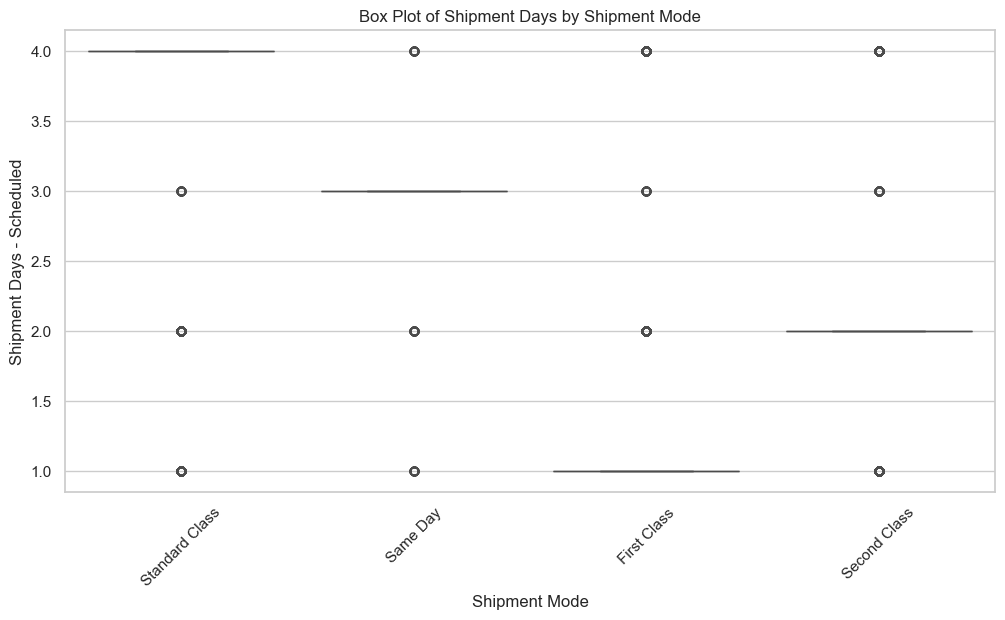

In [493]:
import seaborn as sns  # Load required libraries
import matplotlib.pyplot as plt  # Load required libraries

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Shipment Mode"], y=df["Shipment Days - Scheduled"])
plt.xlabel("Shipment Mode")
plt.ylabel("Shipment Days - Scheduled")
plt.title("Box Plot of Shipment Days by Shipment Mode")
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\462731863.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




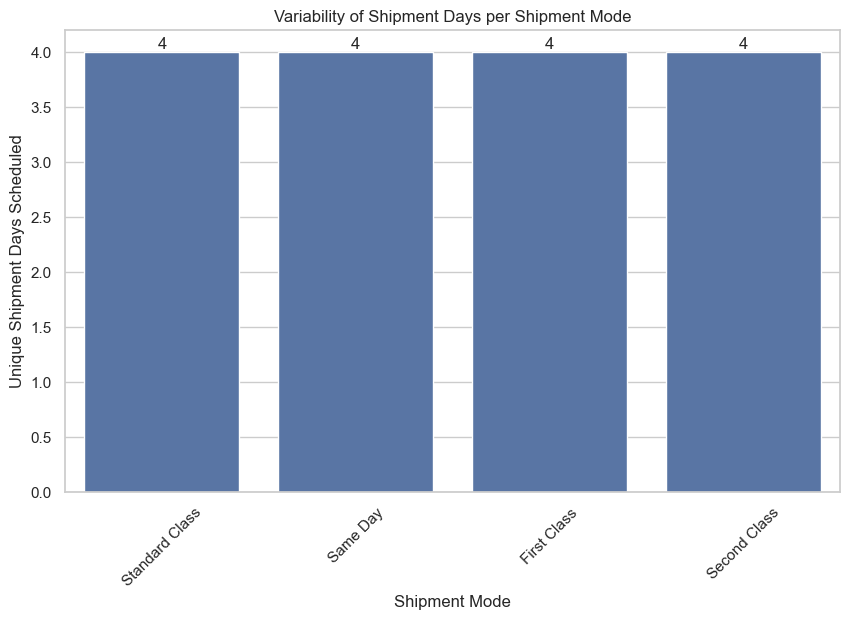

In [494]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Count the occurrences of each Shipment Days - Scheduled for each Shipment Mode
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Shipment Mode", y="Shipment Days - Scheduled", data=df, estimator=lambda x: len(set(x)), ci=None)

# Add data labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Labels and title
plt.xlabel("Shipment Mode")
plt.ylabel("Unique Shipment Days Scheduled")
plt.title("Variability of Shipment Days per Shipment Mode")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [495]:
print(df.shape)  # (rows, columns)  # Print number of rows and columns

(24781, 23)


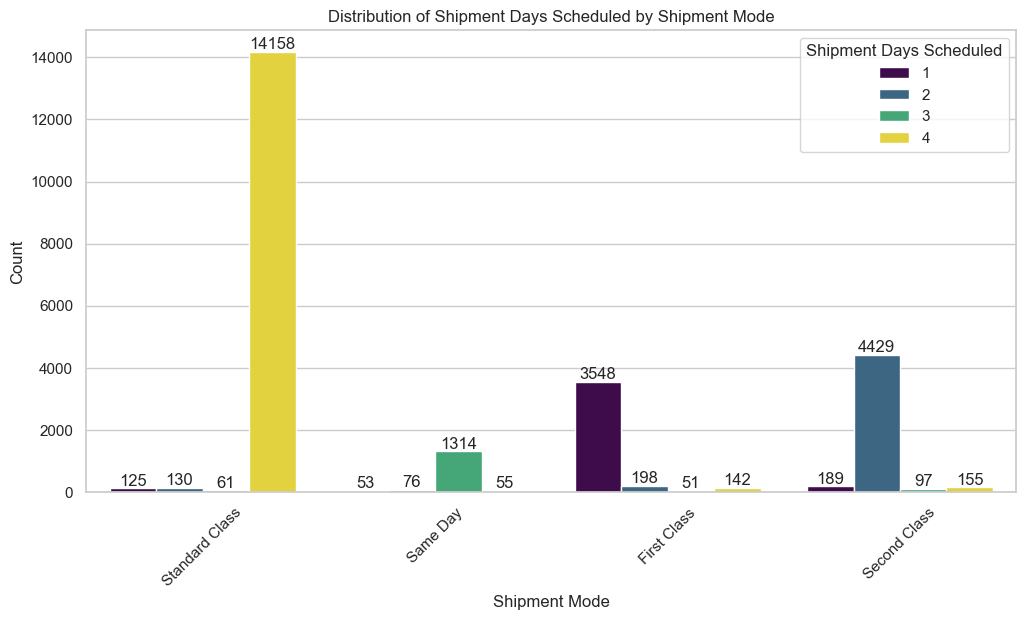

In [496]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart showing the count of each shipment days scheduled per shipment mode
sns.countplot(x="Shipment Mode", hue="Shipment Days - Scheduled", data=df, palette="viridis")

# Add count labels
ax = plt.gca()  # Get current Axes
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )

# Labels and title
plt.xlabel("Shipment Mode")
plt.ylabel("Count")
plt.title("Distribution of Shipment Days Scheduled by Shipment Mode")
plt.xticks(rotation=45)

# Show the legend
plt.legend(title="Shipment Days Scheduled")

# Show the plot
plt.show()

In [497]:
# Group by Shipment Mode and get unique Shipment Days - Scheduled
shipment_mode_variability = df.groupby("Shipment Mode")["Shipment Days - Scheduled"].unique()

# Convert to DataFrame for better visualization
shipment_mode_variability = shipment_mode_variability.reset_index()

# Display results
print(shipment_mode_variability)

    Shipment Mode Shipment Days - Scheduled
0     First Class              [1, 2, 4, 3]
1        Same Day              [3, 2, 4, 1]
2    Second Class              [2, 1, 3, 4]
3  Standard Class              [4, 3, 1, 2]


In [498]:
print(df.shape)  # (rows, columns)  # Print number of rows and columns

(24781, 23)


In [499]:
df["Order Year"] = df["Order Date"].dt.year
df["Shipment Year"] = df["Shipment Date"].dt.year

# Function to detect outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in Order Year and Shipment Year
outliers_order_year = find_outliers(df, "Order Year")
outliers_shipment_year = find_outliers(df, "Shipment Year")

# Print detected outliers
print("Outliers in Order Year:\n", outliers_order_year)
print("Outliers in Shipment Year:\n", outliers_shipment_year)

Outliers in Order Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, Delivery Days, IsDelayed, Delays, Order Year, Shipment Year]
Index: []

[0 rows x 25 columns]
Outliers in Shipment Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, Delivery Days, IsDelayed, Delays, Order Year, Shipment Year]
Index: []

[0 rows x 25 columns]


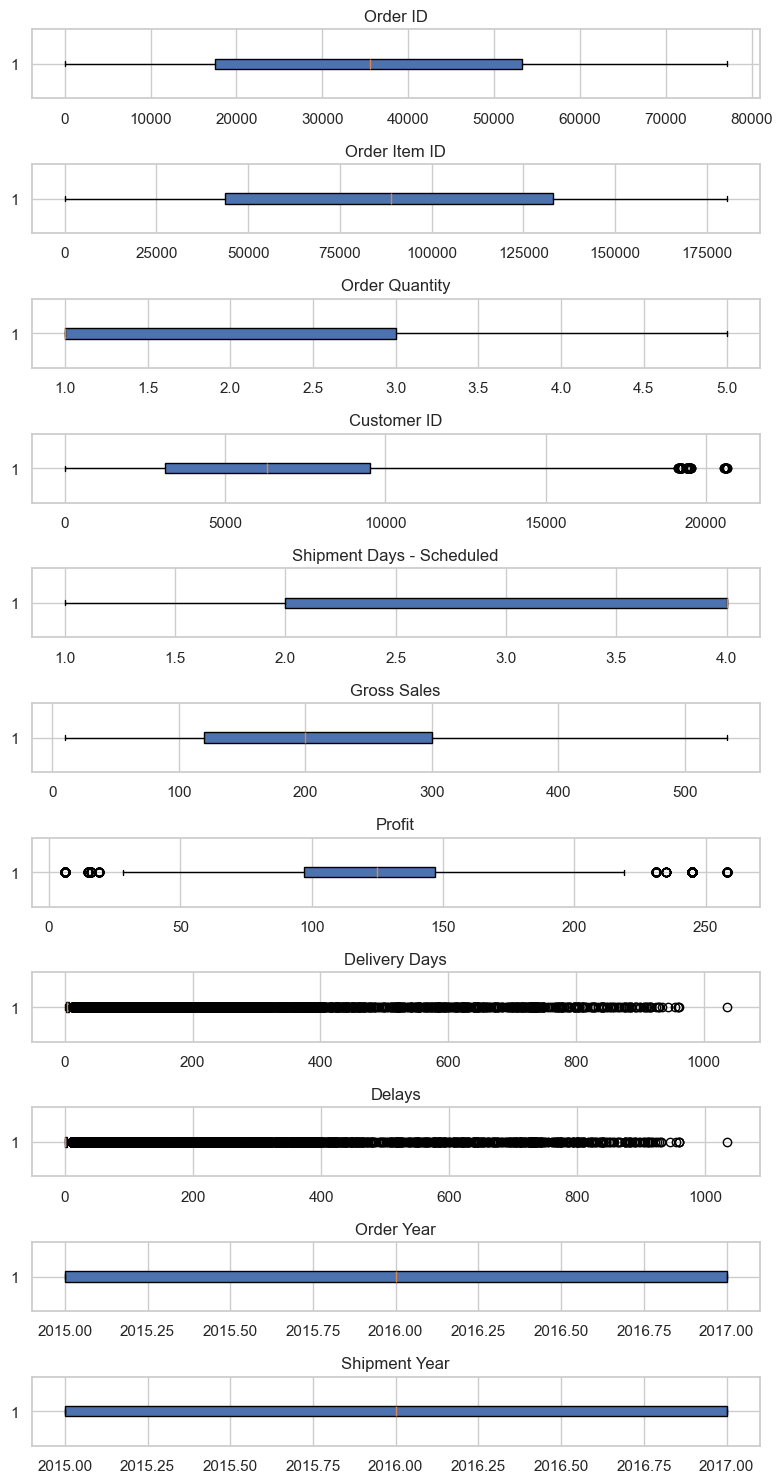

In [500]:
import matplotlib.pyplot as plt  # Load required libraries

# Selecting only numerical columns
numeric_cols = df.select_dtypes(include=['number'])

# Creating subplots for better readability
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), figsize=(8, 15))  # Display all column names

# Plot each column separately
for i, col in enumerate(numeric_cols.columns):  # Display all column names
    axes[i].boxplot(df[col], vert=False, patch_artist=True)
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()  # Adjust layout for better visibility
plt.show()

In [501]:
df = df.drop(columns=['Delivery Days'])

In [502]:
df = df[df["Shipment Mode"] != "Same Day"]

# Display the updated DataFrame
print(df)

       Order ID  Order Item ID Order Time  Order Quantity Product Department  \
0          3535           8793      14:07               1           Fan Shop   
1          4133          10320      07:37               1           Fan Shop   
2         11026          27609      22:32               1           Fan Shop   
3         11026          27609      22:32               1           Fan Shop   
4         11026          27607      22:32               1           Fan Shop   
...         ...            ...        ...             ...                ...   
24776     73246         176561      04:59               1           Fan Shop   
24777      7908          19762      10:10               1           Fan Shop   
24778     29326          73368      01:51               1           Fan Shop   
24779     63308         158284      03:15               1           Fan Shop   
24780     67951         169874      21:54               1           Fan Shop   

         Product Category              

In [503]:
print(df.shape)  # Print number of rows and columns

(23283, 24)


C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\788791937.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




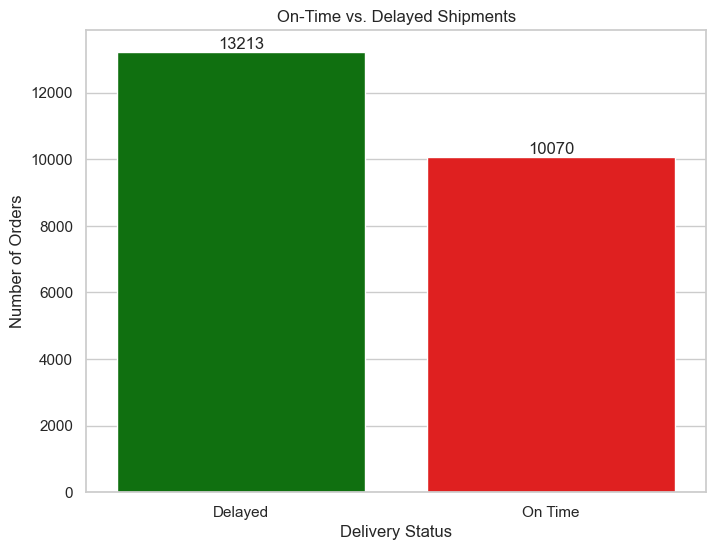

In [504]:
# Categorize shipments as 'On Time' or 'Delayed'
df["Delay Category"] = df["Delays"].apply(lambda x: "On Time" if x == 0 else "Delayed")

# Count occurrences
delay_counts = df["Delay Category"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=delay_counts.index, y=delay_counts.values, palette=["green", "red"])

# Add count labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.title("On-Time vs. Delayed Shipments")
plt.show()

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23283 entries, 0 to 24780
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order ID                   23283 non-null  int32         
 1   Order Item ID              23283 non-null  int32         
 2   Order Time                 23283 non-null  object        
 3   Order Quantity             23283 non-null  int32         
 4   Product Department         23283 non-null  object        
 5   Product Category           23283 non-null  object        
 6   Product Name               23283 non-null  object        
 7   Customer ID                23283 non-null  int32         
 8   Customer Market            23283 non-null  object        
 9   Customer Region            23283 non-null  object        
 10  Customer Country           23283 non-null  object        
 11  Warehouse Country          23283 non-null  object        
 12  Shipment 

In [506]:
# Calculate quartiles and IQR for Order Date and Shipment Date
Q1_order = df["Order Date"].quantile(0.25)
Q3_order = df["Order Date"].quantile(0.75)
IQR_order = Q3_order - Q1_order

Q1_shipment = df["Shipment Date"].quantile(0.25)
Q3_shipment = df["Shipment Date"].quantile(0.75)
IQR_shipment = Q3_shipment - Q1_shipment

# Define outlier thresholds
lower_bound_order = Q1_order - 1.5 * IQR_order
upper_bound_order = Q3_order + 1.5 * IQR_order

lower_bound_shipment = Q1_shipment - 1.5 * IQR_shipment
upper_bound_shipment = Q3_shipment + 1.5 * IQR_shipment

# Identify outliers
outliers_order = df[(df["Order Date"] < lower_bound_order) | (df["Order Date"] > upper_bound_order)]
outliers_shipment = df[(df["Shipment Date"] < lower_bound_shipment) | (df["Shipment Date"] > upper_bound_shipment)]

Q1_order, Q3_order, IQR_order, lower_bound_order, upper_bound_order, len(outliers_order), \
Q1_shipment, Q3_shipment, IQR_shipment, lower_bound_shipment, upper_bound_shipment, len(outliers_shipment)

(Timestamp('2015-08-22 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timedelta('525 days 00:00:00'),
 Timestamp('2013-06-25 12:00:00'),
 Timestamp('2019-03-26 12:00:00'),
 0,
 Timestamp('2015-10-13 00:00:00'),
 Timestamp('2017-03-16 00:00:00'),
 Timedelta('520 days 00:00:00'),
 Timestamp('2013-08-24 00:00:00'),
 Timestamp('2019-05-05 00:00:00'),
 0)

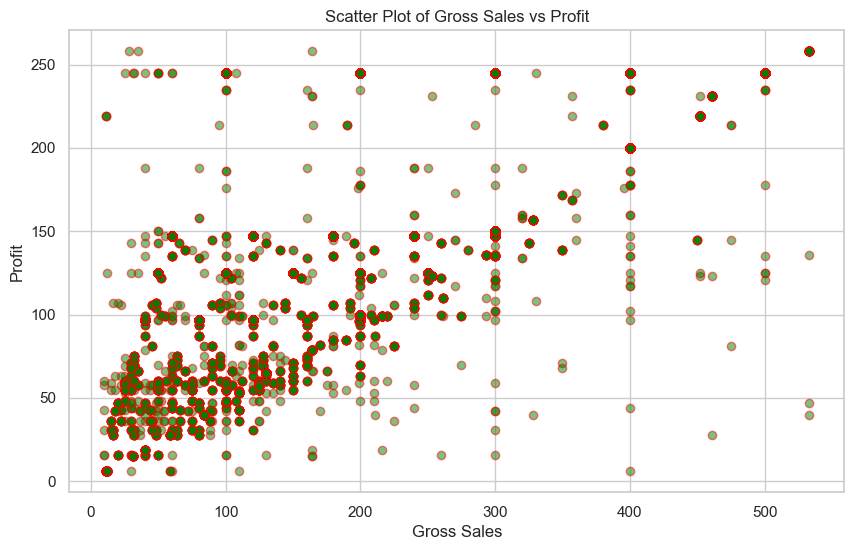

In [507]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Gross Sales"], df["Profit"], alpha=0.5, c="green", edgecolors="red")
plt.xlabel("Gross Sales")
plt.ylabel("Profit")
plt.title("Scatter Plot of Gross Sales vs Profit")
plt.grid(True)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\1382153577.py:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



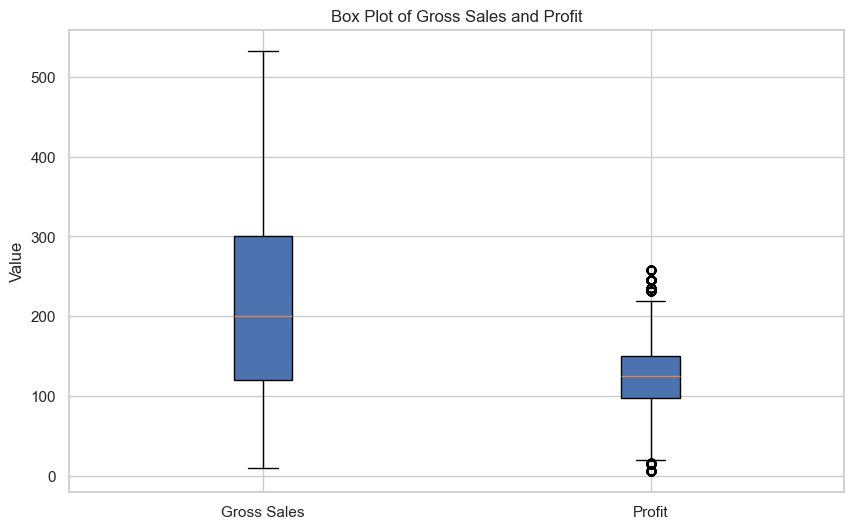

In [508]:
plt.figure(figsize=(10, 6))

# Creating a box plot for Gross Sales and Profit
plt.boxplot([df["Gross Sales"], df["Profit"]], labels=["Gross Sales", "Profit"], patch_artist=True)

# Titles and labels
plt.title("Box Plot of Gross Sales and Profit")
plt.ylabel("Value")
plt.grid(True)

# Show the plot
plt.show()

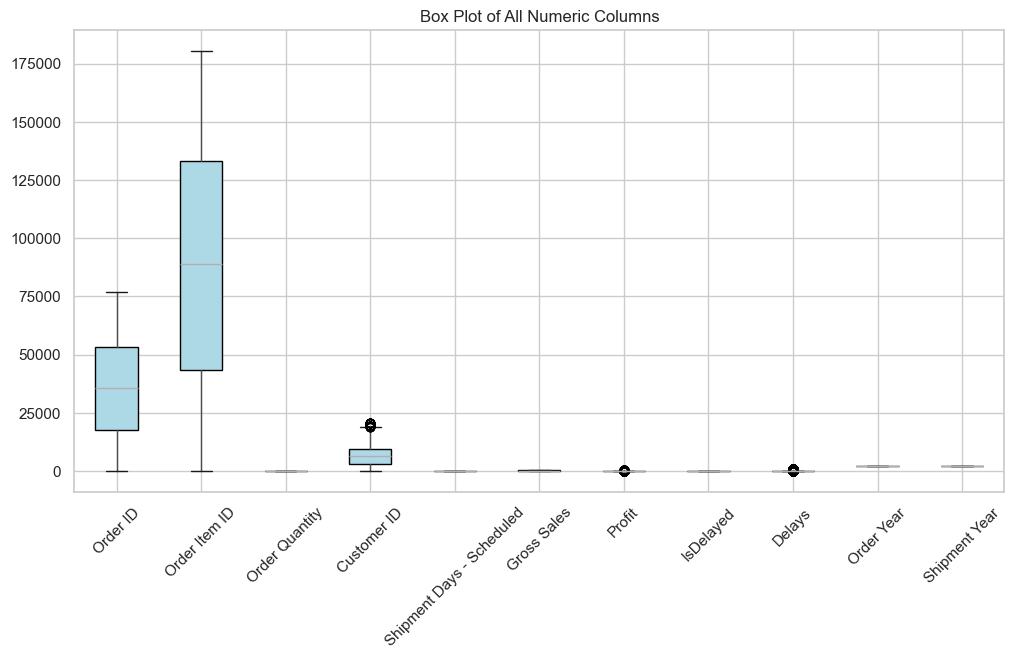

In [509]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of All Numeric Columns")
plt.grid(True)
plt.show()

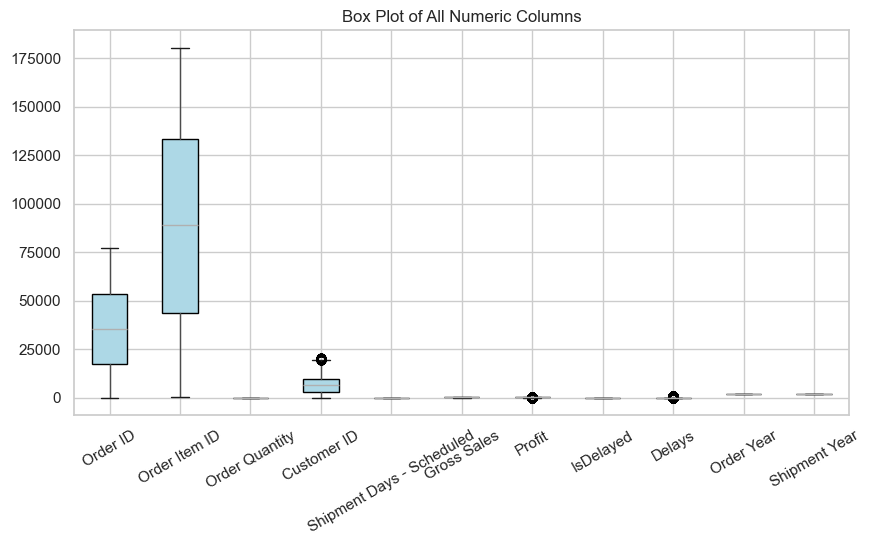

In [510]:
plt.figure(figsize=(10, 5))  # Adjust figure size
df.boxplot(rot=30, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of All Numeric Columns")
plt.grid(True)
plt.show()

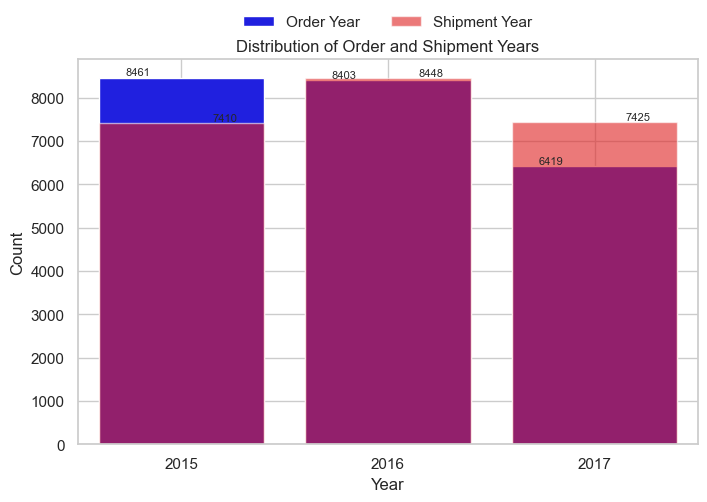

In [511]:
plt.figure(figsize=(8, 5))

# Count plot for Order Year
sns.countplot(x=df["Order Year"], color='blue', label="Order Year")

# Count plot for Shipment Year
sns.countplot(x=df["Shipment Year"], color='red', label="Shipment Year", alpha=0.6)

# Add count labels to the left and right of overlapping bars
ax = plt.gca()
bar_positions = {}

for bar in ax.patches:
    x_center = round(bar.get_x() + bar.get_width() / 2, 2)
    height = bar.get_height()

    if x_center in bar_positions:
        # Second bar: shift text to the right
        ax.text(
            x_center + 0.15,
            height,
            f'{int(height)}',
            ha='left',
            va='bottom',
            fontsize=8
        )
    else:
        # First bar: shift text to the left
        ax.text(
            x_center - 0.15,
            height,
            f'{int(height)}',
            ha='right',
            va='bottom',
            fontsize=8
        )
        bar_positions[x_center] = True

plt.title("Distribution of Order and Shipment Years")
plt.xlabel("Year")
plt.ylabel("Count")

# Move legend above the plot
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False
)

plt.grid(True)
plt.show()

In [512]:
# Function to detect outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in Order Year and Shipment Year
outliers_order_year = find_outliers(df, "Order Year")
outliers_shipment_year = find_outliers(df, "Shipment Year")

# Print detected outliers
print("Outliers in Order Year:\n", outliers_order_year)
print("Outliers in Shipment Year:\n", outliers_shipment_year)

Outliers in Order Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, IsDelayed, Delays, Order Year, Shipment Year, Delay Category]
Index: []

[0 rows x 25 columns]
Outliers in Shipment Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, IsDelayed, Delays, Order Year, Shipment Year, Delay Category]
Index: []

[0 rows x 25 columns]


Outliers in Order Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, IsDelayed, Delays, Order Year, Shipment Year, Delay Category, Shipment Day]
Index: []

[0 rows x 26 columns]
Outliers in Shipment Year:
 Empty DataFrame
Columns: [Order ID, Order Item ID, Order Time, Order Quantity, Product Department, Product Category, Product Name, Customer ID, Customer Market, Customer Region, Customer Country, Warehouse Country, Shipment Mode, Shipment Days - Scheduled, Gross Sales, Discount %, Profit, Order Date, Shipment Date, Product ID, IsDelayed, Delays, Order Year, Shipment Year, Delay Category, Shipment Day]
Index: []

[0 rows x 26 columns]


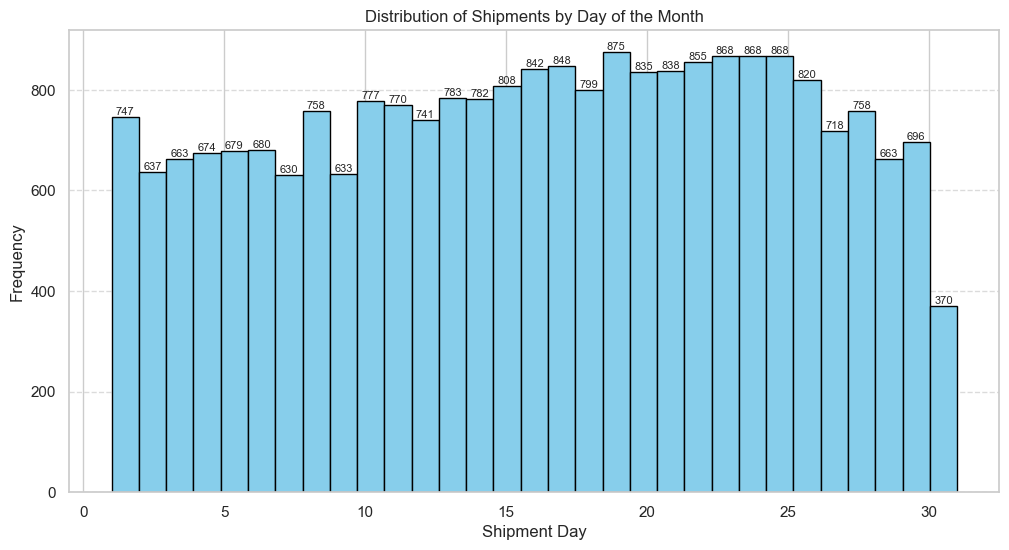

In [513]:
# Extract Shipment Day
df["Shipment Day"] = df["Shipment Date"].dt.day

# Function to detect outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in Order Year and Shipment Year
outliers_order_year = find_outliers(df, "Order Year")
outliers_shipment_year = find_outliers(df, "Shipment Year")

# Print detected outliers
print("Outliers in Order Year:\n", outliers_order_year)
print("Outliers in Shipment Year:\n", outliers_shipment_year)

# Plot the distribution of Shipment Day
plt.figure(figsize=(12, 6))  # Increased width to 12 for more space on x-axis
n, bins, patches = plt.hist(df["Shipment Day"], bins=31, color="skyblue", edgecolor="black")

# Add count labels inside the bars
for i in range(len(bins)-1):
    plt.text(
        (bins[i] + bins[i+1]) / 2,  # Position of the label (center of the bin)
        n[i] + 0.5,  # Position slightly above the bar
        f'{int(n[i])}',  # Count value
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8
    )

plt.xlabel("Shipment Day")
plt.ylabel("Frequency")
plt.title("Distribution of Shipments by Day of the Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [514]:
df = df[df["Shipment Mode"] != "Same Day"]

# Display the updated DataFrame
df

Order ID  Order Item ID Order Time  Order Quantity Product Department  \
0          3535           8793      14:07               1           Fan Shop   
1          4133          10320      07:37               1           Fan Shop   
2         11026          27609      22:32               1           Fan Shop   
3         11026          27609      22:32               1           Fan Shop   
4         11026          27607      22:32               1           Fan Shop   
...         ...            ...        ...             ...                ...   
24776     73246         176561      04:59               1           Fan Shop   
24777      7908          19762      10:10               1           Fan Shop   
24778     29326          73368      01:51               1           Fan Shop   
24779     63308         158284      03:15               1           Fan Shop   
24780     67951         169874      21:54               1           Fan Shop   

         Product Category                               Product Name  \
0                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
1                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
2                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
3                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
4                 Fishing  Field & Stream Sportsman 16 Gun Fire Safe   
...                   ...                                        ...   
24776  Hunting & Shooting                                       Toys   
24777  Hunting & Shooting                   ENO Atlas Hammock Straps   
24778  Hunting & Shooting                   ENO Atlas Hammock Straps   
24779  Hunting & Shooting           insta-bed Neverflat Air Mattress   
24780        Water Sports                Pelican Maverick 100X Kayak   

       Customer ID Customer Market  Customer Region  ... Profit Order Date  \
0             7840           LATAM  Central America  ...    200 2015-02-21   
1            10866           LATAM  Northern Europe  ...    200 2015-03-02   
2             3576          Europe  Northern Europe  ...    200 2015-06-10   
3             3576          Europe  Northern Europe  ...    200 2015-06-10   
4             3576          Europe  Northern Europe  ...    200 2015-06-10   
...            ...             ...              ...  ...    ...        ...   
24776        16799    Pacific Asia          Oceania  ...      6 2017-12-05   
24777        11950           LATAM    South America  ...     68 2015-03-26   
24778         8161    Pacific Asia       South Asia  ...     68 2016-03-04   
24779         5733          Europe   Western Europe  ...     60 2017-07-13   
24780         5733          Europe  Southern Europe  ...    172 2017-09-18   

      Shipment Date    Product ID  IsDelayed Delays  Order Year Shipment Year  \
0        2015-02-27     3535-8793       True    2.0        2015          2015   
1        2015-04-06    4133-10320       True   31.0        2015          2015   
2        2015-06-12   11026-27609      False    0.0        2015          2015   
3        2015-06-12   11026-27609      False    0.0        2015          2015   
4        2015-06-12   11026-27607      False    0.0        2015          2015   
...             ...           ...        ...    ...         ...           ...   
24776    2017-12-30  73246-176561       True   21.0        2017          2017   
24777    2016-04-30    7908-19762       True  397.0        2015          2016   
24778    2016-03-06   29326-73368      False    0.0        2016          2016   
24779    2017-09-17  63308-158284       True   64.0        2017          2017   
24780    2017-09-20  67951-169874       True    1.0        2017          2017   

      Delay Category Shipment Day  
0            Delayed           27  
1            Delayed            6  
2            On Time           12  
3            On Time           12  
4            On Time           12  
...              ...          ...  
24776        Delaye

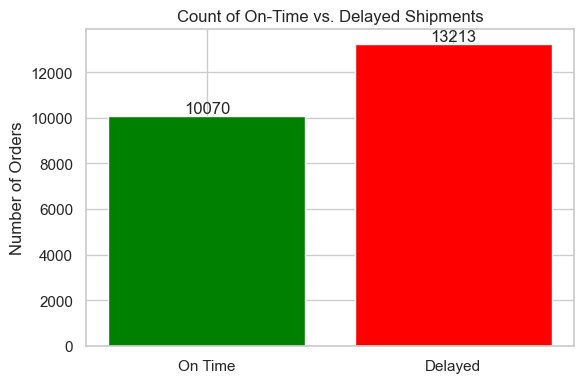

In [515]:
# Count the number of on-time (0 delay) and delayed shipments
on_time_count = (df["Delays"] == 0).sum()
delayed_count = (df["Delays"] > 0).sum()

# Create a bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(["On Time", "Delayed"], [on_time_count, delayed_count], color=["green", "red"])
plt.title("Count of On-Time vs. Delayed Shipments")
plt.ylabel("Number of Orders")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [516]:
print(df["Delays"].describe())

count    23283.000000
mean        39.236696
std        121.537355
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        959.000000
Name: Delays, dtype: float64


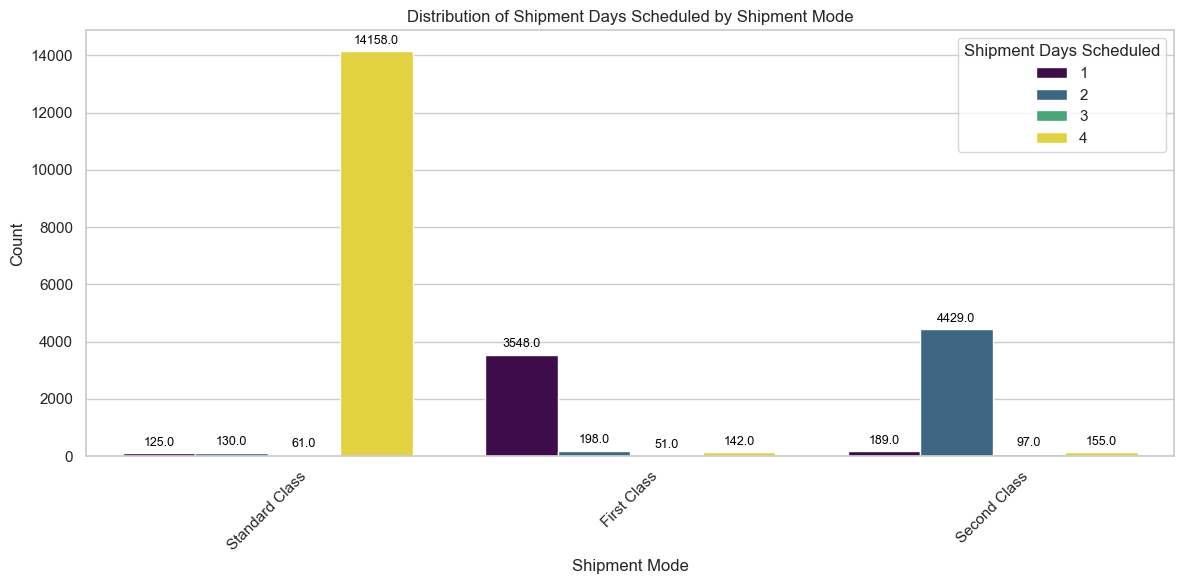

In [517]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

#Set figure size
plt.figure(figsize=(12, 6))

#Create the countplot
ax = sns.countplot(
    x="Shipment Mode",
    hue="Shipment Days - Scheduled",
    data=df,
    palette="viridis"
)

#Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=9, color='black', 
                    xytext=(0, 3), 
                    textcoords='offset points')

#Labels and title
plt.xlabel("Shipment Mode")
plt.ylabel("Count")
plt.title("Distribution of Shipment Days Scheduled by Shipment Mode")
plt.xticks(rotation=45)

#Show the legend
plt.legend(title="Shipment Days Scheduled")

#Show the plot
plt.tight_layout()
plt.show()

In [518]:
# Define the IQR range for outliers
Q1 = df["Profit"].quantile(0.3)
Q3 = df["Profit"].quantile(0.7)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Profit"] < lower_bound) | (df["Profit"] > upper_bound)]

# Display the outliers
print(outliers)

       Order ID  Order Item ID Order Time  Order Quantity Product Department  \
385        5536          13821      04:33               1           Footwear   
386       17003          42514      04:33               1           Footwear   
387       17316          43281      18:12               1           Footwear   
389        1563           3902      19:14               1           Footwear   
390        3535           8795      14:07               1           Footwear   
...         ...            ...        ...             ...                ...   
24770     73323         176638      10:45               1           Fan Shop   
24771     73331         176646      10:45               1           Fan Shop   
24773     73373         176688      01:28               1           Fan Shop   
24775     73223         176538      20:55               1           Fan Shop   
24776     73246         176561      04:59               1           Fan Shop   

         Product Category              

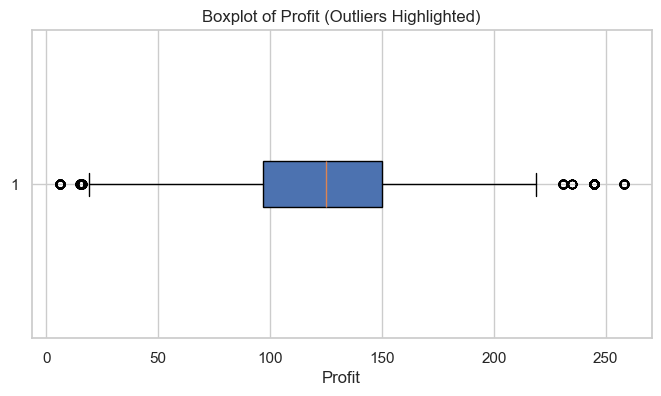

In [519]:
# Create a boxplot for "Profit" column
plt.figure(figsize=(8, 4))
plt.boxplot(df["Profit"], vert=False, patch_artist=True)

# Add labels and title
plt.title("Boxplot of Profit (Outliers Highlighted)")
plt.xlabel("Profit")
plt.grid(True)

# Show the plot
plt.show()

In [520]:
max_profit = df["Profit"].max()
print("Maximum Profit:", max_profit)

Maximum Profit: 258


In [521]:
Q1 = df["Profit"].quantile(0.25)  # 25th percentile (First Quartile)
Q2 = df["Profit"].quantile(0.50)  # 50th percentile (Median)
Q3 = df["Profit"].quantile(0.75)  # 75th percentile (Third Quartile)
Qmax = df["Profit"].quantile(1.0) # Maximum quartile (100th percentile)

print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile / Median):", Q2)
print("Q3 (75th percentile):", Q3)
print("Qmax (100th percentile):", Qmax)

Q1 (25th percentile): 97.0
Q2 (50th percentile / Median): 125.0
Q3 (75th percentile): 150.0
Qmax (100th percentile): 258.0


In [522]:
print(df.columns)  # Display all column names

Index(['Order ID', 'Order Item ID', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Order Date', 'Shipment Date',
       'Product ID', 'IsDelayed', 'Delays', 'Order Year', 'Shipment Year',
       'Delay Category', 'Shipment Day'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2650335981.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




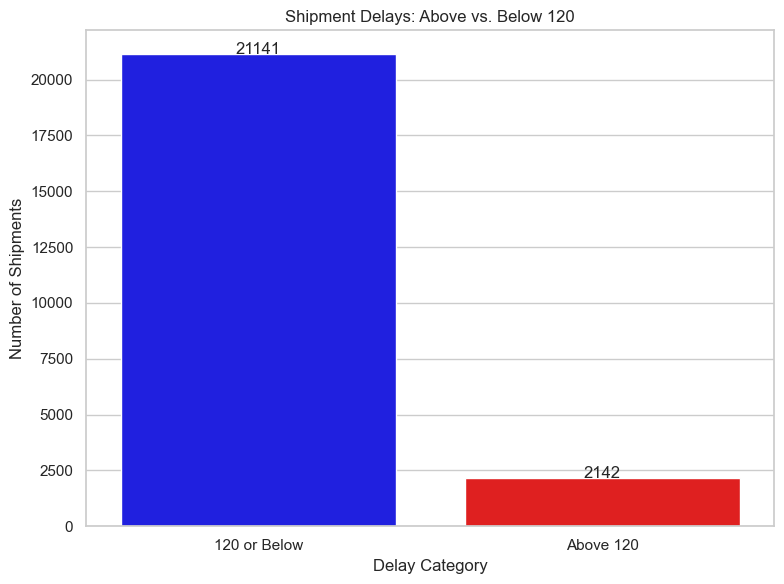

In [523]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

#Ensure 'Delays' column exists
if 'Delays' not in df.columns:  # Display all column names
    raise ValueError("The CSV does not contain a 'Delays' column.")

#Categorize the shipments based on delay (Threshold: 120)
df['delay_category'] = df['Delays'].apply(lambda x: 'Above 120' if x > 120 else '120 or Below')

#Count plot with numbers above bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='delay_category', data=df, palette={'Above 120': 'red', '120 or Below': 'blue'})

#Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", fontsize=12)

#Customize the plot
plt.title('Shipment Delays: Above vs. Below 120')
plt.xlabel('Delay Category')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

In [524]:
# Ensure 'delay' column exists
if 'Delays' not in df.columns:  # Display all column names
    raise ValueError("The CSV does not contain a 'Delays' column.")

# Remove records with delay greater than 120 days
df = df[df['Delays'] <= 120]

# Reset index after deletion
df.reset_index(drop=True, inplace=True)

# Display the updated dataset shape
print("Updated dataset shape:", df.shape)  # Print number of rows and columns

Updated dataset shape: (21141, 27)


C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2570868718.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2570868718.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




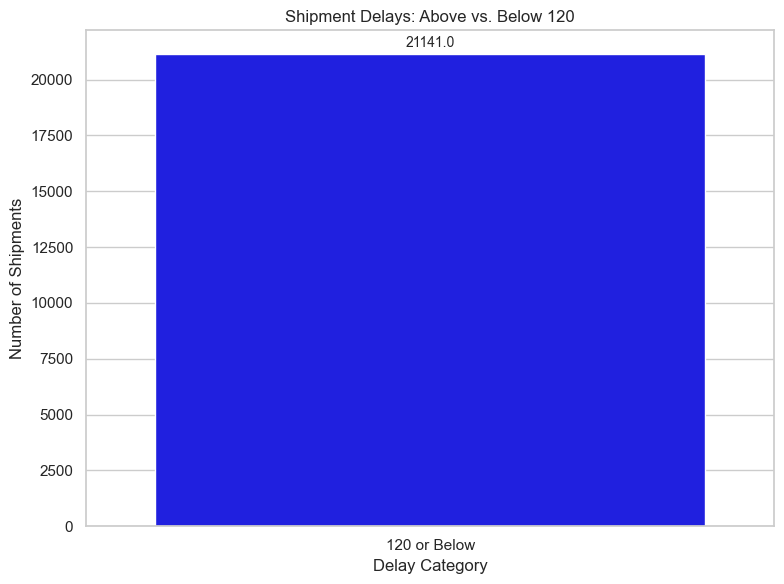

In [525]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Ensure 'Delays' column exists
if 'Delays' not in df.columns:  # Display all column names
    raise ValueError("The CSV does not contain a 'Delays' column.")

# Categorize the shipments based on delay (Threshold: 120)
df['delay_category'] = df['Delays'].apply(lambda x: 'Above 120' if x > 120 else '120 or Below')

# Plot the counts using seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='delay_category', data=df, palette={'Above 120': 'red', '120 or Below': 'blue'})

# Add data labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, 
                xytext=(0, 3), textcoords='offset points')

# Customize the plot
plt.title('Shipment Delays: Above vs. Below 120')
plt.xlabel('Delay Category')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

In [526]:
df.shape  # Print number of rows and columns

(21141, 27)

In [527]:
df.columns  # Display all column names

Index(['Order ID', 'Order Item ID', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Order Date', 'Shipment Date',
       'Product ID', 'IsDelayed', 'Delays', 'Order Year', 'Shipment Year',
       'Delay Category', 'Shipment Day', 'delay_category'],
      dtype='object')

In [528]:
df.dtypes

Order ID                              int32
Order Item ID                         int32
Order Time                           object
Order Quantity                        int32
Product Department                   object
Product Category                     object
Product Name                         object
Customer ID                           int32
Customer Market                      object
Customer Region                      object
Customer Country                     object
Warehouse Country                    object
Shipment Mode                        object
Shipment Days - Scheduled             int32
Gross Sales                           int32
Discount %                           object
Profit                                int32
Order Date                   datetime64[ns]
Shipment Date                datetime64[ns]
Product ID                           object
IsDelayed                              bool
Delays                              float64
Order Year                      

1.	Which region has the most orders and highest delays?

Features Involved:
* Customer region
* Shipment date
* Order date
* Delay (difference between order and shipping day)
* Order item ID

In [529]:
# Create a copy of the original DataFrame to ensure original data remains unchanged
df_copy = df.copy()

# Convert "Delays" column to numeric values, replacing non-numeric entries with 0
df_copy.loc[:, 'Delays'] = pd.to_numeric(df_copy['Delays'], errors='coerce').fillna(0).astype(int)

# Group data by Customer Region to compute total orders and average delay
region_summary = df_copy.groupby('Customer Region').agg(
    total_orders=('Order Item ID', 'count'),
    avg_delay=('Delays', 'mean')
).reset_index()

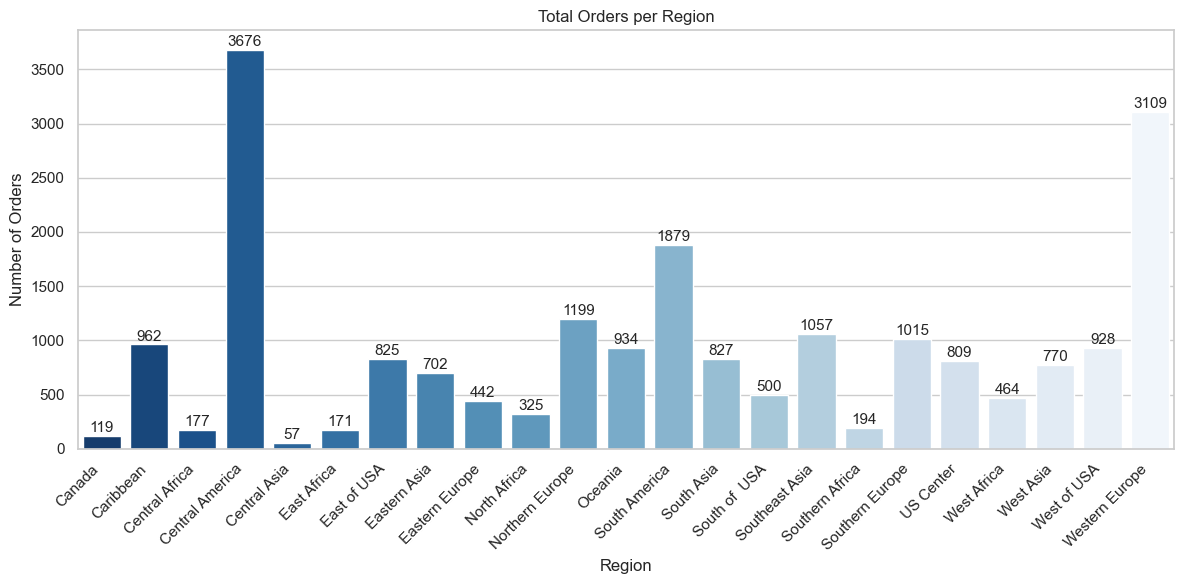

In [530]:
#Bar Chart: Total Orders per Region with counts above bars
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Customer Region',
    y='total_orders',
    data=region_summary,
    hue='Customer Region',
    dodge=False,
    legend=False,
    palette='Blues_r'
)

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + max(region_summary['total_orders']) * 0.01,  # small vertical offset
        int(height),
        ha='center',
        fontsize=11
    )

#Customize the plot
plt.title('Total Orders per Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

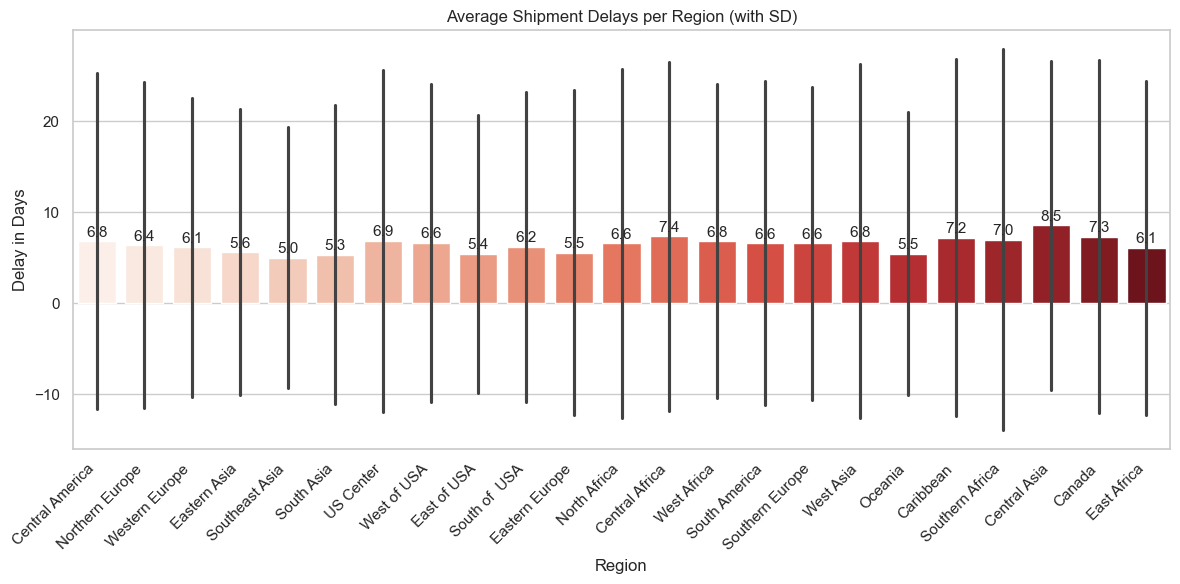

In [531]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries
import numpy as np  # Load required libraries

#Bar Chart with Error Bars: Average Shipment Delays per Region (with labels)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Customer Region',
    y='Delays',
    data=df_copy,
    hue='Customer Region',
    dodge=False,
    legend=False,
    palette='Reds',
    estimator=np.mean,
    errorbar='sd'
)

#Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

#Add average delay values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,  # slight offset
        f'{height:.1f}',
        ha='center',
        fontsize=11
    )

#Final customization
plt.title('Average Shipment Delays per Region (with SD)')
plt.xlabel('Region')
plt.ylabel('Delay in Days')
plt.tight_layout()
plt.show()

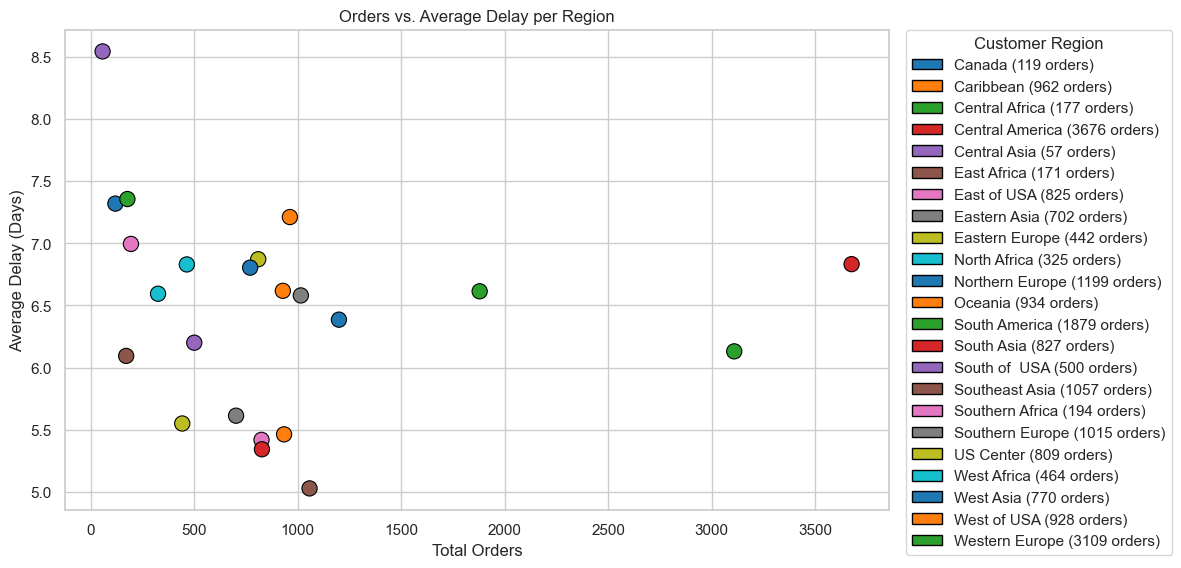

In [532]:
from matplotlib.patches import Patch

plt.figure(figsize=(12, 6))
palette = sns.color_palette('tab10', n_colors=len(region_summary))
region_colors = dict(zip(region_summary['Customer Region'], palette))

# Scatter plot
sns.scatterplot(
    x='total_orders',
    y='avg_delay',
    data=region_summary,
    hue='Customer Region',
    palette=region_colors,
    s=120,
    edgecolor='black',
    linewidth=0.8
)

plt.title('Orders vs. Average Delay per Region')
plt.xlabel('Total Orders')
plt.ylabel('Average Delay (Days)')

# Custom legend with counts per region
custom_legend = [
    Patch(
        facecolor=region_colors[region],
        edgecolor='black',
        label=f"{region} ({orders} orders)"
    )
    for region, orders in zip(region_summary['Customer Region'], region_summary['total_orders'])
]

plt.legend(
    handles=custom_legend,
    title='Customer Region',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

2. Does high order volume cause high delays in relation to the warehouse location?

Features Involved:

* Order ID

* Order date

* Delay

* Warehouse country

In [533]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Add a new column 'Order Month' to the copied DataFrame for trend analysis
df_copy.loc[:, 'Order Month'] = df_copy['Order Date'].dt.to_period('M')

# Group by Warehouse Country and Order Month to count orders
order_trend = df_copy.groupby(['Warehouse Country', 'Order Month'])['Order ID'].count().reset_index()
order_trend.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Group by Warehouse Country and Order Month to compute average delays
delay_trend = df_copy.groupby(['Warehouse Country', 'Order Month'])['Delays'].mean().reset_index()
delay_trend.rename(columns={'Delays': 'Average Delay'}, inplace=True)

# Merge the two grouped data sets into warehouse_analysis
warehouse_analysis = pd.merge(order_trend, delay_trend, on=['Warehouse Country', 'Order Month'])

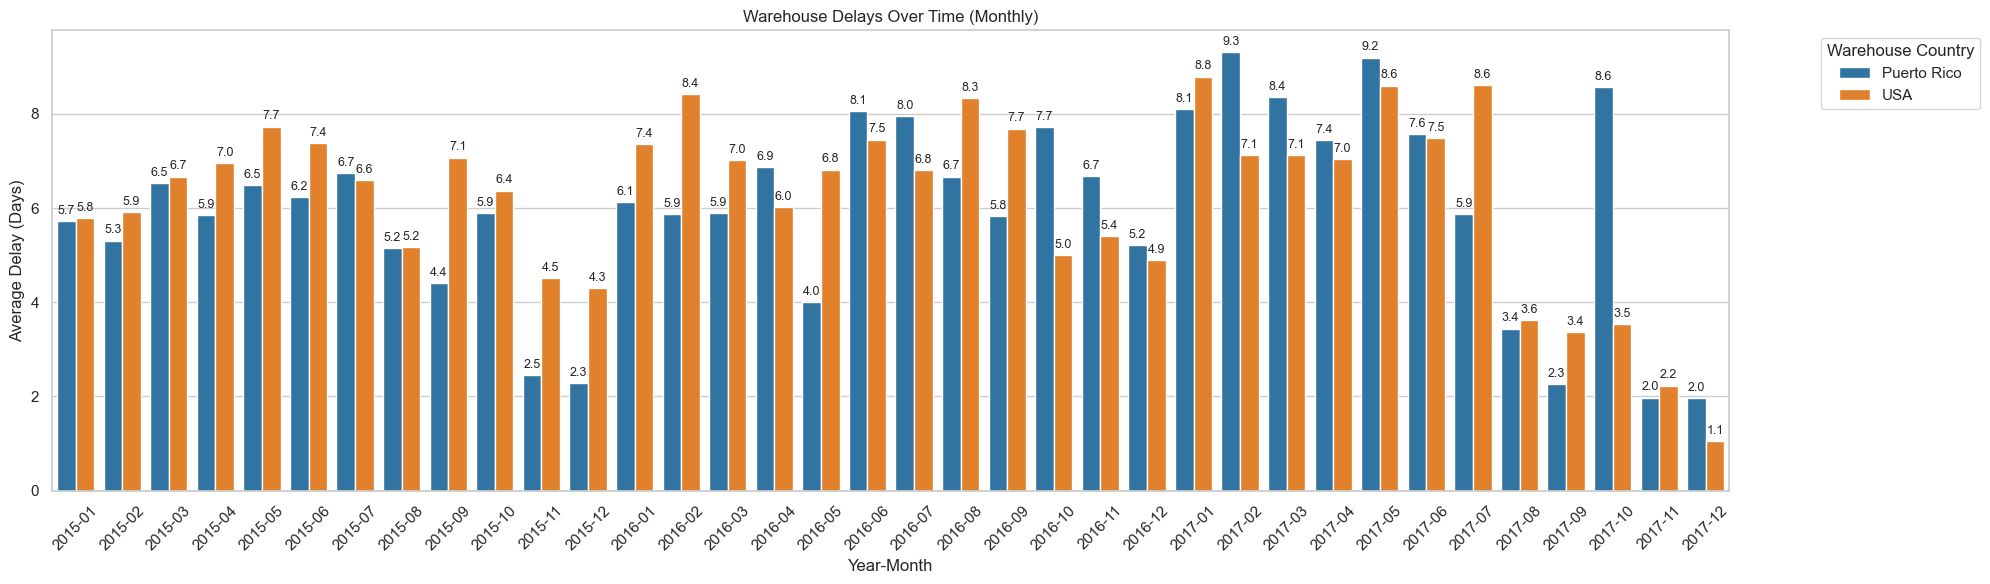

In [534]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

plt.figure(figsize=(20, 6))
ax = sns.barplot(
    data=warehouse_analysis,
    x='Order Month',
    y='Average Delay',
    hue='Warehouse Country',
    palette='tab10'
)

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

# Customize the plot
plt.title("Warehouse Delays Over Time (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=45)
plt.legend(title="Warehouse Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

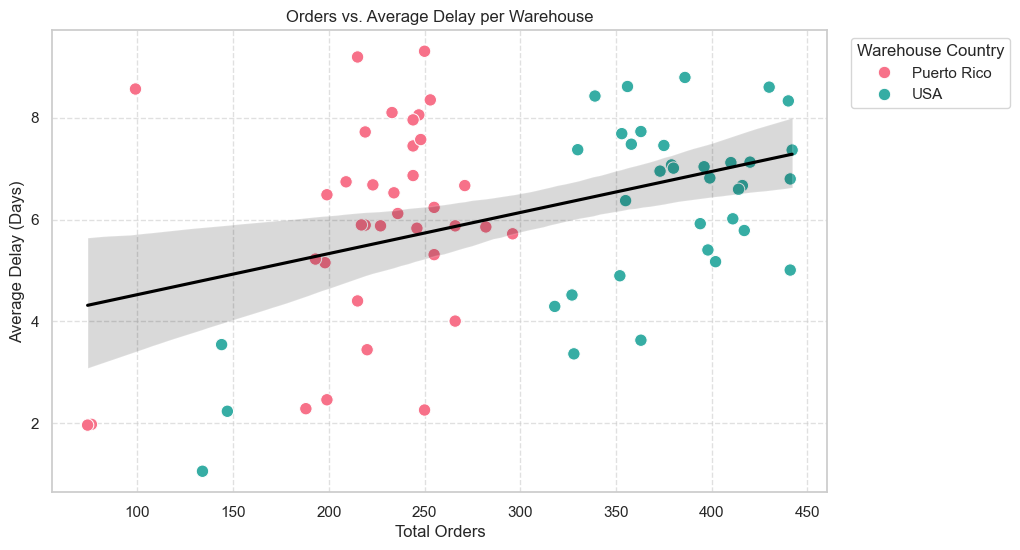

In [535]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Orders', y='Average Delay', hue='Warehouse Country', data=warehouse_analysis, s=80, palette='husl')
sns.regplot(x='Total Orders', y='Average Delay', data=warehouse_analysis, scatter=False, color='black')
plt.title("Orders vs. Average Delay per Warehouse")
plt.xlabel("Total Orders")
plt.ylabel("Average Delay (Days)")
plt.legend(title="Warehouse Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

3. How do shipping mode, warehouse country, and customer country affect shipments that exceed scheduled shipment days?

Features Involved:

* Delay

* Shipping mode

* Warehouse country

* Customer country

In [536]:
# Create a copy of the original DataFrame to preserve original data
df_copy = df.copy()

# Set a modern whitegrid theme for the visualizations
sns.set_theme(style="whitegrid")

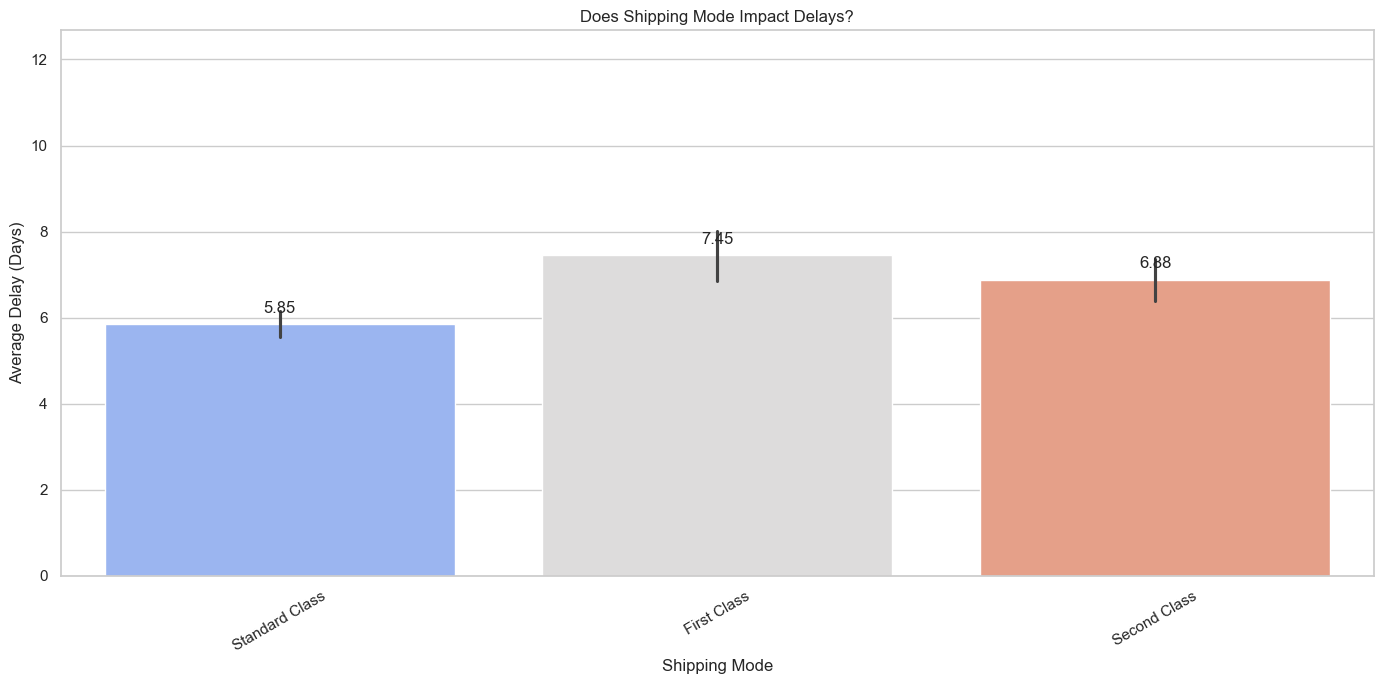

In [537]:
# Bar chart showing average delays by shipment mode
plt.figure(figsize=(14, 7))
sns.barplot(
    x="Shipment Mode",
    y="Delays",
    data=df_copy,
    estimator=np.mean,
    hue="Shipment Mode",  # Assign x variable to hue
    palette="coolwarm",
    legend=False
)
plt.title("Does Shipping Mode Impact Delays?")
plt.xlabel("Shipping Mode")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=30)
plt.ylim(0, df_copy["Delays"].mean() * 2)

# Add count labels
ax = plt.gca()
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Position the label at the center of the bar
        height + 0.2,  # Slightly above the bar
        f'{height:.2f}',  # Format the label to show 2 decimal places
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

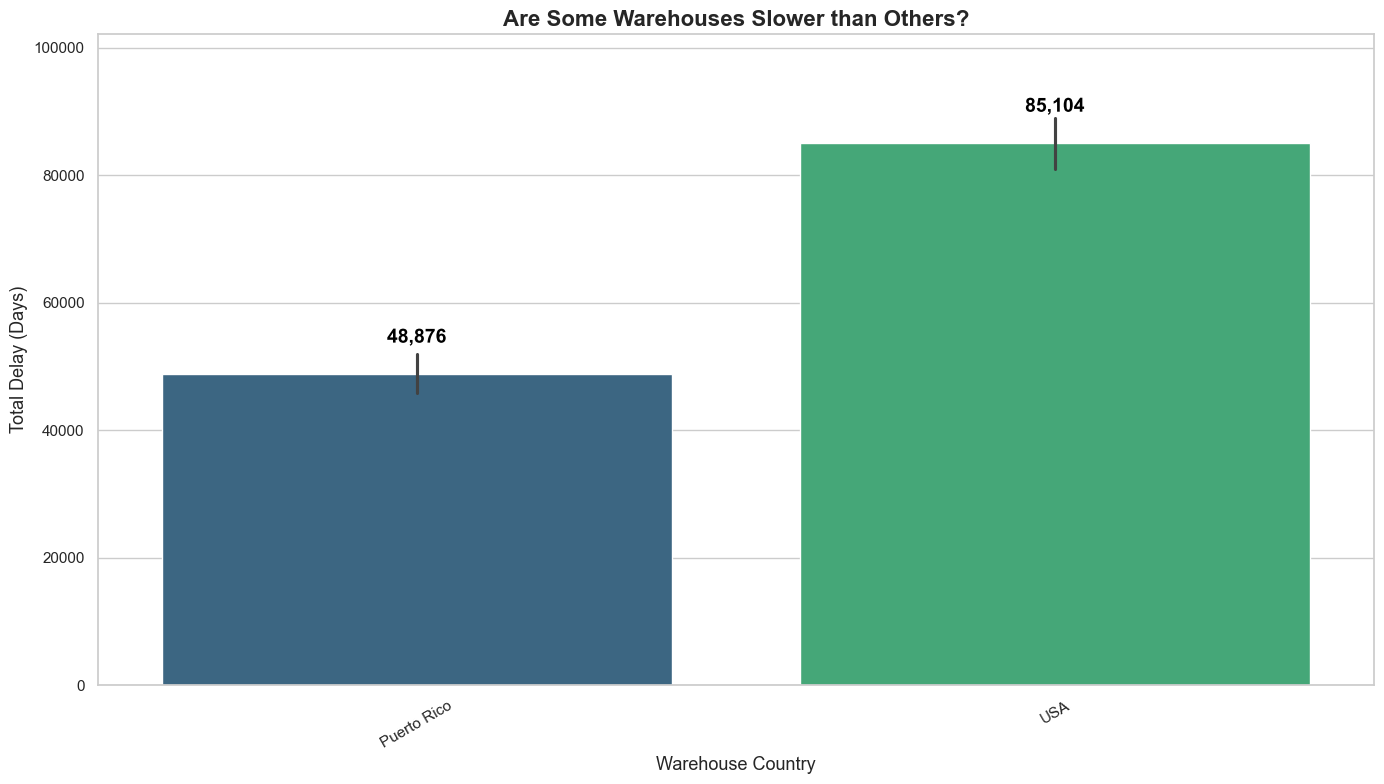

In [538]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries
import numpy as np  # Load required libraries
from matplotlib.patheffects import withStroke

#Compute max delay to adjust y-axis limit
max_delay = df_copy.groupby("Warehouse Country")["Delays"].sum().max()

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Warehouse Country",
    y="Delays",
    data=df_copy,
    estimator=np.sum,
    hue="Warehouse Country",
    palette="viridis",
    legend=False
)

#Annotate bars with bold, larger, outlined text
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + max_delay * 0.05,  # Increased vertical offset
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=14,            # Larger font
        fontweight='bold',
        color='black',
        path_effects=[withStroke(linewidth=3, foreground='white')]  # White outline
    )

#Plot aesthetics
plt.title("Are Some Warehouses Slower than Others?", fontsize=16, fontweight='bold')
plt.xlabel("Warehouse Country", fontsize=13)
plt.ylabel("Total Delay (Days)", fontsize=13)
plt.xticks(rotation=30)
plt.ylim(0, max_delay * 1.2)  # Extra space for labels
plt.tight_layout()
plt.show()

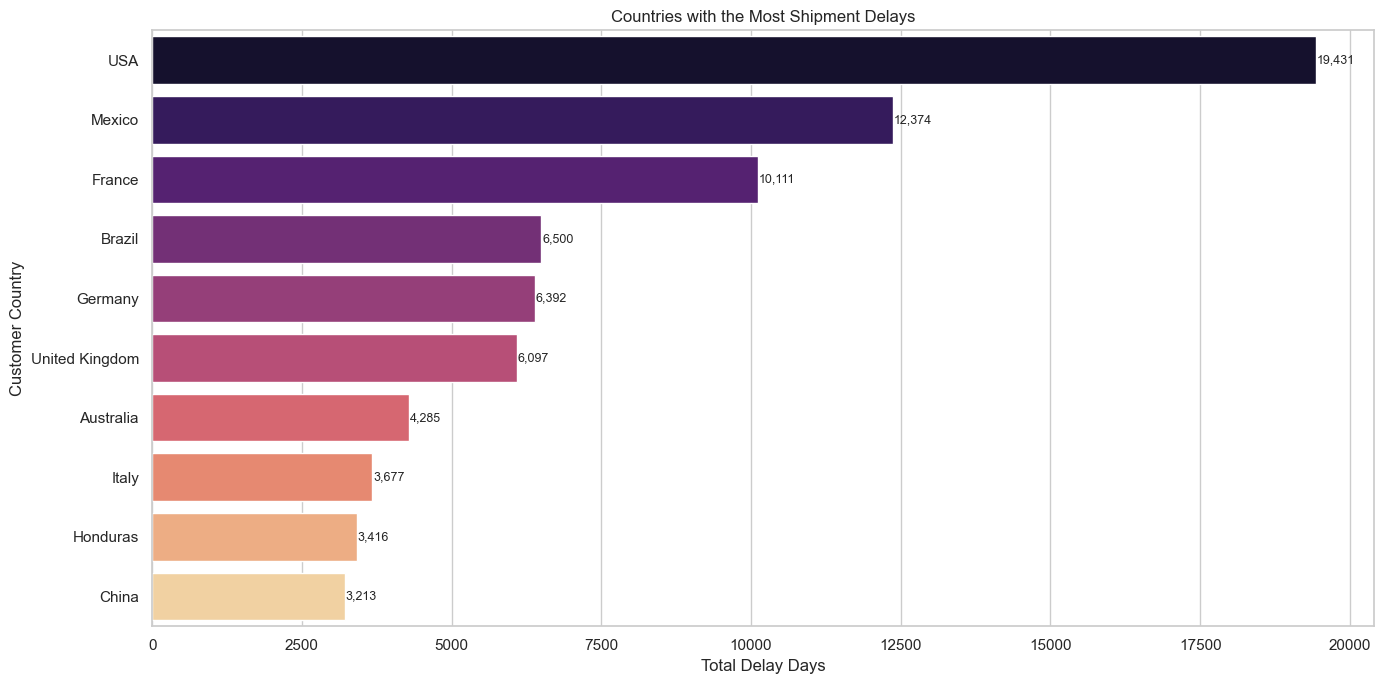

In [539]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Create a DataFrame for the top 10 countries with the highest total delays
top_countries = df_copy.groupby("Customer Country")["Delays"].sum().sort_values(ascending=False).head(10)
top_countries_df = top_countries.reset_index()

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="Delays",
    y="Customer Country",
    data=top_countries_df,
    hue="Customer Country",  # Assign the y variable to hue
    palette="magma",
    legend=False
)

# Add data labels on the bars
for p in ax.patches:
    width = p.get_width()
    if not pd.isna(width) and width > 0:
        ax.annotate(f'{width:,.0f}',  # format with comma separator
                    (width + 10, p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    fontsize=9)

# Customize
plt.title("Countries with the Most Shipment Delays")
plt.xlabel("Total Delay Days")
plt.ylabel("Customer Country")
plt.tight_layout()
plt.show()

4. Based on the most frequent customer, does delay factor into their frequent ordering?

Features Involved:

* Customer ID

* Delay

* Order quantity

* Order date

In [540]:
most_frequent_customer = df["Customer ID"].value_counts().idxmax()
most_frequent_count = df["Customer ID"].value_counts().max()

print(f"Most Frequent Customer ID: {most_frequent_customer} (Appeared {most_frequent_count} times)")

Most Frequent Customer ID: 5146 (Appeared 16 times)


In [541]:
# Create a copy of the original DataFrame to preserve original data
df_copy = df.copy()

# Filter the dataset for the most frequent customer (Customer ID 6300)
customer_data = df_copy[df_copy["Customer ID"] == 6300]

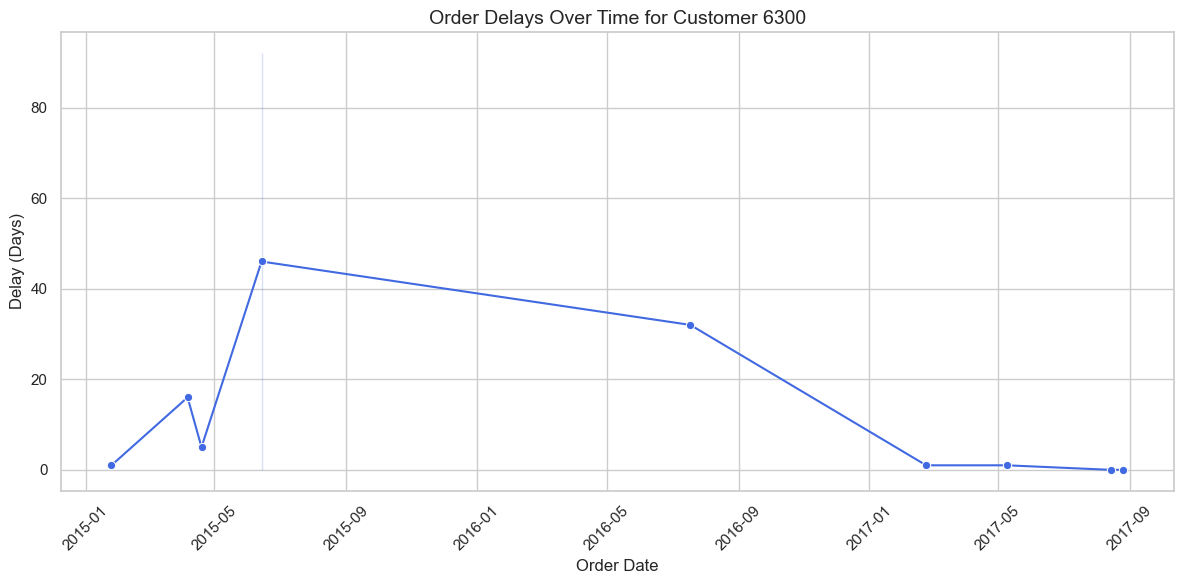

In [542]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="Order Date",
    y="Delays",
    data=customer_data,
    marker="o",
    color="royalblue"
)
plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Delay (Days)", fontsize=12)
plt.title("Order Delays Over Time for Customer 6300", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. How does inventory cost per unit affect gross sales of a product?

Features Involved:

* Inventory cost per unit

* Gross sales

* Product name

* Warehouse inventory

* Profit

## Adding Needed Dataset file (inventory)

In [543]:
inv.columns = inv.columns.str.strip()  # Display all column names

In [544]:
inv.columns  # Display all column names

Index(['Product Name', 'Year Month', 'Warehouse Inventory',
       'Inventory Cost Per Unit'],
      dtype='object')

In [545]:
# Merge the datasets on "Product Name"
merged_df = pd.merge(df, inv, on="Product Name", how="inner")

# Drop duplicates so that each product appears only once
merged_df = merged_df.drop_duplicates(subset="Product Name")

In [546]:
# Select the Top 10 Products by Gross Sales
top_products = merged_df.nlargest(10, "Gross Sales").copy()

# Normalize the two metrics (scale between 0 and 1)
top_products["Normalized Inventory Cost"] = top_products["Inventory Cost Per Unit"] / top_products["Inventory Cost Per Unit"].max()
top_products["Normalized Gross Sales"] = top_products["Gross Sales"] / top_products["Gross Sales"].max()

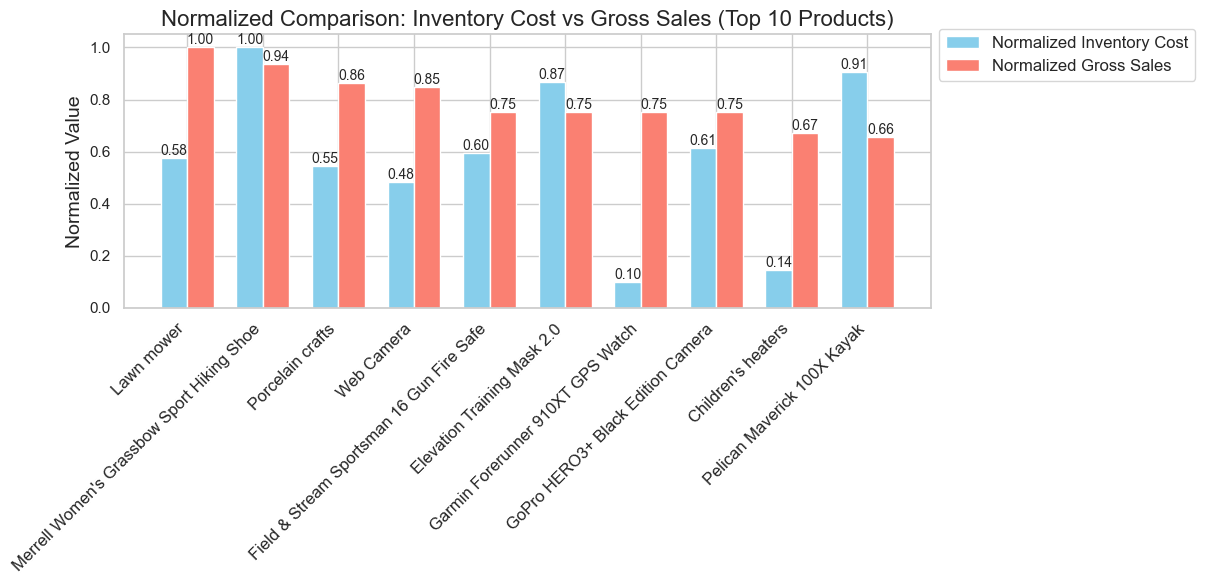

In [547]:
import numpy as np  # Load required libraries
import matplotlib.pyplot as plt  # Load required libraries

# Define labels and positions for the bars
labels = top_products["Product Name"]
x = np.arange(len(labels))
width = 0.35  # Width of each bar

# Create the figure and axis for the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for Normalized Inventory Cost and Normalized Gross Sales
rects1 = ax.bar(x - width/2, top_products["Normalized Inventory Cost"], width, label="Normalized Inventory Cost", color="skyblue")
rects2 = ax.bar(x + width/2, top_products["Normalized Gross Sales"], width, label="Normalized Gross Sales", color="salmon")

# Add data labels on each bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels, title, and custom x-tick labels
ax.set_ylabel("Normalized Value", fontsize=14)
ax.set_title("Normalized Comparison: Inventory Cost vs Gross Sales (Top 10 Products)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)

# Move the legend to the right and higher
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1.05), ncol=1)

plt.tight_layout()
plt.show()

6. How do Product Category and Product Name affect Gross Sales and Profit, particularly when accounting for the Discount % applied?

Features Involved:

* Product Category

* Product Name

* Gross Sales

* Profit

* Discount %

In [548]:
# Create a copy of the original DataFrame to preserve the original data
df_copy = df.copy()

# Set a modern whitegrid theme for better visuals
sns.set_theme(style="whitegrid")

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\6230986.py:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\6230986.py:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



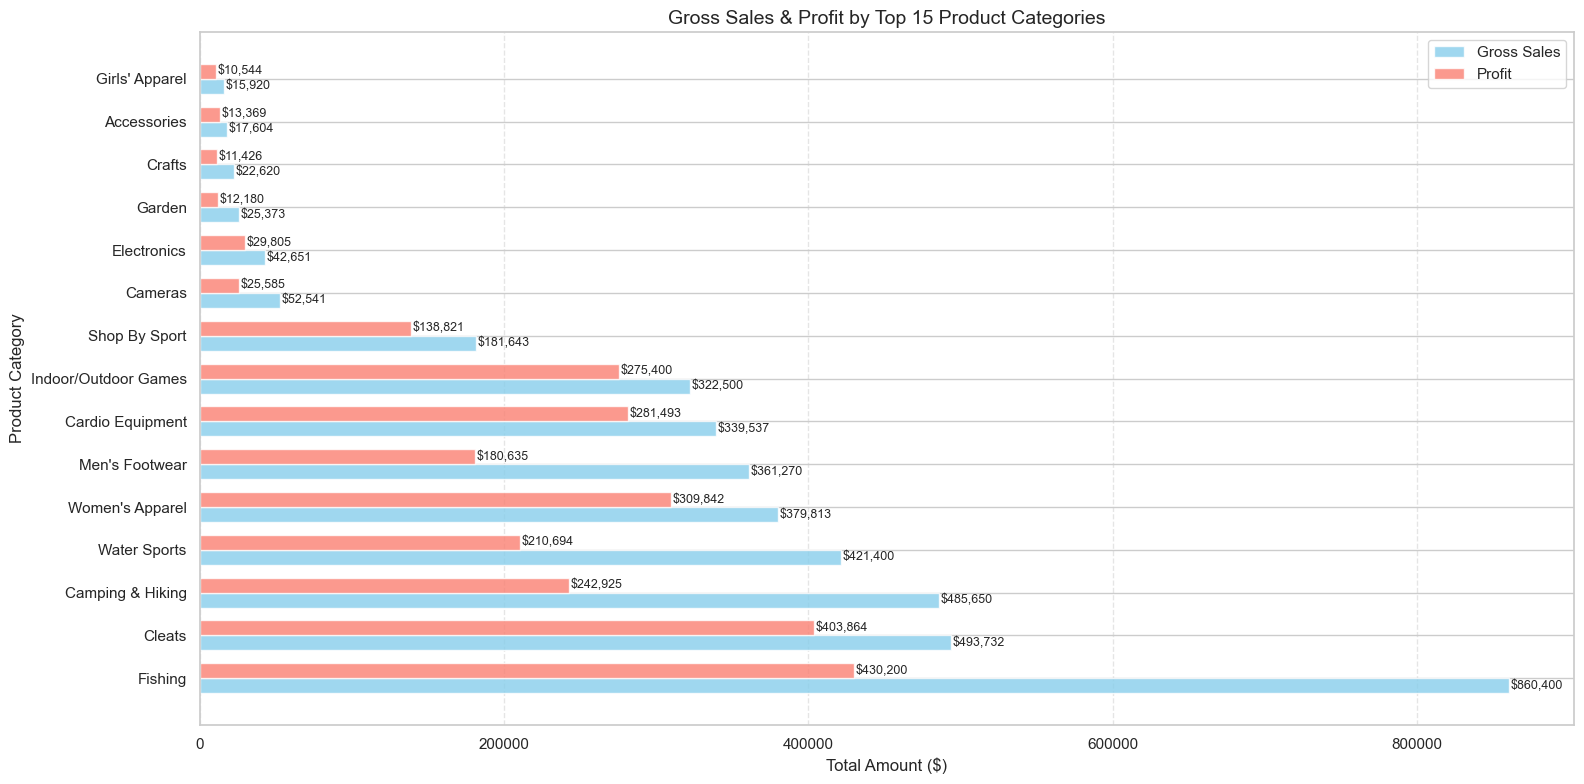

In [549]:
# Data
category_sales = (
    df_copy.groupby("Product Category")[["Gross Sales", "Profit"]]
    .sum()
    .sort_values(by="Gross Sales", ascending=False)
    .head(15)
)

# Setup
plt.figure(figsize=(16, 8))
categories = category_sales.index
gross_sales = category_sales["Gross Sales"]
profit = category_sales["Profit"]
y_pos = np.arange(len(categories))

bar_height = 0.35  # smaller bar height = more space between

# Plot
plt.barh(y_pos - bar_height/2, gross_sales, height=bar_height, label="Gross Sales", color="skyblue", alpha=0.8)
plt.barh(y_pos + bar_height/2, profit, height=bar_height, label="Profit", color="salmon", alpha=0.8)

# Add value labels
for i in range(len(categories)):
    plt.text(gross_sales[i] + 1000, y_pos[i] - bar_height/2, f"${gross_sales[i]:,.0f}", va='center', fontsize=9)
    plt.text(profit[i] + 1000, y_pos[i] + bar_height/2, f"${profit[i]:,.0f}", va='center', fontsize=9)

# Aesthetics
plt.yticks(y_pos, categories)
plt.title("Gross Sales & Profit by Top 15 Product Categories", fontsize=14)
plt.xlabel("Total Amount ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.legend(loc="upper right")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

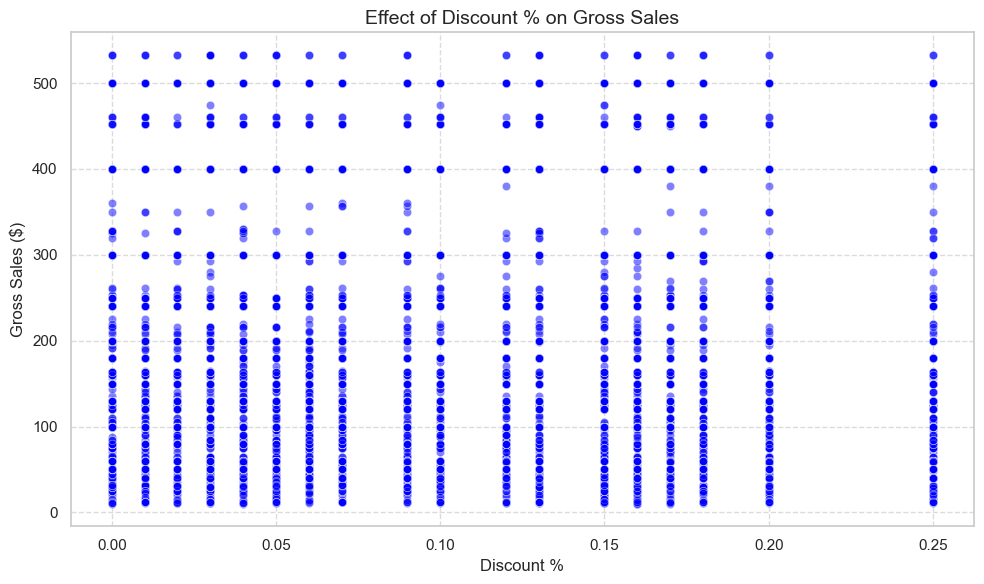

In [550]:
# Convert the "Discount %" column to numeric, handling errors and missing values
df_copy["Discount %"] = pd.to_numeric(df_copy["Discount %"], errors="coerce").fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_copy["Discount %"], y=df_copy["Gross Sales"], alpha=0.5, color="blue")
plt.title("Effect of Discount % on Gross Sales", fontsize=14)
plt.xlabel("Discount %", fontsize=12)
plt.ylabel("Gross Sales ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

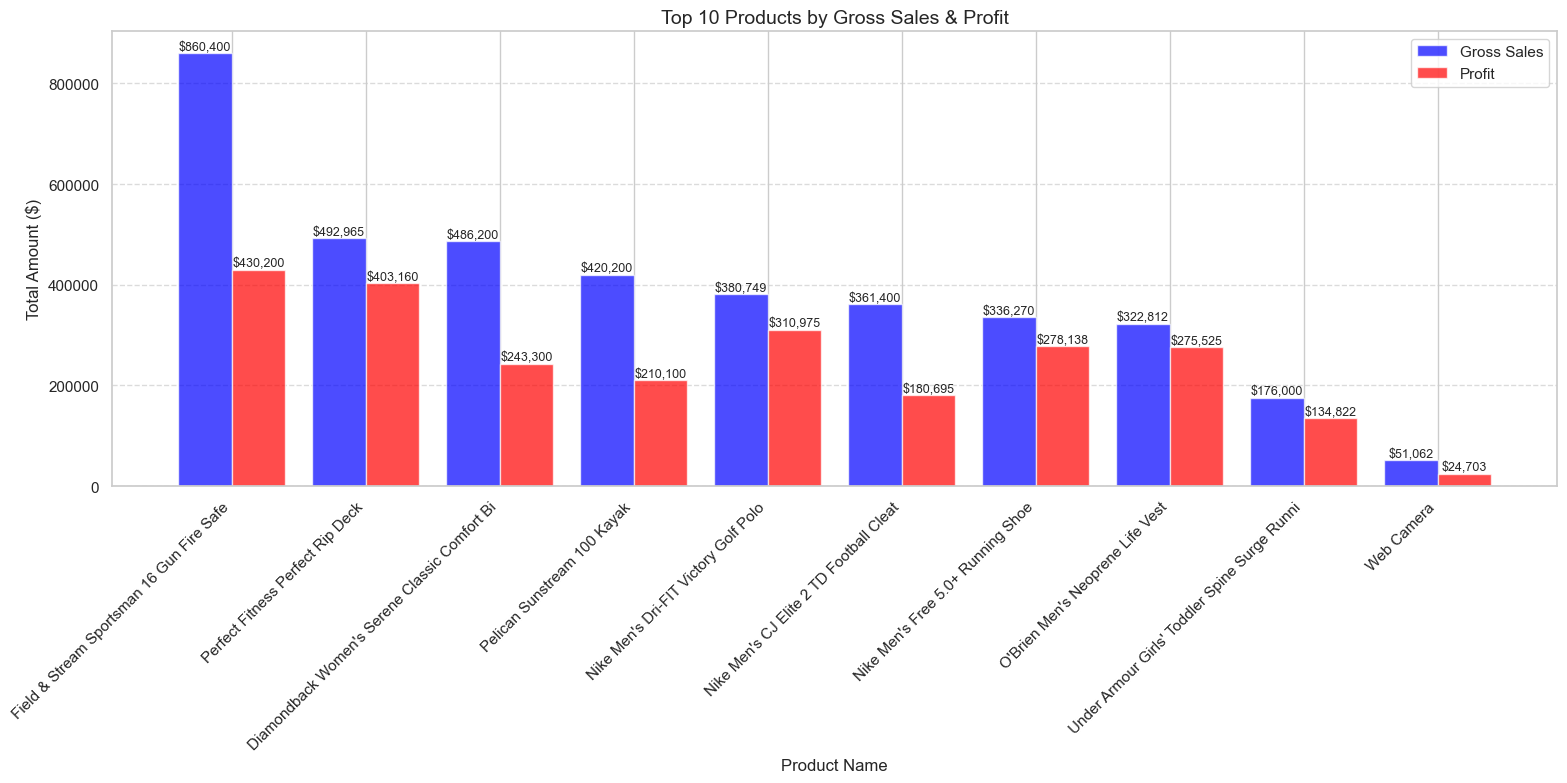

In [551]:
# Aggregate top 10 products by sales and profit
top_products = (
    df_copy.groupby("Product Name")[["Gross Sales", "Profit"]]
    .sum()
    .sort_values(by="Gross Sales", ascending=False)
    .head(10)
)

# Setup
products = top_products.index
gross_sales = top_products["Gross Sales"]
profit = top_products["Profit"]
x = np.arange(len(products))
bar_width = 0.4

plt.figure(figsize=(16, 8))

# Bars
bars1 = plt.bar(x - bar_width/2, gross_sales, width=bar_width, label="Gross Sales", color="blue", alpha=0.7)
bars2 = plt.bar(x + bar_width/2, profit, width=bar_width, label="Profit", color="red", alpha=0.7)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f"${height:,.0f}", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f"${height:,.0f}", ha='center', va='bottom', fontsize=9)

# Formatting
plt.title("Top 10 Products by Gross Sales & Profit", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Amount ($)", fontsize=12)
plt.xticks(x, products, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

7. How do seasonal variations (Order Month and Shipment Month) affect sales metrics like Gross Sales and Profit across various Product Categories?

Features Involved:

* Order date

* Shipment Month // To be Removed

* Gross Sales

* Profit

* Product Category

In [552]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Ensure "Order Date" is in datetime format
df_copy["Order Date"] = pd.to_datetime(df_copy["Order Date"], errors="coerce")

# Extract the month (1-12) from "Order Date"
df_copy["Order Month"] = df_copy["Order Date"].dt.month

             Gross Sales  Profit
Order Month                     
1                 389748  253272
2                 382653  243221
3                 374730  242099
4                 384272  246833
5                 372197  239935


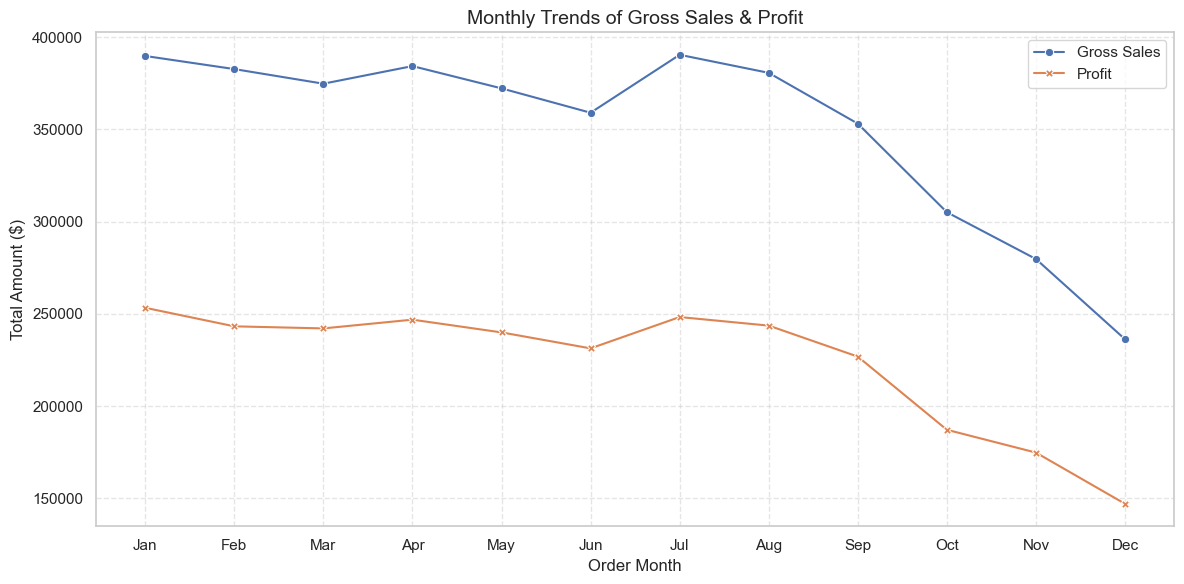

In [553]:
# Group data by month and sum Gross Sales & Profit
monthly_sales = df_copy.groupby("Order Month")[["Gross Sales", "Profit"]].sum()

# (Optional) Debug: print first few rows
print(monthly_sales.head())

# Create a line chart to show trends over months
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, markers=True, dashes=False)
plt.title("Monthly Trends of Gross Sales & Profit", fontsize=14)
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Total Amount ($)", fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

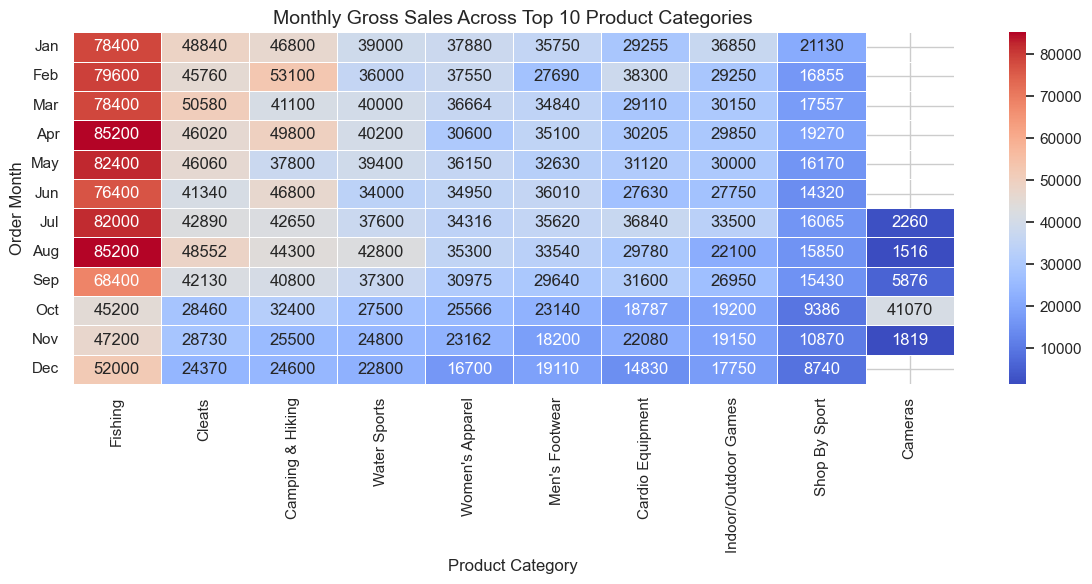

In [554]:
# Get total gross sales for each Product Category & Month
category_month_sales = df_copy.groupby(["Order Month", "Product Category"])["Gross Sales"].sum().unstack()

# Select the top 10 categories with the highest overall sales
top_categories = category_month_sales.sum().sort_values(ascending=False).head(10).index
filtered_data = category_month_sales[top_categories]

# Create a heatmap for the selected data
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Gross Sales Across Top 10 Product Categories", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Order Month", fontsize=12)

# Replace month numbers with month abbreviations for better readability
plt.yticks(
    ticks=np.arange(12) + 0.5,
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    rotation=0
)
plt.tight_layout()
plt.show()

8. How do the customer market, region, and country impact Order Quantity, Gross Sales, and Profit, and which product category is most profitable within each market?

Features Involved:

* Customer Market

* Customer Region

* Customer Country

* Order Quantity

* Gross sales

* Profit

* Product Category

In [555]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Set a modern whitegrid theme for the visualizations
sns.set_theme(style="whitegrid")

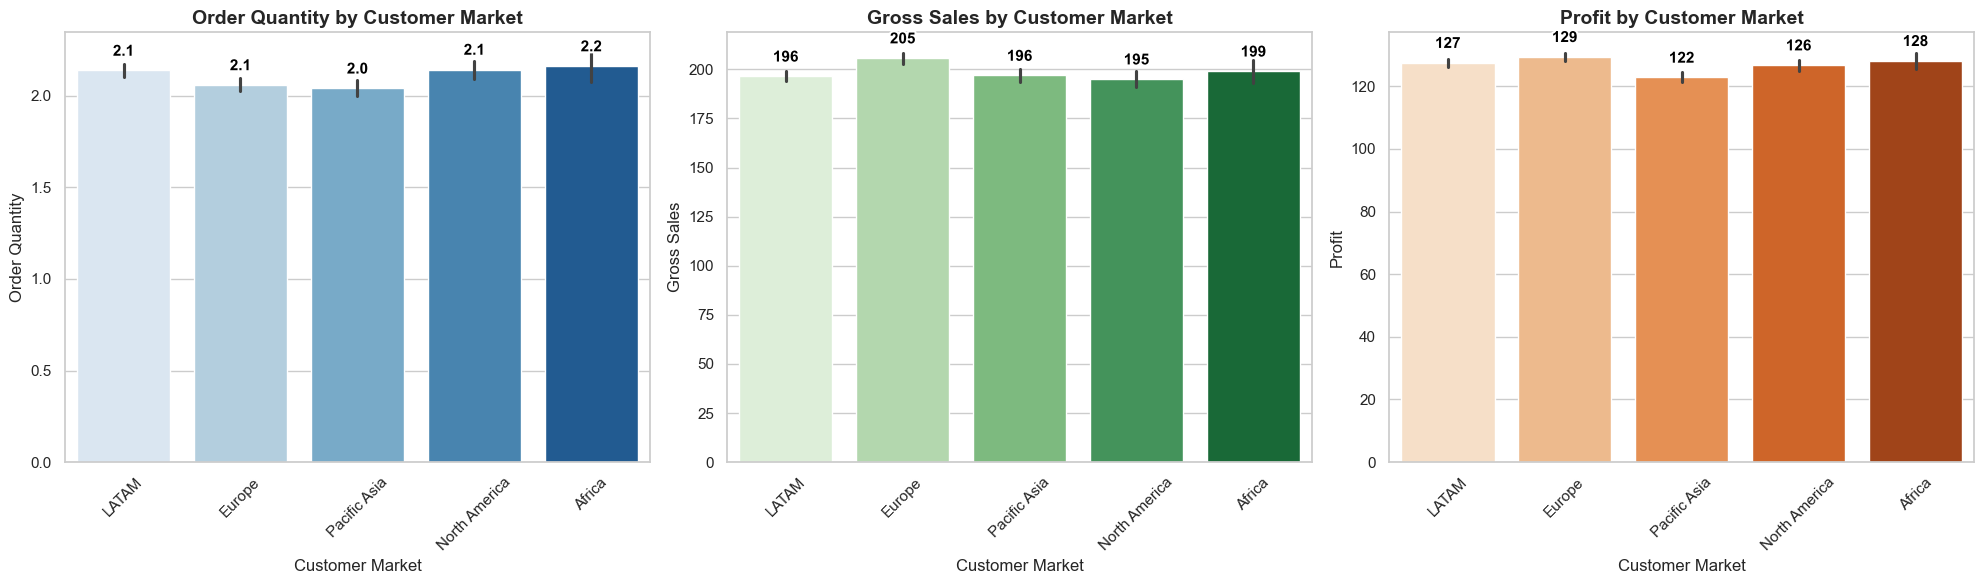

In [556]:
from matplotlib.patheffects import withStroke

#Create figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#Common chart settings
charts = [
    ("Order Quantity", "Blues", "Order Quantity by Customer Market"),
    ("Gross Sales", "Greens", "Gross Sales by Customer Market"),
    ("Profit", "Oranges", "Profit by Customer Market")
]

#Loop through each subplot
for ax, (y_col, color, title) in zip(axes, charts):
    sns.barplot(
        x="Customer Market",
        y=y_col,
        data=df_copy,
        ax=ax,
        hue="Customer Market",
        palette=color,
        legend=False
    )
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Customer Market", fontsize=12)
    ax.set_ylabel(y_col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Add bold, clear number labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + (0.03 * height),  # more vertical spacing
            f'{int(height):,}' if height > 100 else f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold',
            color='black',
            path_effects=[withStroke(linewidth=3, foreground='white')]  # white outline for contrast
        )

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2934667611.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Figure size 1200x600 with 0 Axes>

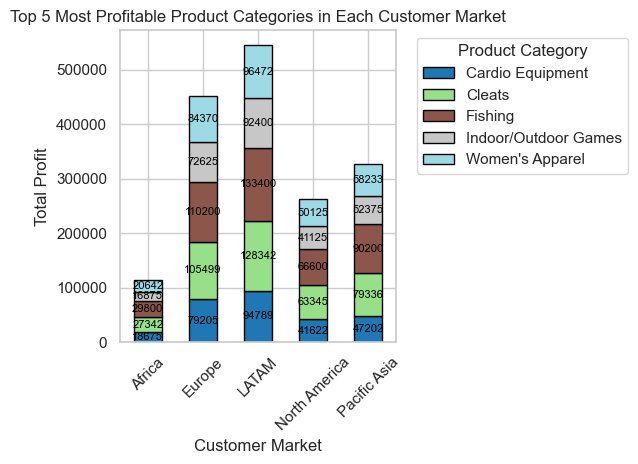

In [557]:
# Group by Customer Market and Product Category to sum Profit
category_profit = df_copy.groupby(["Customer Market", "Product Category"], as_index=False)["Profit"].sum()

# Get the top 5 most profitable categories for each Customer Market
top_categories = category_profit.groupby("Customer Market", group_keys=False).apply(lambda x: x.nlargest(5, "Profit")).reset_index(drop=True)

# Pivot the data for a stacked bar chart
category_pivot = top_categories.pivot(index="Customer Market", columns="Product Category", values="Profit")

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
ax = category_pivot.plot(kind="bar", stacked=True, colormap="tab20", edgecolor="black")

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.0f}',
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )

plt.title("Top 5 Most Profitable Product Categories in Each Customer Market")
plt.xlabel("Customer Market")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

9. Which product names exhibit the highest customer repurchase rates, and how do their discount percentages and profit margins compare to products with lower repurchase rates?

Features Involved:

* Product Name

* Customer ID (to track repeat purchases)

* Discount %

* Profit

* Order Quantity

In [558]:
import pandas as pd  # Load required libraries
import numpy as np  # Load required libraries
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Create a copy of the original DataFrame
df_copy = df.copy()

# Ensure numeric conversion for 'Discount %' and 'Profit'
df_copy['Discount %'] = pd.to_numeric(df_copy['Discount %'], errors='coerce')
df_copy['Profit'] = pd.to_numeric(df_copy['Profit'], errors='coerce')

# Compute repurchase rates
repurchase_counts = df_copy.groupby(['Customer ID', 'Product Name']).size().reset_index(name='Purchase Count')
repurchase_rates = repurchase_counts.groupby('Product Name')['Purchase Count'].mean().reset_index()
repurchase_rates['Purchase Count'] = repurchase_rates['Purchase Count'].round(5)

# Sort repurchase rates (stable sort ensures consistent ordering)
repurchase_rates = repurchase_rates.sort_values(
    by=['Purchase Count', 'Product Name'],
    ascending=[False, True],
    kind='stable'
).reset_index(drop=True)

# Define high and low repurchase products
high_repurchase = repurchase_rates.head(10)
low_repurchase = repurchase_rates.tail(10)

# Merge with discount and profit stats
product_stats = df_copy.groupby('Product Name').agg({'Discount %': 'mean', 'Profit': 'mean'}).reset_index()
high_repurchase = high_repurchase.merge(product_stats, on='Product Name', how='left')
low_repurchase = low_repurchase.merge(product_stats, on='Product Name', how='left')

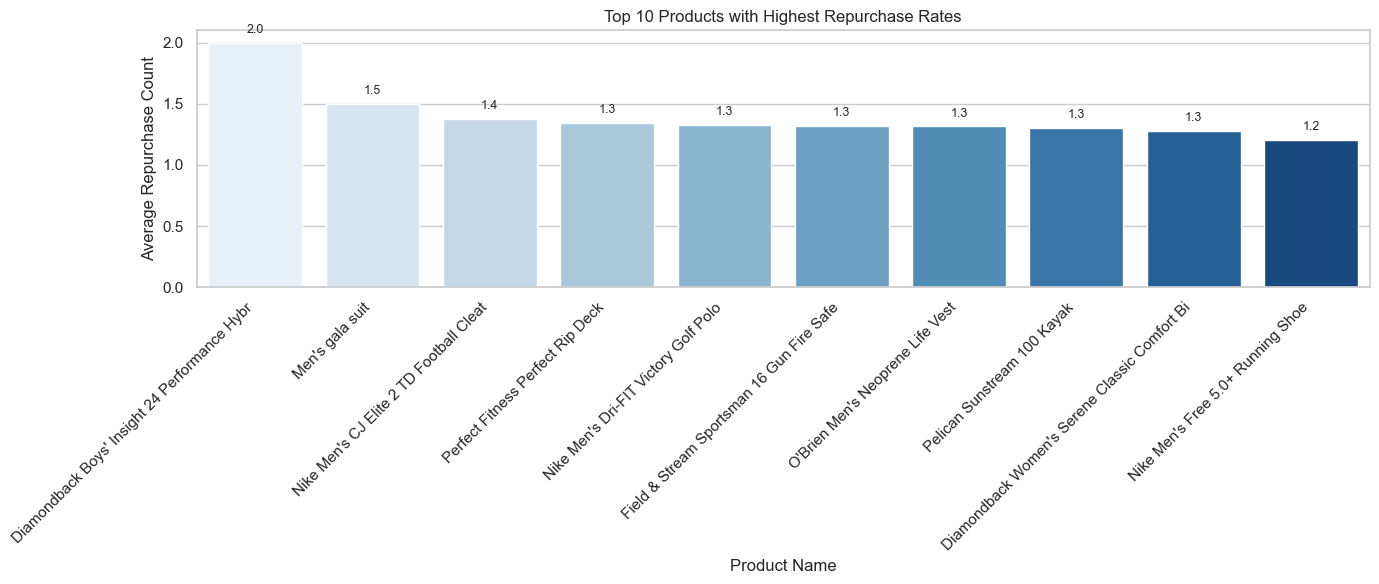

In [559]:
import matplotlib.pyplot as plt  # Load required libraries
import seaborn as sns  # Load required libraries

# Create the plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=high_repurchase,
    x='Product Name',
    y='Purchase Count',
    hue='Product Name',
    palette='Blues',
    legend=False
)

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                    ha='center', va='bottom',  # Align text at the top
                    fontsize=9, xytext=(0, 5),  # Offset for better visibility
                    textcoords='offset points')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products with Highest Repurchase Rates")
plt.xlabel("Product Name")
plt.ylabel("Average Repurchase Count")

# Show the plot
plt.tight_layout()
plt.show()

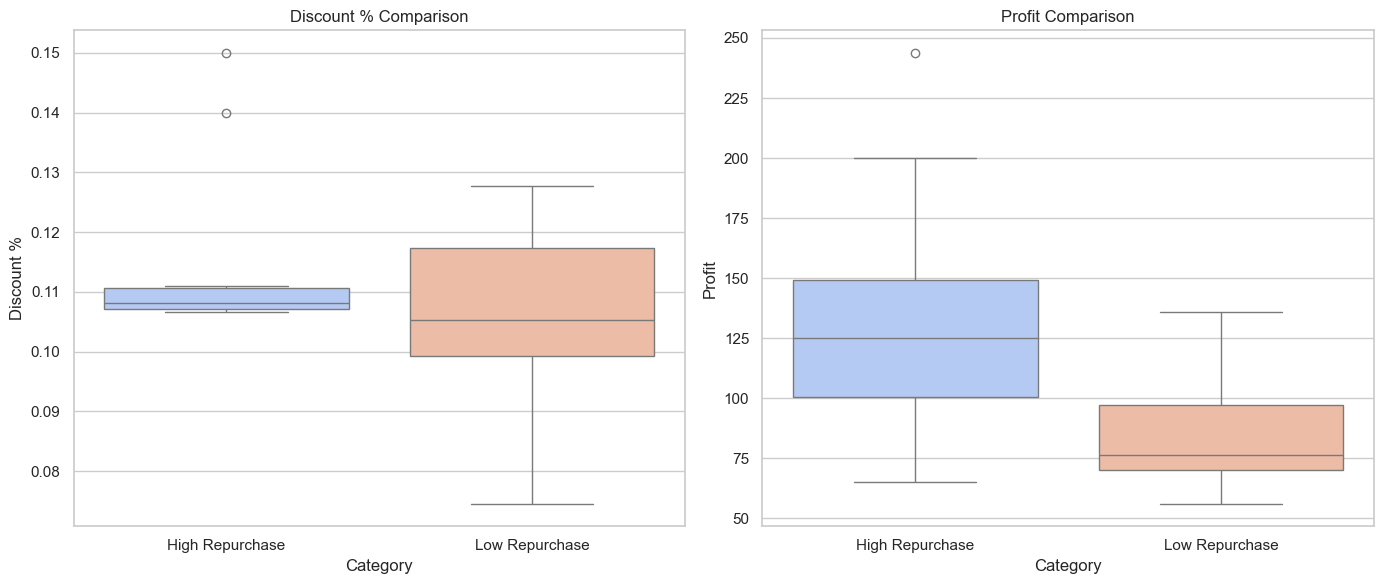

In [560]:
# Add a category label for comparison
high_repurchase['Category'] = 'High Repurchase'
low_repurchase['Category'] = 'Low Repurchase'
comparison_df = pd.concat([high_repurchase, low_repurchase])

plt.figure(figsize=(14, 6))

# Boxplot for Discount %
plt.subplot(1, 2, 1)
sns.boxplot(
    data=comparison_df,
    x='Category',
    y='Discount %',
    hue='Category',   # Assign the x variable to hue
    palette='coolwarm'
)
plt.title("Discount % Comparison")
plt.legend([], [], frameon=False)  # Remove the legend

# Boxplot for Profit
plt.subplot(1, 2, 2)
sns.boxplot(
    data=comparison_df,
    x='Category',
    y='Profit',
    hue='Category',   # Assign the x variable to hue
    palette='coolwarm'
)
plt.title("Profit Comparison")
plt.legend([], [], frameon=False)  # Remove the legend

plt.tight_layout()
plt.show()

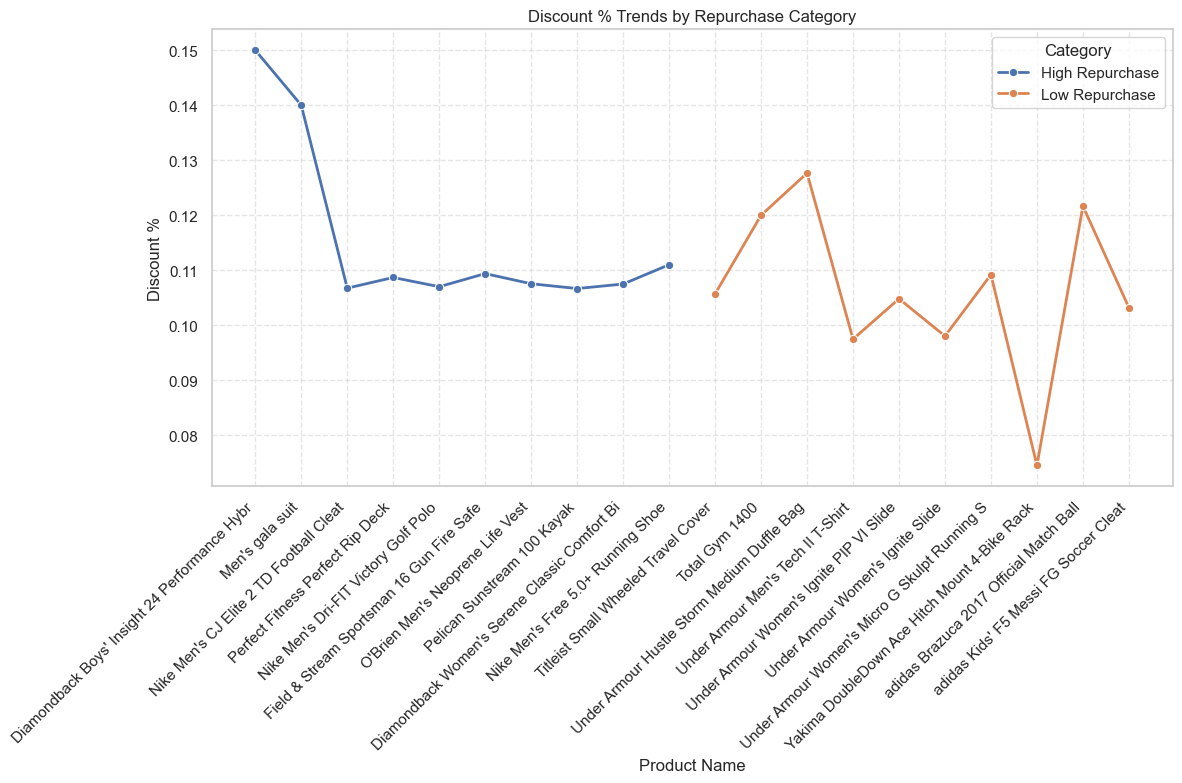

In [561]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=comparison_df, x='Product Name', y='Discount %', hue='Category', marker='o', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title("Discount % Trends by Repurchase Category")
plt.xlabel("Product Name")
plt.ylabel("Discount %")
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

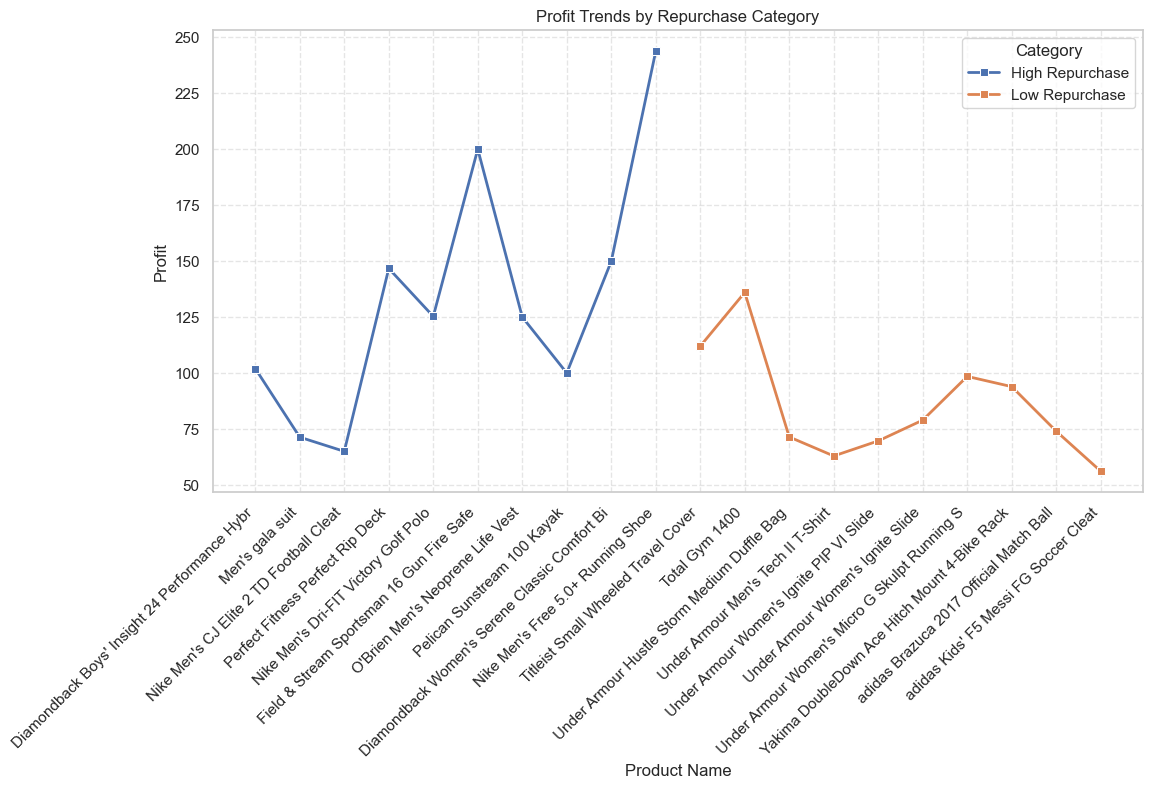

In [562]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_df, x='Product Name', y='Profit', hue='Category', marker='s', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title("Profit Trends by Repurchase Category")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

10. Which department has the highest demand and profit in each region?

Features Involved:

* Product department

* Customer region

* Profit

* Order Quantity

In [563]:
print(df["Customer Region"].unique())

['Central America' 'Northern Europe' 'Western Europe' 'Eastern Asia'
 'Southeast Asia' 'South Asia' 'US Center' 'West of USA' 'East of USA'
 'South of  USA' 'Eastern Europe' 'North Africa' 'Central Africa'
 'West Africa' 'South America' 'Southern Europe' 'West Asia' 'Oceania'
 'Caribbean' 'Southern Africa' 'Central Asia' 'Canada' 'East Africa']


In [564]:
import pandas as pd  # Load required libraries
import plotly.express as px  # Load required libraries

# Mapping broad regions to country names
region_mapping = {
    "South America": "Brazil",
    "Central America": "Mexico",
    "Northern Europe": "United Kingdom",
    "Western Europe": "Germany",
    "Eastern Asia": "China",
    "Southeast Asia": "Indonesia",
    "South Asia": "India",
    "US Center": "United States",
    "West of USA": "United States",
    "East of USA": "United States",
    "South of  USA": "United States",
    "North Africa": "Egypt",
    "Central Africa": "Democratic Republic of the Congo",
    "Eastern Europe": "Poland",
    "West Africa": "Nigeria",
    "East Africa": "Kenya",
    "Southern Europe": "Italy",
    "West Asia": "Turkey",
    "Southern Africa": "South Africa",
    "Oceania": "Australia",
    "Caribbean": "Dominican Republic",
    "Central Asia": "Kazakhstan",
    "Canada": "Canada"
}

df_copy = df.copy()
df_copy["Mapped Region"] = df_copy["Customer Region"].replace(region_mapping)

# Aggregate total orders and profit per mapped region and product department
region_department = df_copy.groupby(["Mapped Region", "Product Department"]).agg(
    total_orders=("Order Quantity", "sum"),
    total_profit=("Profit", "sum")
).reset_index()

# First Map: Total Orders per Region
fig_orders = px.choropleth(
    region_department,
    locations="Mapped Region",
    locationmode="country names",
    color="total_orders",
    color_continuous_scale="Reds",
    labels={'total_orders': 'Total Orders'},
    hover_data=["total_profit"],
    animation_frame="Product Department",
    title="Product Demand by Region (Total Orders)"
)

fig_orders.update_layout(
    geo=dict(showcoastlines=True, projection_type="natural earth"),
    coloraxis_colorbar=dict(title="Total Orders"),
    margin={"r":0, "t":50, "l":0, "b":0}
)
fig_orders.show()

# Second Map: Total Profit per Region
fig_profit = px.choropleth(
    region_department,
    locations="Mapped Region",
    locationmode="country names",
    color="total_profit",
    color_continuous_scale="Greens",
    labels={'total_profit': 'Total Profit'},
    hover_data=["total_orders"],
    animation_frame="Product Department",
    title="Product Demand by Region (Total Profit)"
)

fig_profit.update_layout(
    geo=dict(showcoastlines=True, projection_type="natural earth"),
    coloraxis_colorbar=dict(title="Total Profit"),
    margin={"r":0, "t":50, "l":0, "b":0}
)
fig_profit.show()

# Web Scrapping

# Cleaning Scraped Dataset


In [565]:
'''
# Import necessary modules
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

import csv

# Configure Selenium to use Chrome (you need ChromeDriver installed and in PATH)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Remove if you want to see the browser
driver = webdriver.Chrome(options=chrome_options)

try:
    # Navigate to the UN Data ComTrade page with the filter for HS code 95.
    url = "https://data.un.org/Data.aspx?d=ComTrade&f=_l1Code%3A95"
    driver.get(url)

    wait = WebDriverWait(driver, 15)  # up to 15s for elements

    # Wait for the initial table and grab it
    header = wait.until(EC.presence_of_element_located(
        (By.XPATH, "//th[contains(., 'Country or Area')]")
    ))
    table = header.find_element(By.XPATH, "./ancestor::table")

    # Open CSV for writing
    with open("comtrade_data.csv", mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow([
            "Country or Area", "Year", "Commodity", "Flow",
            "Trade (USD)", "Weight (kg)", "Quantity Unit", "Quantity"
        ])

        page = 1
        max_pages = 200

        while True:
            # --- SCRAPE CURRENT PAGE ---
            rows = table.find_elements(By.XPATH, ".//tr[td]")
            for row in rows:
                cells = row.find_elements(By.TAG_NAME, "td")
                # handle hidden-code columns
                if len(cells) == 10:
                    country, year = cells[1].text, cells[2].text
                    commodity, flow = cells[4].text, cells[5].text
                    trade_usd, weight_kg = cells[6].text, cells[7].text
                    qty_unit, quantity = cells[8].text, cells[9].text
                elif len(cells) == 8:
                    country, year = cells[0].text, cells[1].text
                    commodity, flow = cells[2].text, cells[3].text
                    trade_usd, weight_kg = cells[4].text, cells[5].text
                    qty_unit, quantity = cells[6].text, cells[7].text
                else:
                    continue
                writer.writerow([
                    country, year, commodity, flow,
                    trade_usd, weight_kg, qty_unit, quantity
                ])

            # stop if reached max pages
            if page >= max_pages:
                print(f"Reached max page limit ({max_pages}). Stopping.")
                break

            # try to find and click the Next arrow
            try:
                next_btn = wait.until(EC.element_to_be_clickable(
                    (By.CSS_SELECTOR, "img[src*='GoToNext.gif']")
                ))
            except TimeoutException:
                print("No Next button found or not clickable. Ending pagination.")
                break

            # remember old table, click, then wait for staleness
            old_table = table
            next_btn.click()
            try:
                wait.until(EC.staleness_of(old_table))
            except TimeoutException:
                print("Old table did not go stale in time; stopping.")
                break

            # wait for new table header to appear, then re-locate table
            try:
                header = wait.until(EC.presence_of_element_located(
                    (By.XPATH, "//th[contains(., 'Country or Area')]")
                ))
                table = header.find_element(By.XPATH, "./ancestor::table")
            except TimeoutException:
                print("New table did not load in time; stopping.")
                break

            page += 1
            print(f"Navigated to page {page}...")

    print("Data scraping complete. CSV file has been saved.")

finally:
    driver.quit()
    '''

'\n# Import necessary modules\nfrom selenium import webdriver\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.support.ui import WebDriverWait\nfrom selenium.webdriver.support import expected_conditions as EC\nfrom selenium.common.exceptions import TimeoutException\n\nimport csv\n\n# Configure Selenium to use Chrome (you need ChromeDriver installed and in PATH)\nchrome_options = Options()\nchrome_options.add_argument("--headless")  # Remove if you want to see the browser\ndriver = webdriver.Chrome(options=chrome_options)\n\ntry:\n    # Navigate to the UN Data ComTrade page with the filter for HS code 95.\n    url = "https://data.un.org/Data.aspx?d=ComTrade&f=_l1Code%3A95"\n    driver.get(url)\n\n    wait = WebDriverWait(driver, 15)  # up to 15s for elements\n\n    # Wait for the initial table and grab it\n    header = wait.until(EC.presence_of_element_located(\n        (By.XPATH, "//th[contains(., \'Country or 

In [566]:
ds = pd.read_csv(r"C:\Users\DELL\Desktop\Sem 2\Intro to Data Sciences\Project\comtrade_data.csv" , na_values=["", " ", "  ", "   "])
ds.head()

Country or Area  Year                                          Commodity  \
0     Afghanistan  2019  Tricycles, scooters, pedal cars and similar wh...   
1     Afghanistan  2019  Tricycles, scooters, pedal cars and similar wh...   
2     Afghanistan  2019  Tricycles, scooters, pedal cars and similar wh...   
3     Afghanistan  2019  Festive, carnival or other entertainment artic...   
4     Afghanistan  2019                                         Golf balls   

        Flow Trade (USD) Weight (kg)        Quantity Unit Quantity  
0     Export         229         480  Weight in kilograms      480  
1  Re-Export         229         480  Weight in kilograms      480  
2     Import   1,012,089     375,645  Weight in kilograms  375,645  
3     Import       8,127       8,888  Weight in kilograms    8,888  
4     Export         402         210          No Quantity      NaN

In [567]:
ds.columns

Index(['Country or Area', 'Year', 'Commodity', 'Flow', 'Trade (USD)',
       'Weight (kg)', 'Quantity Unit', 'Quantity'],
      dtype='object')

In [568]:
# 2. Strip whitespace from column names
ds.columns = ds.columns.str.strip()

# 3. Strip whitespace from all string columns, using .loc to avoid SettingWithCopyWarning
for col in ds.select_dtypes(include='object').columns:
    ds.loc[:, col] = ds[col].str.strip()

# 4. Convert 'Year' to numeric (this will coerce any bad values to NaN)
ds.loc[:, 'Year'] = pd.to_numeric(ds['Year'], errors='coerce')

# 5. Filter to only years between 2015 and 2017 (inclusive)
ds = ds.loc[(ds['Year'] >= 2015) & (ds['Year'] <= 2017)]

In [569]:
ds.head()

Country or Area  Year                                          Commodity  \
12     Afghanistan  2017  Wheeled toys designed to be ridden by children...   
13     Afghanistan  2017  Toys representing animals/non-human creatures ...   
14     Afghanistan  2017         Golf equipment; other than clubs and balls   
15     Afghanistan  2016  Wheeled toys designed to be ridden by children...   
16     Afghanistan  2015  Wheeled toys designed to be ridden by children...   

      Flow Trade (USD) Weight (kg)        Quantity Unit Quantity  
12  Import       5,764         NaN  Weight in kilograms    4,383  
13  Import     129,458         NaN          No Quantity      NaN  
14  Import     415,894       7,760  Weight in kilograms    7,760  
15  Import     289,931         NaN          No Quantity      NaN  
16  Import   1,615,886         NaN          No Quantity      NaN

In [570]:
ds = ds.drop(columns=['Flow', 'Quantity Unit'])

In [571]:
ds.duplicated().sum()

266

In [572]:
ds.drop_duplicates(inplace=True)

In [573]:
ds.duplicated().sum()

0

In [574]:
ds.isnull().sum()

Country or Area      0
Year                 0
Commodity            0
Trade (USD)          0
Weight (kg)         96
Quantity           589
dtype: int64

In [575]:
ds = ds.bfill().ffill()

In [576]:
ds.isnull().sum()

Country or Area    0
Year               0
Commodity          0
Trade (USD)        0
Weight (kg)        0
Quantity           0
dtype: int64

In [577]:
ds.tail()

Country or Area  Year  \
38215  Brunei Darussalam  2015   
38216  Brunei Darussalam  2015   
38217  Brunei Darussalam  2015   
38218  Brunei Darussalam  2015   
38219  Brunei Darussalam  2015   

                                               Commodity Trade (USD)  \
38215                                      Fishing reels         585   
38216  Fishing tackle n.e.c., butterfly nets, decoy b...     424,252   
38217      Travelling circuses and travelling menageries         204   
38218  Roundabouts, swings, shooting galleries, other...     907,992   
38219  Roundabouts, swings, shooting galleries, other...      34,871   

      Weight (kg) Quantity  
38215           8       63  
38216      13,735  368,042  
38217           4        4  
38218      57,243   57,243  
38219       1,379    1,379

# Merge Both Datasets 

In [633]:
ds['Trade (USD)'] = ds['Trade (USD)'].replace(',', '', regex=True).astype(float)

# Convert weight and quantity to numeric
ds['Weight (kg)'] = pd.to_numeric(ds['Weight (kg)'], errors='coerce')
ds['Quantity'] = pd.to_numeric(ds['Quantity'], errors='coerce')

# Aggregate trade data by year
ds_summary = ds.groupby('Year', as_index=False).agg({
    'Trade (USD)': 'sum',
    'Weight (kg)': 'sum',
    'Quantity': 'sum'
})

# Merge aggregated data with orders
merged = df.merge(
    ds_summary,
    left_on='Order Year',
    right_on='Year',
    how='left',
    suffixes=('', '_ds')
)

# Drop redundant column
merged.drop(columns=['Year'], inplace=True)

# Save final merged file
merged.to_csv("Final.csv", index=False)

In [634]:
merged.head()

Order ID  Order Item ID Order Time  Order Quantity Product Department  \
0      3535           8793      14:07               1           Fan Shop   
1      4133          10320      07:37               1           Fan Shop   
2     11026          27609      22:32               1           Fan Shop   
3     11026          27609      22:32               1           Fan Shop   
4     11026          27607      22:32               1           Fan Shop   

  Product Category                               Product Name  Customer ID  \
0          Fishing  Field & Stream Sportsman 16 Gun Fire Safe         7840   
1          Fishing  Field & Stream Sportsman 16 Gun Fire Safe        10866   
2          Fishing  Field & Stream Sportsman 16 Gun Fire Safe         3576   
3          Fishing  Field & Stream Sportsman 16 Gun Fire Safe         3576   
4          Fishing  Field & Stream Sportsman 16 Gun Fire Safe         3576   

  Customer Market  Customer Region  ... delay_category   Trade (USD)  \
0           LATAM  Central America  ...   120 or Below  1.299453e+10   
1           LATAM  Northern Europe  ...   120 or Below  1.299453e+10   
2          Europe  Northern Europe  ...   120 or Below  1.299453e+10   
3          Europe  Northern Europe  ...   120 or Below  1.299453e+10   
4          Europe  Northern Europe  ...   120 or Below  1.299453e+10   

  Weight (kg)  Quantity Trade (USD)_ds Weight (kg)_ds Quantity_ds  \
0     90073.0   76318.0   1.299453e+10        90073.0     76318.0   
1     90073.0   76318.0   1.299453e+10        90073.0     76318.0   
2     90073.0   76318.0   1.299453e+10        90073.0     76318.0   
3     90073.0   76318.0   1.299453e+10        90073.0     76318.0   
4     90073.0   76318.0   1.299453e+10        90073.0     76318.0   

  Trade (USD)_ds Weight (kg)_ds Quantity_ds  
0   1.299453e+10        90073.0     76318.0  
1   1.299453e+10        90073.0     76318.0  
2   1.299453e+10        90073.0     76318.0  
3   1.299453e+10        90073.0     76318.0  
4   1.299453e+10        90073.0     76318.0  

[5 rows x 36 columns]

In [635]:
merged.columns

Index(['Order ID', 'Order Item ID', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Order Date', 'Shipment Date',
       'Product ID', 'IsDelayed', 'Delays', 'Order Year', 'Shipment Year',
       'Delay Category', 'Shipment Day', 'delay_category', 'Trade (USD)',
       'Weight (kg)', 'Quantity', 'Trade (USD)_ds', 'Weight (kg)_ds',
       'Quantity_ds', 'Trade (USD)_ds', 'Weight (kg)_ds', 'Quantity_ds'],
      dtype='object')

In [610]:
merged.shape

(19940, 33)

# Questions and visualization

New Question 1:
How does the trade value (USD) of commodities relate to the number of orders placed in the corresponding countries over time?
- Uses: Country or Area, Trade (USD), Order Year, Order ID

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2918302901.py:45: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



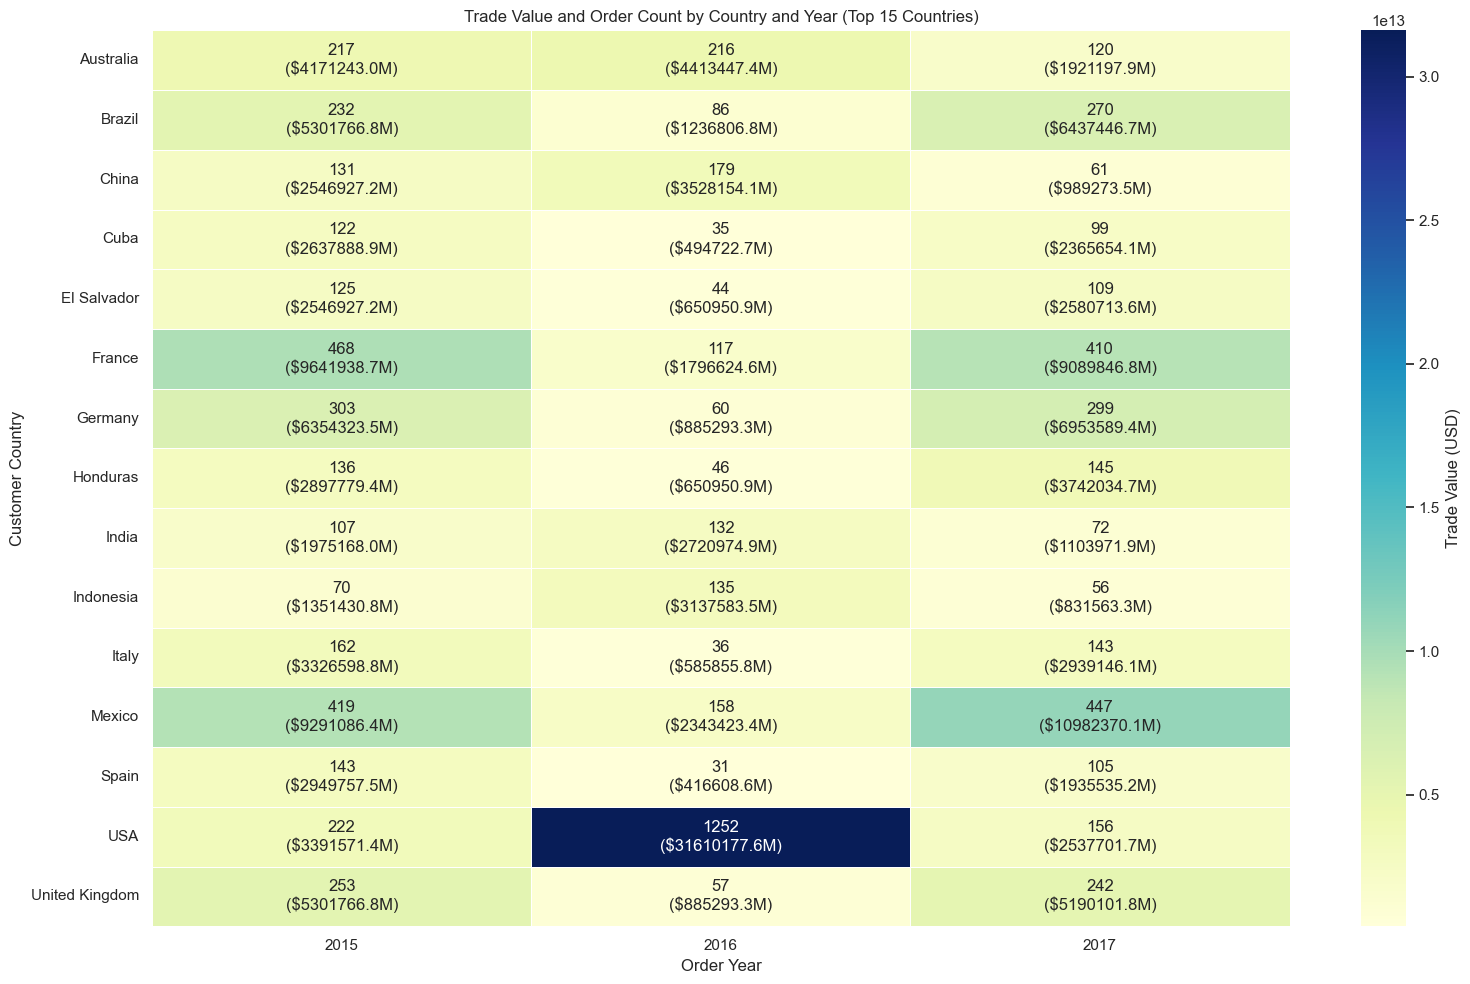

In [636]:
# Make a copy so original 'merged' isn’t modified
merged_copy = merged.copy()

# Group by country and year
summary = (
    merged_copy
    .groupby(['Customer Country', 'Order Year'])
    .agg({
        'Order ID': 'nunique',
        'Trade (USD)': 'sum'
    })
    .reset_index()
)

# Top 15 countries by order count
top_countries = (
    summary
    .groupby('Customer Country')['Order ID']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Filter to top countries
summary_top = summary[summary['Customer Country'].isin(top_countries)]

# Pivot tables
order_pivot = summary_top.pivot(
    index='Customer Country',
    columns='Order Year',
    values='Order ID'
)
trade_pivot = summary_top.pivot(
    index='Customer Country',
    columns='Order Year',
    values='Trade (USD)'
)

# Create annotations: Order ID + Trade (USD) in Millions
annotations = (
    order_pivot.fillna(0).astype(int).astype(str)
    + "\n($" 
    + trade_pivot.fillna(0)
         .applymap(lambda x: f"{x/1e6:.1f}M")
    + ")"
)

# Plot heatmap using Trade (USD) for color intensity
plt.figure(figsize=(16, 10))
sns.heatmap(
    trade_pivot,
    cmap="YlGnBu",
    annot=annotations,
    fmt="",
    linewidths=0.5,
    cbar_kws={'label': 'Trade Value (USD)'}
)
plt.title("Trade Value and Order Count by Country and Year (Top 15 Countries)")
plt.xlabel("Order Year")
plt.ylabel("Customer Country")
plt.tight_layout()
plt.show()

New Question 2:
Which commodities are associated with the most delayed shipments, and how do their weights and quantities influence these delays?
- Uses: Commodity, Weight (kg), Quantity, IsDelayed, Delays


C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\1441051848.py:46: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



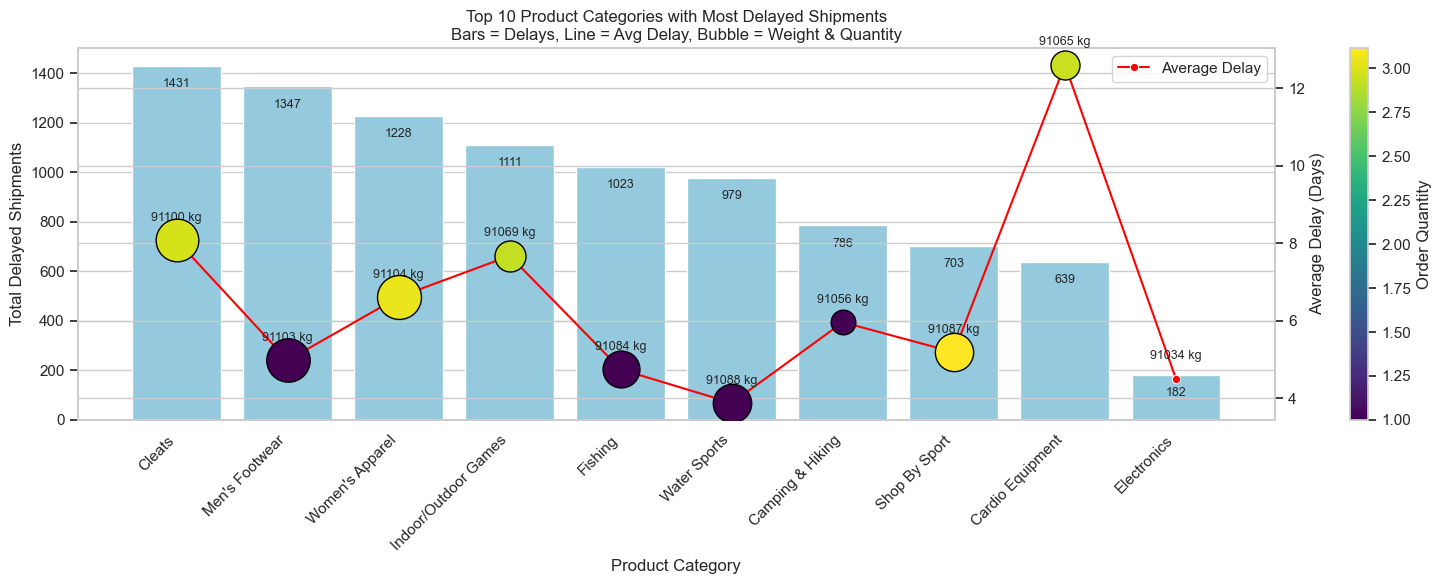

In [637]:
# Make a copy so original 'merged' isn’t modified
merged_copy = merged.copy()

# Group and summarize
q2_df = (
    merged_copy
    .groupby('Product Category')
    .agg({
        'IsDelayed': 'sum',
        'Delays': 'mean',
        'Weight (kg)': 'mean',
        'Order Quantity': 'mean'
    })
    .reset_index()
)

# Top 10 categories by total delayed shipments
top_categories = q2_df.sort_values("IsDelayed", ascending=False).head(10)

# Normalize Order Quantity for color mapping
norm = plt.Normalize(
    top_categories['Order Quantity'].min(),
    top_categories['Order Quantity'].max()
)
colors = cm.viridis(norm(top_categories['Order Quantity']))

# Normalize weights for bubble size
min_w, max_w = (
    top_categories['Weight (kg)'].min(),
    top_categories['Weight (kg)'].max()
)
top_categories['Size'] = 1000 * (
    (top_categories['Weight (kg)'] - min_w) / (max_w - min_w + 1e-6)
)

# Plot setup
fig, ax1 = plt.subplots(figsize=(16, 6))
barplot = sns.barplot(
    data=top_categories,
    x='Product Category',
    y='IsDelayed',
    color='skyblue',
    ax=ax1
)
ax1.set_ylabel("Total Delayed Shipments")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Label inside each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    ax1.text(
        x=i,
        y=height - 50,    # slightly below top
        s=str(int(height)),
        ha='center',
        va='top',
        fontsize=9
    )

# Secondary axis for average delay
ax2 = ax1.twinx()
sns.lineplot(
    data=top_categories,
    x='Product Category',
    y='Delays',
    ax=ax2,
    color='red',
    marker="o",
    label='Average Delay'
)
ax2.set_ylabel("Average Delay (Days)")

# Overlay bubbles and weight labels
for _, row in top_categories.iterrows():
    ax2.scatter(
        x=row['Product Category'],
        y=row['Delays'],
        s=row['Size'],
        color=cm.viridis(norm(row['Order Quantity'])),
        edgecolor='black',
        zorder=5
    )
    ax2.text(
        x=row['Product Category'],
        y=row['Delays'] + 0.5,
        s=f"{int(row['Weight (kg)'])} kg",
        ha='center',
        fontsize=9
    )

# Add colorbar for Order Quantity
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax2, orientation="vertical", label="Order Quantity")

# Title and layout
plt.title(
    "Top 10 Product Categories with Most Delayed Shipments\n"
    "Bars = Delays, Line = Avg Delay, Bubble = Weight & Quantity"
)
plt.tight_layout()
plt.show()

New Question 3:
Which shipment mode is frequently used by high trade value countries, and are they more or less prone to delays?
- Uses: Country or Area, Trade (USD), Shipment Mode, IsDelayed

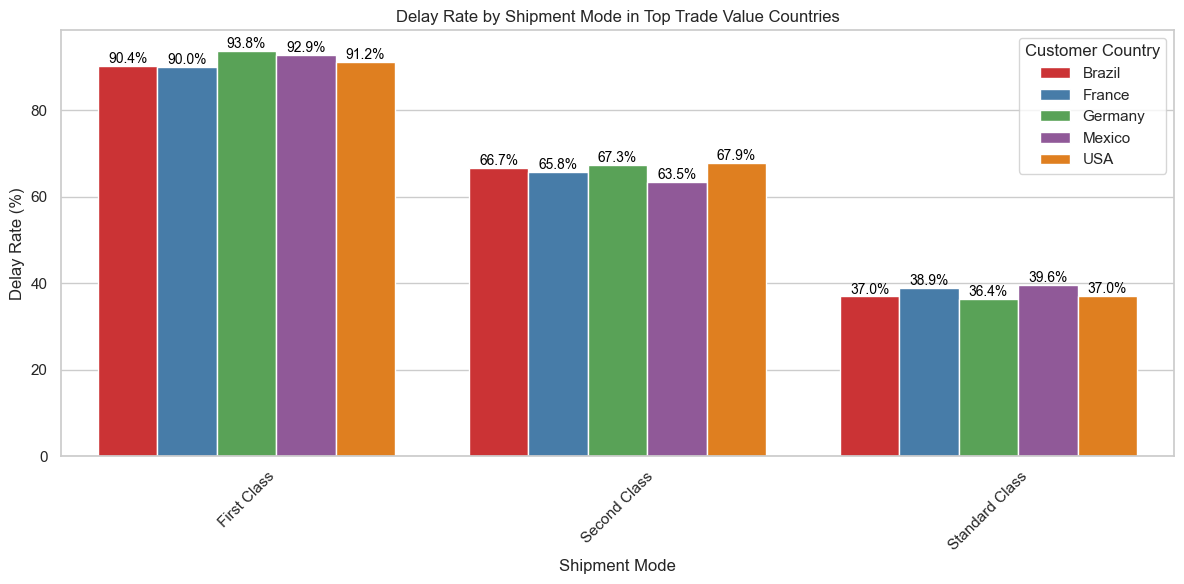

In [638]:
# Make a copy so original 'merged' isn’t modified
merged_copy = merged.copy()

# Identify top 5 countries by total trade value
top_countries = (
    merged_copy
    .groupby('Customer Country')['Trade (USD)']
    .sum()
    .nlargest(5)
    .index
)

# Filter data to only include top trade countries
merged_top = merged_copy[merged_copy['Customer Country'].isin(top_countries)]

# Group by Country and Shipment Mode to get delay stats
summary = (
    merged_top
    .groupby(['Customer Country', 'Shipment Mode'])
    .agg(
        Total_Shipments=('IsDelayed', 'count'),
        Delayed_Shipments=('IsDelayed', 'sum')
    )
    .reset_index()
)

# Compute Delay Rate %
summary['Delay Rate (%)'] = (
    summary['Delayed_Shipments'] / summary['Total_Shipments']
) * 100

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=summary,
    x='Shipment Mode',
    y='Delay Rate (%)',
    hue='Customer Country',
    palette='Set1'
)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(
            f'{height:,.1f}%',            # Format as percentage
            (p.get_x() + p.get_width()/2, height),  # At top-center of bar
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

# Customize and show the plot
plt.title('Delay Rate by Shipment Mode in Top Trade Value Countries')
plt.ylabel('Delay Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 4: How do trade values (USD) and gross sales differ between domestic shipments (warehouse country = customer country) and international shipments, and how do these patterns vary by product category and order year?
Columns involved:

Trade (USD)

Gross Sales

Warehouse Country

Customer Country

Product Category

Order Year

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\3554832759.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




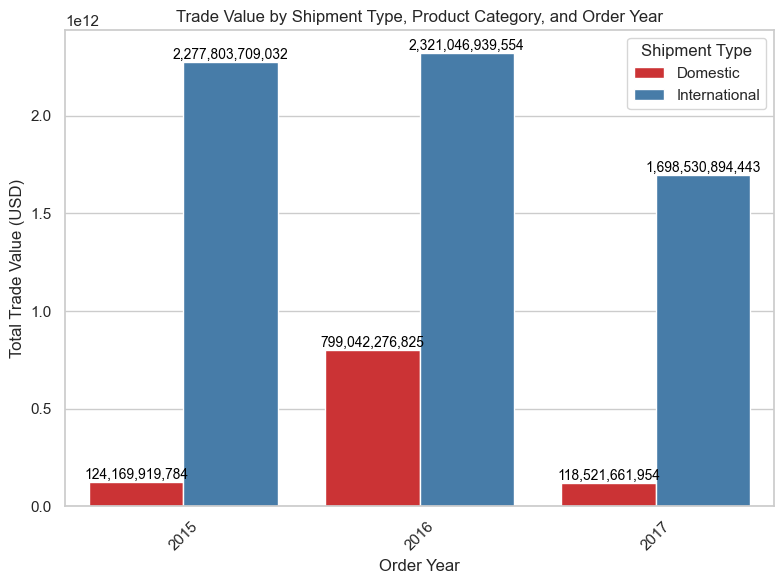

In [639]:
# Make a copy so original 'merged' isn’t modified
merged_copy = merged.copy()

# Adding Shipment Type based on Warehouse and Customer Country
merged_copy['Shipment Type'] = (
    merged_copy['Warehouse Country'] == merged_copy['Customer Country']
).map({True: 'Domestic', False: 'International'})

# Group data by Shipment Type, Product Category, and Order Year
summary = (
    merged_copy
    .groupby(['Shipment Type', 'Product Category', 'Order Year'])
    .agg(Total_Trade_Value=('Trade (USD)', 'sum'))
    .reset_index()
)

# Plot Trade Value by Shipment Type and Year
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary,
    x='Order Year',
    y='Total_Trade_Value',
    hue='Shipment Type',
    ci=None,
    palette='Set1'
)

# Add labels to each bar, but only for non-zero bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

# Customize and show the plot
plt.title('Trade Value by Shipment Type, Product Category, and Order Year')
plt.ylabel('Total Trade Value (USD)')
plt.xlabel('Order Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\2814815959.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




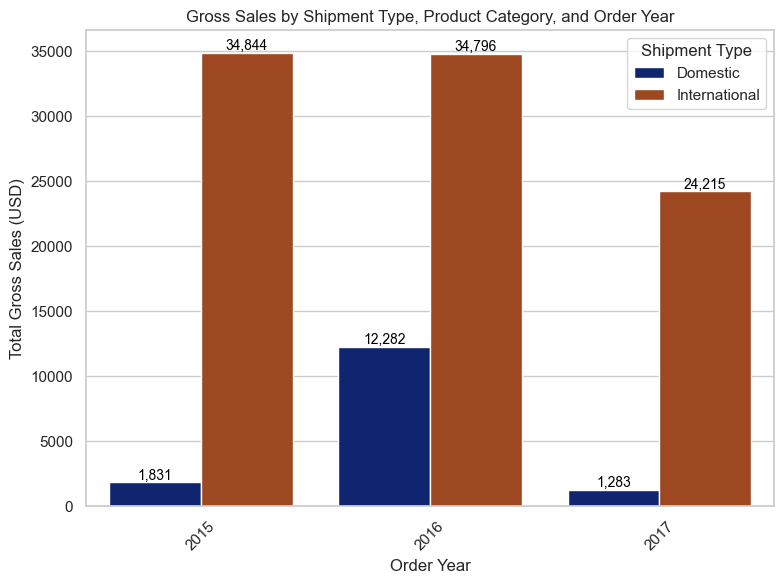

In [640]:
# Work on a copy so the original 'merged' remains intact
merged_copy = merged.copy()

# Ensure 'Shipment Type' exists (from previous step)
if 'Shipment Type' not in merged_copy:
    merged_copy['Shipment Type'] = (
        merged_copy['Warehouse Country'] == merged_copy['Customer Country']
    ).map({True: 'Domestic', False: 'International'})

# Group data by Shipment Type, Product Category, and Order Year
summary = (
    merged_copy
    .groupby(['Shipment Type', 'Product Category', 'Order Year'])
    .agg(
        Total_Trade_Value=('Trade (USD)', 'sum'),
        Total_Gross_Sales=('Gross Sales', 'sum')
    )
    .reset_index()
)

# Plot Gross Sales by Shipment Type, Product Category, and Order Year
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary,
    x='Order Year',
    y='Total_Gross_Sales',
    hue='Shipment Type',
    ci=None,
    palette='dark'
)

# Add labels to each bar (only for non-zero bars)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

# Customize and show the plot
plt.title('Gross Sales by Shipment Type, Product Category, and Order Year')
plt.ylabel('Total Gross Sales (USD)')
plt.xlabel('Order Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 5: How do order quantities correlate with the day of the week on which shipments occur and with shipment weights, and how do these factors collectively influence profitability for different product categories?
Columns involved:

Order Quantity

Shipment Day

Weight (kg)

Profit

Product Category

In [641]:
# Work on a copy so the original 'merged' remains unchanged
merged_copy = merged.copy()

# Convert Shipment Date to datetime and extract weekday name
merged_copy['Shipment Date'] = pd.to_datetime(merged_copy['Shipment Date'], errors='coerce')
merged_copy['Shipment Weekday'] = merged_copy['Shipment Date'].dt.day_name()

# Preview the new columns
preview_weekday = merged_copy[['Shipment Date', 'Shipment Weekday']].dropna().head()
print(preview_weekday)

  Shipment Date Shipment Weekday
0    2015-02-27           Friday
1    2015-04-06           Monday
2    2015-06-12           Friday
3    2015-06-12           Friday
4    2015-06-12           Friday


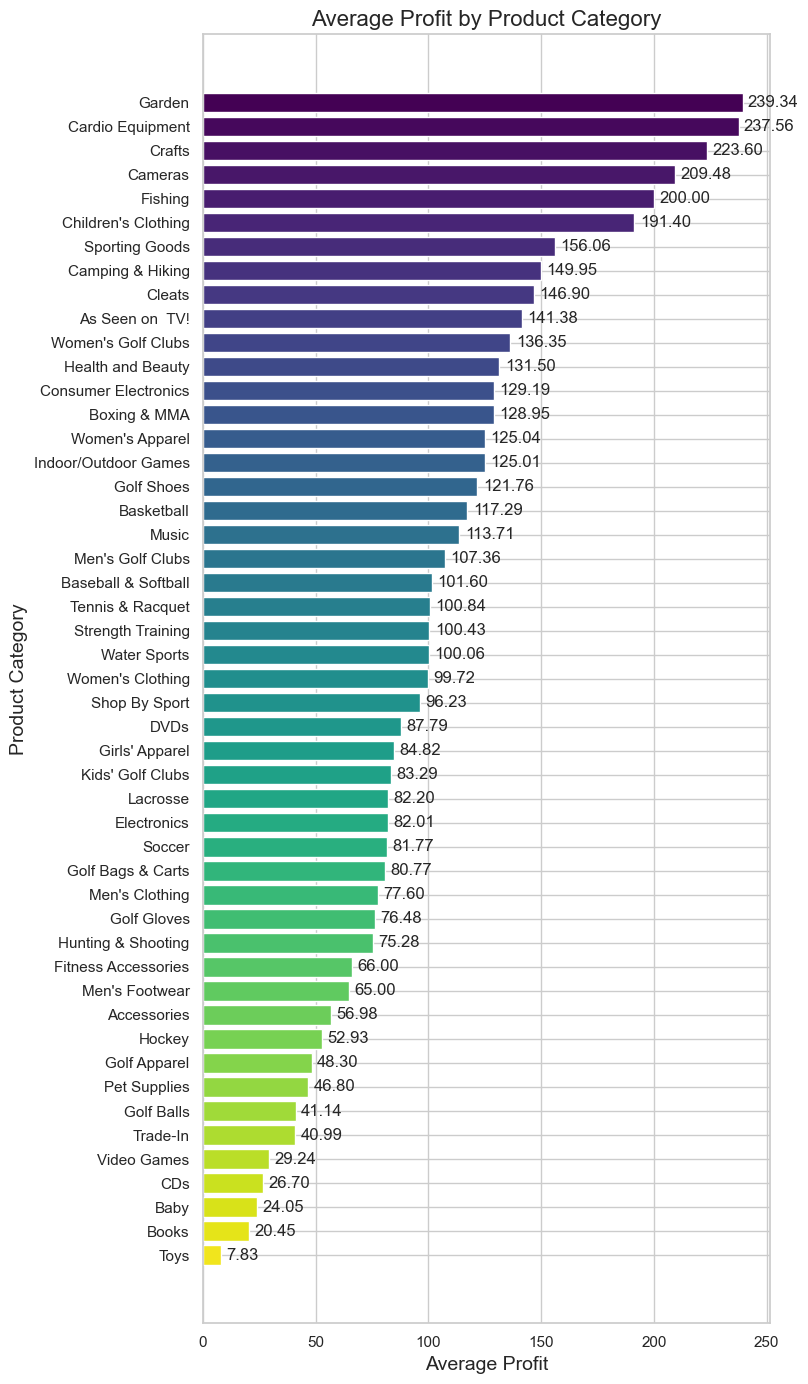

In [642]:
# Compute average profit by product category, sorted descending
avg_profit = merged.groupby('Product Category')['Profit'].mean().sort_values(ascending=False)
categories = avg_profit.index.tolist()
profits = avg_profit.values.tolist()

# Generate colors from the viridis colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(profits)) for i in range(len(profits))]

# Create figure with extra space
plt.figure(figsize=(12,14))
bars = plt.barh(categories, profits, color=colors)
plt.xlabel('Average Profit', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.title('Average Profit by Product Category', fontsize=16)
plt.gca().invert_yaxis()

# Add labels at end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(profits)*0.01,  # slight offset to the right
        bar.get_y() + bar.get_height()/2,
        '{:.2f}'.format(width),
        va='center', fontsize=12
    )

plt.tight_layout()
plt.subplots_adjust(left=0.5)
plt.show()

Question 6: How do orders with the highest trade (USD) values compare to those with the lowest trade values in terms of product department, customer market, and profitability (gross sales vs profit)? Note: get the mean and below the mean low abouve is high
Columns involved:

Trade (USD)

Product Department

Customer Market

Gross Sales

Profit

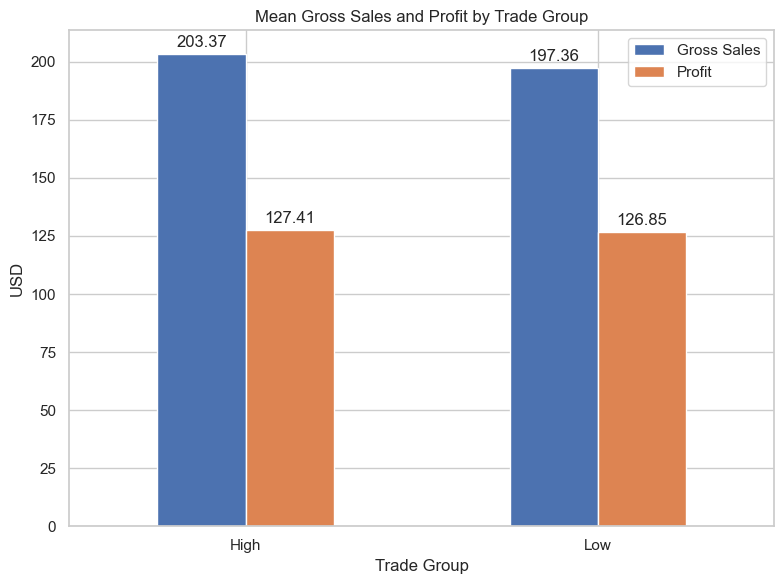

In [643]:
# Work on a copy so the original 'merged' stays intact
merged_copy = merged.copy()

# 1. Create your binary Trade Group
mean_trade = merged_copy['Trade (USD)'].mean()
merged_copy['Trade Group'] = merged_copy['Trade (USD)'] > mean_trade

# 2. Identify the columns via regex
pattern = r'Gross Sales|Profit'
cols_to_plot = merged_copy.filter(regex=pattern).columns

# 3. Group & take mean *only* on those columns
profit_sales = (
    merged_copy
    .groupby(merged_copy['Trade Group'].map({True: 'High', False: 'Low'}))[cols_to_plot]
    .mean()
)

# 4. Plot
ax = profit_sales.plot(kind='bar', figsize=(8, 6), rot=0)

# 5. Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

ax.set_ylabel('USD')
ax.set_title('Mean Gross Sales and Profit by Trade Group')
plt.tight_layout()
plt.show()


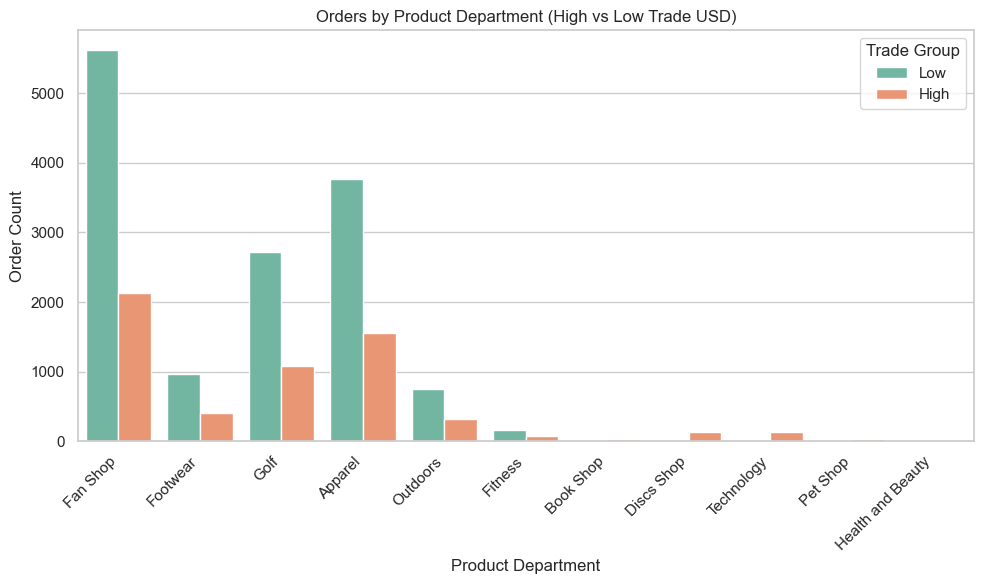

In [644]:
# Work on a copy so the original 'merged' stays intact
merged_copy = merged.copy()

# Ensure 'Trade Group' exists and create a label column for hue
if 'Trade Group' not in merged_copy:
    mean_trade = merged_copy['Trade (USD)'].mean()
    merged_copy['Trade Group'] = merged_copy['Trade (USD)'] > mean_trade
merged_copy['Trade Group Label'] = merged_copy['Trade Group'].map({True: 'High', False: 'Low'})

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_copy,
    x='Product Department',
    hue='Trade Group Label',
    palette='Set2'
)
plt.title('Orders by Product Department (High vs Low Trade USD)')
plt.xlabel('Product Department')
plt.ylabel('Order Count')
plt.legend(title='Trade Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

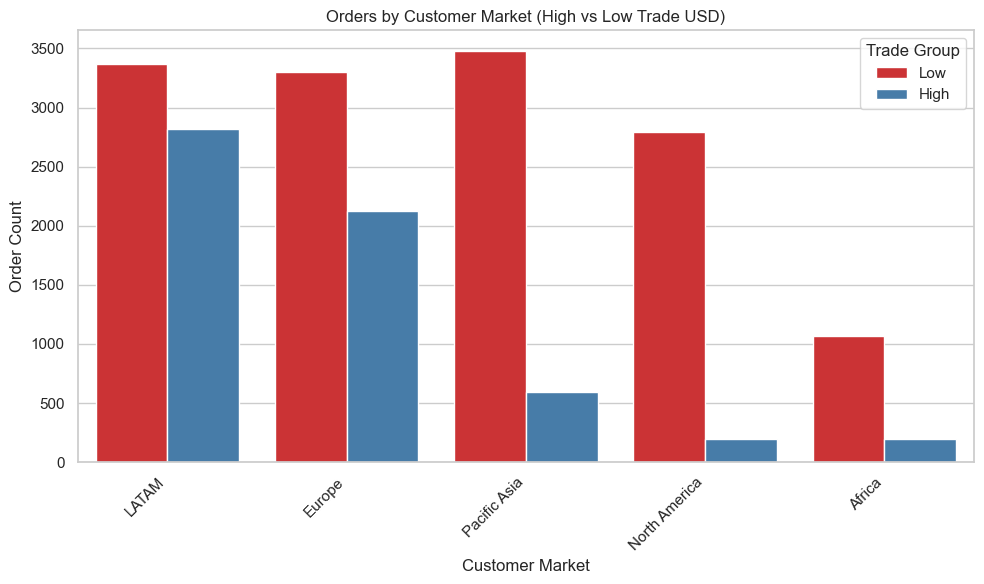

In [645]:
# Work on a copy so the original 'merged' stays intact
merged_copy = merged.copy()

# Ensure 'Trade Group' and its labels exist
if 'Trade Group' not in merged_copy:
    mean_trade = merged_copy['Trade (USD)'].mean()
    merged_copy['Trade Group'] = merged_copy['Trade (USD)'] > mean_trade
merged_copy['Trade Group Label'] = merged_copy['Trade Group'].map({True: 'High', False: 'Low'})

# Plot Orders by Customer Market
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_copy,
    x='Customer Market',
    hue='Trade Group Label',
    palette='Set1'
)
plt.title('Orders by Customer Market (High vs Low Trade USD)')
plt.xlabel('Customer Market')
plt.ylabel('Order Count')
plt.legend(title='Trade Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Question 7: Which regions have shifted from high-quantity to high-value imports for specific commodities across years?
(Columns: Customer Region, Year, Quantity, Trade (USD), Commodity)

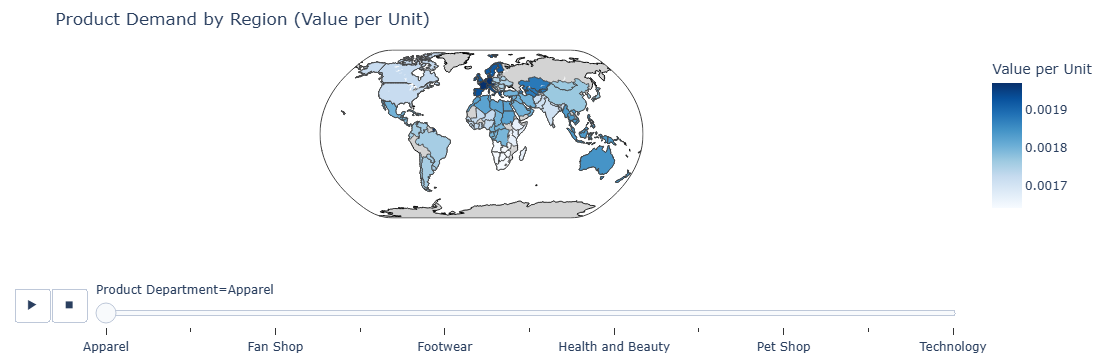

In [647]:
# Make a working copy so the original 'merged' stays intact
merged_copy = merged.copy()

# Step 1: Filter out zero quantity to avoid division by zero
merged_copy = merged_copy[merged_copy['Quantity'] != 0]

# Step 2: Compute 'Value per Unit'
merged_copy['Value per Unit'] = merged_copy['Gross Sales'] / merged_copy['Quantity']

# Step 3: Drop rows with missing critical data
merged_copy = merged_copy.dropna(subset=['Customer Region', 'Product Department', 'Value per Unit'])

# Step 4: Full region-to-country mapping
region_to_countries = {
    'Central America': ['Mexico', 'Guatemala', 'Panama', 'Cuba', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Honduras'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Perú', 'Venezuela', 'Uruguay', 'Ecuador', 'Paraguay', 'French Guiana'],
    'Northern Europe': ['Denmark', 'Sweden', 'Ireland', 'Finland', 'Norway', 'United Kingdom'],
    'Western Europe': ['Netherlands', 'France', 'Germany', 'Belgium', 'Switzerland', 'Austria'],
    'Eastern Asia': ['China', 'Japan', 'South Korea', 'Hong Kong', 'Taiwan', 'Mongolia'],
    'Southeast Asia': ['Indonesia', 'Vietnam', 'Malaysia', 'Singapore', 'Thailand', 'Cambodia', 'Myanmar', 'Philippines', 'Papua New Guinea'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Afghanistan'],
    'US Center': ['USA'], 'West of USA': ['USA'], 'East of USA': ['USA'], 'South of  USA': ['USA'],
    'Eastern Europe': ['Poland', 'Romania', 'Ukraine', 'Hungary', 'Belarus', 'Bulgaria', 'Czech Republic (Czechia)', 'Slovakia', 'Croatia', 'Moldova', 'Lithuania', 'Estonia', 'Bosnia and Herzegovina', 'Albania', 'Montenegro'],
    'North Africa': ['Egypt', 'Sudan', 'Algeria', 'Morocco', 'Tunisia', 'Libya'],
    'Central Africa': ['Democratic Republic of Congo', 'Republic of Congo', 'Cameroon', 'Gabon', 'Chad', 'Central African Republic'],
    'West Africa': ['Nigeria', 'Ghana', 'Ivory Coast', 'Togo', 'Benín', 'Mali', 'Senegal', 'Guinea', 'Sierra Leone', 'Liberia', 'Niger', 'Guinea-Bissau', 'Gambia'],
    'East Africa': ['Kenya', 'Ethiopia', 'Tanzania', 'Uganda', 'Rwanda', 'Somalia', 'Madagascar'],
    'Caribbean': ['Dominican Republic', 'Haiti', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Martinique', 'Guadalupe'],
    'Southern Europe': ['Italy', 'Spain', 'Portugal', 'Greece'],
    'West Asia': ['Turkey', 'Iran', 'Iraq', 'Israel', 'Saudi Arabia', 'Syria', 'Jordan', 'Lebanon', 'Qatar', 'UAE', 'Oman'],
    'Southern Africa': ['South Africa', 'Namibia', 'Botswana', 'Zimbabwe', 'Zambia', 'Angola', 'Lesotho'],
    'Oceania': ['Australia', 'New Zealand'],
    'Central Asia': ['Uzbekistan', 'Kazakhstan', 'Turkmenistan', 'Kyrgyzstan', 'Azerbaijan'],
    'Canada': ['Canada']
}

# Step 5: Map regions to list of countries
merged_copy['Mapped Countries'] = merged_copy['Customer Region'].map(region_to_countries)

# Step 6: Remove any rows where the region wasn’t in your mapping dict
merged_copy = merged_copy.dropna(subset=['Mapped Countries'])

# Step 6b: Drop any duplicate columns so that explode() will work
merged_copy = merged_copy.loc[:, ~merged_copy.columns.duplicated()]

# Step 7: Explode so each country gets its own row
merged_copy = merged_copy.explode('Mapped Countries')
merged_copy['Mapped Region'] = merged_copy['Mapped Countries']
merged_copy = merged_copy.drop(columns=['Mapped Countries'])

# Step 8: Group by country, original region, and department
grouped = (
    merged_copy
    .groupby(['Mapped Region', 'Customer Region', 'Product Department'], as_index=False)
    [['Value per Unit']]
    .mean()
)

# Step 9: Build the animated choropleth
fig = px.choropleth(
    grouped,
    locations='Mapped Region',
    locationmode='country names',
    color='Value per Unit',
    hover_name='Customer Region',
    animation_frame='Product Department',
    color_continuous_scale='Blues',
    title='Product Demand by Region (Value per Unit)',
    labels={'Value per Unit': 'Value per Unit (USD)'}
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    projection_type="natural earth"
)
fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Value per Unit")
)

# Step 10: Show the figure
fig.show()

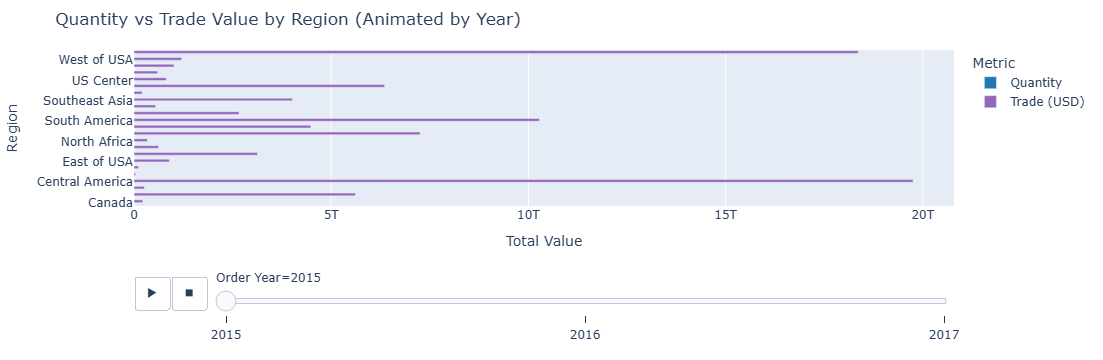

In [648]:
# Work on a copy so the original 'merged' stays intact
merged_copy = merged.copy()

# Step 1: Aggregate totals
bar_data = (
    merged_copy
    .groupby(['Customer Region', 'Order Year'], as_index=False)
    .agg({
        'Quantity': 'sum',
        'Trade (USD)': 'sum'
    })
)

# Step 2: Reshape to long format
bar_data_melted = bar_data.melt(
    id_vars=['Customer Region', 'Order Year'],
    value_vars=['Quantity', 'Trade (USD)'],
    var_name='Metric',
    value_name='Value'
)

# Step 3: Build the chart
fig = px.bar(
    bar_data_melted,
    y='Customer Region',
    x='Value',
    color='Metric',
    animation_frame='Order Year',
    barmode='group',
    orientation='h',
    title='Quantity vs Trade Value by Region (Animated by Year)',
    labels={'Value': 'Total', 'Customer Region': 'Region'},
    color_discrete_sequence=['#1f77b4', '#9467bd']
)

# Step 4: Set delay using animation options
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2500  # 2.5s per frame
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 700

# Step 5: Style
fig.update_layout(
    height=700,
    margin={"r": 20, "t": 50, "l": 100, "b": 80},
    xaxis_title="Total Value",
    yaxis_title="Region"
)

# Step 6: Show the figure
fig.show()


Question 8: Comparison of discount strategies across regions with different trade capacities
Features:

Customer Region

Discount %

Trade (USD)

Gross Sales

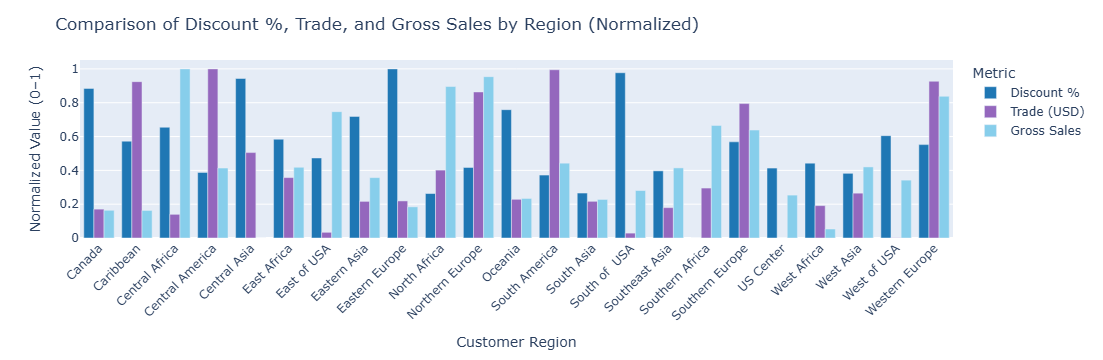

In [650]:
from sklearn.preprocessing import MinMaxScaler

# Make a copy so original 'merged' stays untouched
df = merged.copy()

# Clean numeric columns
def clean_numeric(col):
    return pd.to_numeric(df[col].astype(str).str.extract(r'([-+]?\d*\.?\d+)')[0], errors='coerce')

df["Discount %"] = clean_numeric("Discount %")
df["Trade (USD)"] = clean_numeric("Trade (USD)")
df["Gross Sales"] = clean_numeric("Gross Sales")

# Drop rows with missing essential data
df = df.dropna(subset=["Customer Region", "Discount %", "Trade (USD)", "Gross Sales"])

# Group and compute mean
grouped = df.groupby("Customer Region")[["Discount %", "Trade (USD)", "Gross Sales"]].mean().reset_index()

# Keep raw values for hover info
melted_raw = grouped.melt(id_vars="Customer Region", var_name="Metric", value_name="Actual Value")

# Normalize the metric columns
scaler = MinMaxScaler()
grouped_scaled = grouped.copy()
grouped_scaled[["Discount %", "Trade (USD)", "Gross Sales"]] = scaler.fit_transform(
    grouped[["Discount %", "Trade (USD)", "Gross Sales"]])

# Reshape normalized data
melted_scaled = grouped_scaled.melt(id_vars="Customer Region", var_name="Metric", value_name="Normalized Value")

# Merge normalized with actual values
merged_plot = melted_scaled.copy()
merged_plot["Actual Value"] = melted_raw["Actual Value"]

# Custom color palette
custom_colors = {
    "Discount %": "#1f77b4",    # Blue
    "Trade (USD)": "#9467bd",   # Purple
    "Gross Sales": "#87CEEB"    # Sky blue
}

# Build the plot
fig = px.bar(
    merged_plot,
    x="Customer Region",
    y="Normalized Value",
    color="Metric",
    barmode="group",
    color_discrete_map=custom_colors,
    hover_data={"Actual Value": True, "Normalized Value": False}
)

# Style
fig.update_layout(
    title="Comparison of Discount %, Trade, and Gross Sales by Region (Normalized)",
    xaxis_title="Customer Region",
    yaxis_title="Normalized Value (0–1)",
    xaxis_tickangle=-45,
    height=600
)

fig.show()


Question 9: Which product departments have the highest trade value per kilogram across different countries or areas and years?
(Columns: Product Department, Trade (USD), Weight (kg), Country or Area, Year)

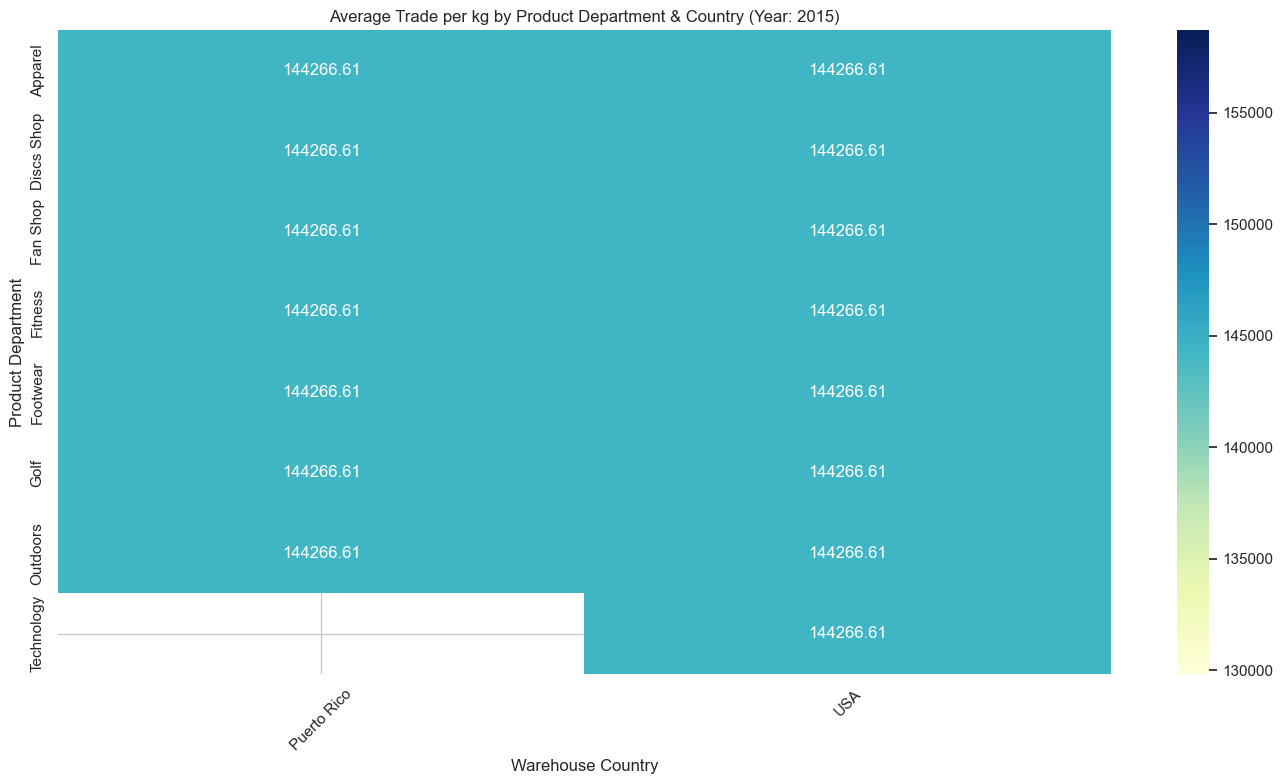

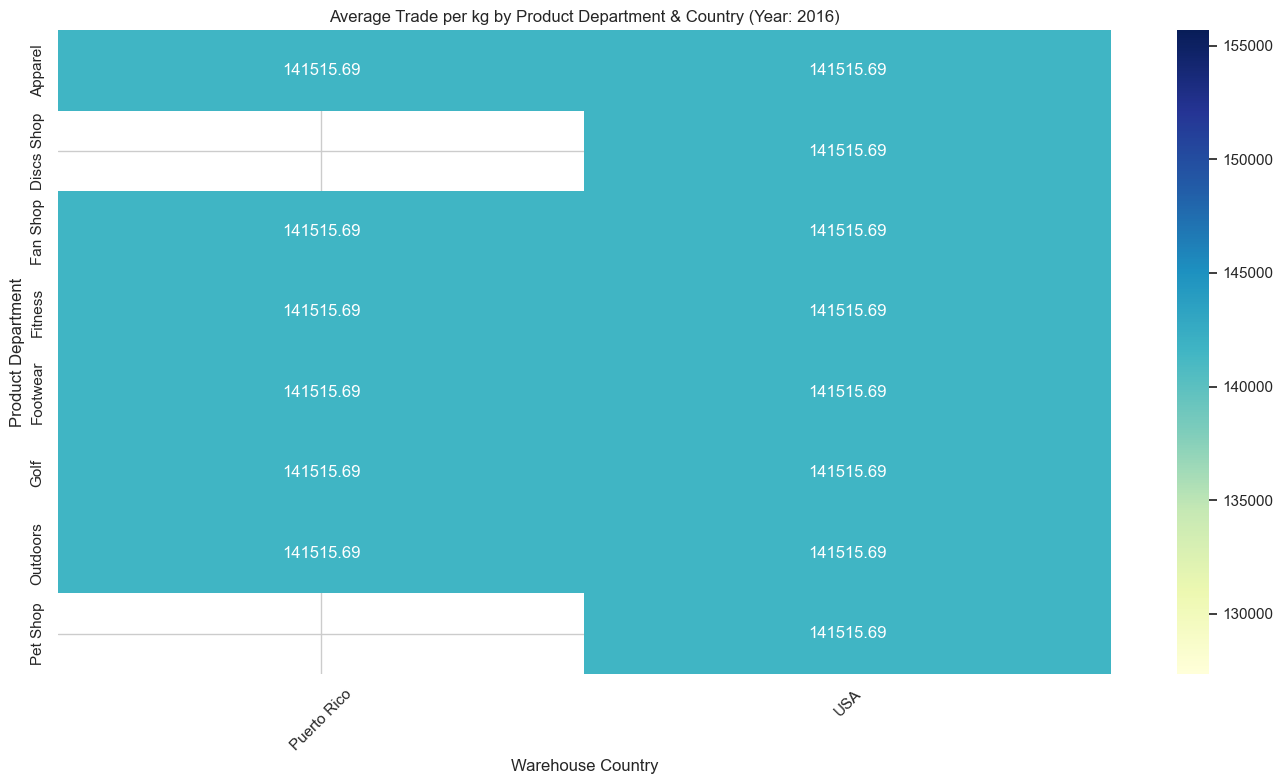

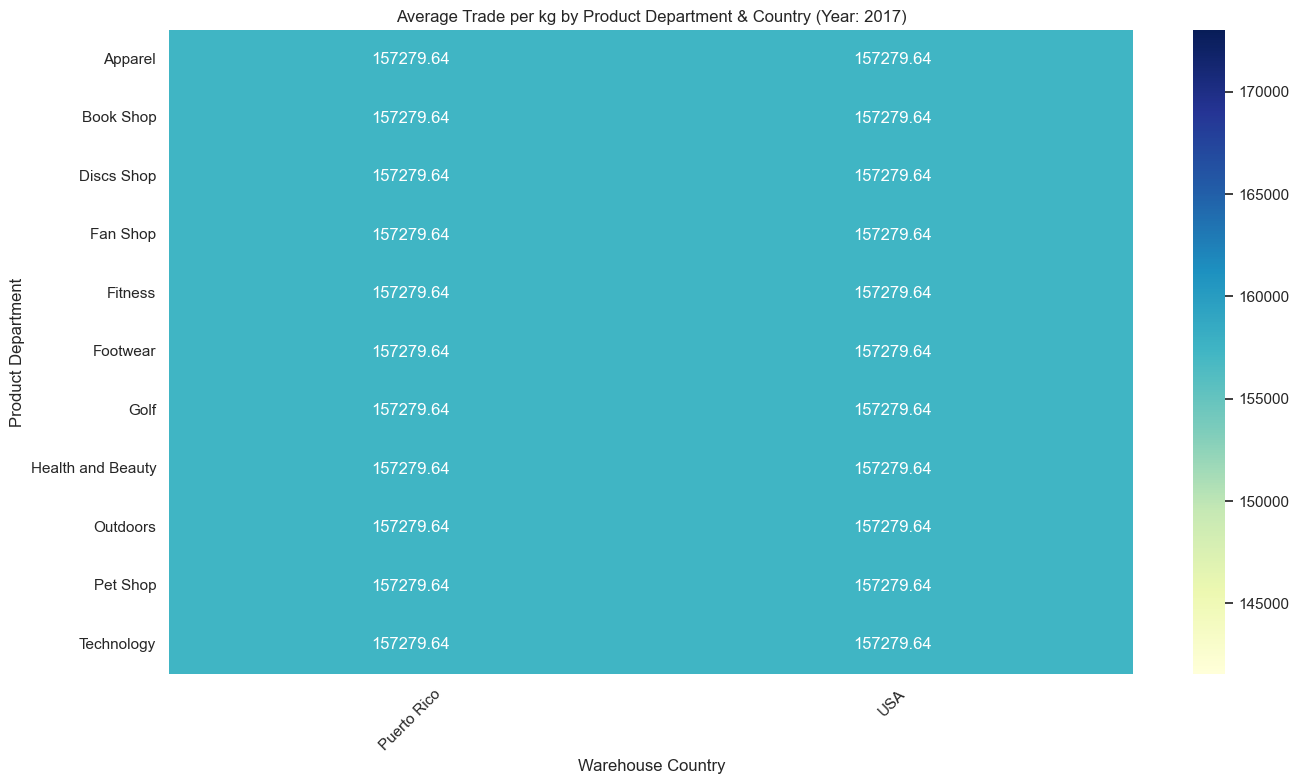

In [655]:
# Work on a copy to preserve the original merged DataFrame
merged_copy = merged.copy()

# Calculate Trade per kg
merged_copy['Trade per kg'] = merged_copy['Trade (USD)'] / merged_copy['Weight (kg)']

# Group by Product Department, Warehouse Country, and Order Year
grouped = (
    merged_copy
    .groupby(['Product Department', 'Warehouse Country', 'Order Year'])['Trade per kg']
    .mean()
    .reset_index()
)

# Get unique years
years = grouped['Order Year'].unique()

# Plot a heatmap for each year
for year in sorted(years):
    yearly_data = grouped[grouped['Order Year'] == year]
    pivot = yearly_data.pivot(
        index='Product Department',
        columns='Warehouse Country',
        values='Trade per kg'
    )

    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f'Average Trade per kg by Product Department & Country (Year: {year})')
    plt.xlabel('Warehouse Country')
    plt.ylabel('Product Department')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Question 10: Which customer countries consistently order high-quantity, low-profit products that also have low trade value?
(Columns: Customer Country, Quantity, Profit, Trade (USD), Product Name)

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\1206702025.py:34: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



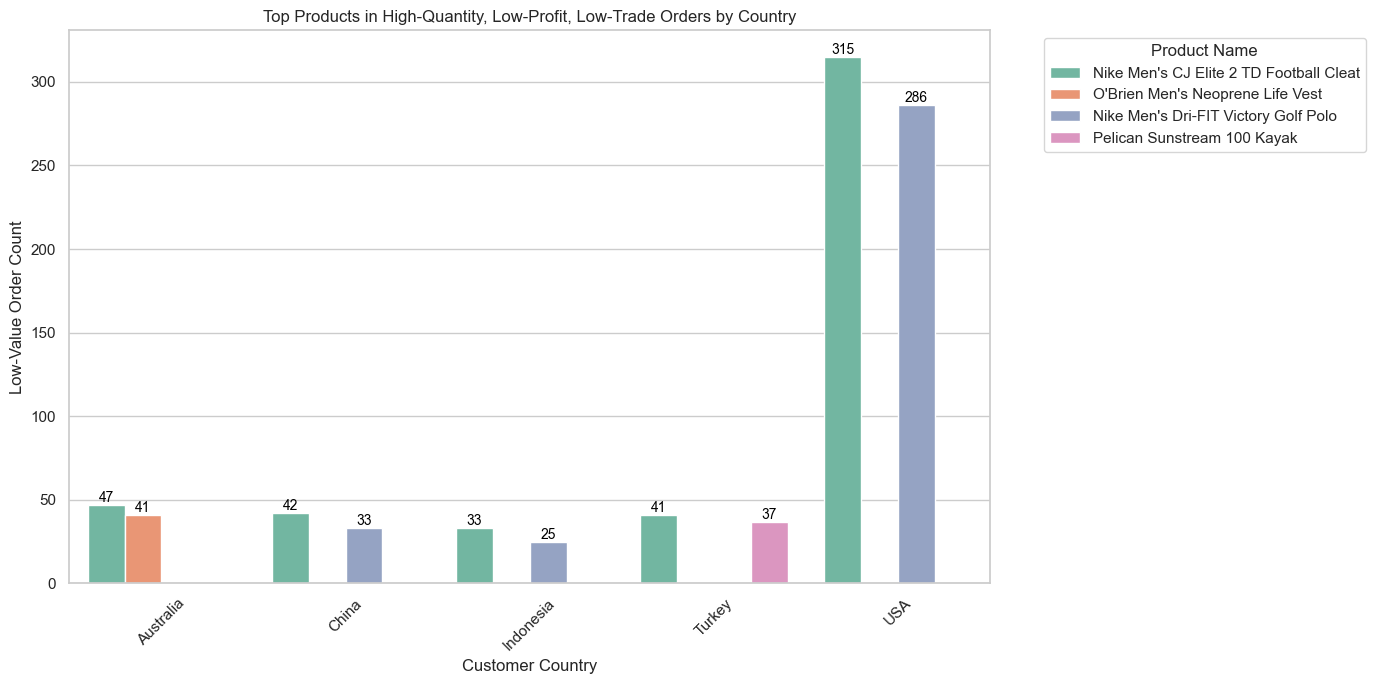

In [654]:
# Work on a copy to avoid altering the original DataFrame
merged_copy = merged.copy()

# Define thresholds
high_quantity_thresh = merged_copy['Quantity'].quantile(0.5)
low_profit_thresh = merged_copy['Profit'].quantile(0.5)
low_trade_thresh = merged_copy['Trade (USD)'].quantile(0.5)

# Filter dataset
filtered = merged_copy[
    (merged_copy['Quantity'] >= high_quantity_thresh) &
    (merged_copy['Profit'] <= low_profit_thresh) &
    (merged_copy['Trade (USD)'] <= low_trade_thresh)
]

# Group by Customer Country and Product Name
grouped = filtered.groupby(['Customer Country', 'Product Name']).size().reset_index(name='LowValueOrderCount')

# Get top 5 countries by total low-value order count
top_countries = (
    grouped.groupby('Customer Country')['LowValueOrderCount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter to just top countries
filtered_top = grouped[grouped['Customer Country'].isin(top_countries)]

# Get top 2 products per country
top_products = (
    filtered_top.groupby('Customer Country', group_keys=False)
    .apply(lambda x: x.sort_values('LowValueOrderCount', ascending=False).head(2))
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=top_products,
    x='Customer Country',
    y='LowValueOrderCount',
    hue='Product Name',
    palette='Set2'
)

plt.title('Top Products in High-Quantity, Low-Profit, Low-Trade Orders by Country')
plt.xlabel('Customer Country')
plt.ylabel('Low-Value Order Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Hypothesis and Testing

**H1** Alternate Hypothesis: Shipments weighing more than the average weight (91,085 kg) are more likely to be labeled Second class than First class.

**H0** Null Hypothesis: There is no difference in the likelihood of being labeled Second class versus First class for shipments above or below the average weight (91,085 kg).

significase = 5%

In [656]:
weight_mean = merged['Weight (kg)'].mean()
weight_mean_rounded = round(weight_mean)
print(weight_mean_rounded)

91088


In [657]:
# Define the average threshold
threshold = 91085

# Create a categorical column: 'Heavy' or 'Light'
merged['Weight Category'] = merged['Weight (kg)'].apply(
    lambda x: 'Heavy' if x > threshold else 'Light'
)

# Preparing DF

In [658]:
rows = merged['Weight Category'].unique()
cols = merged['Shipment Mode'].unique()

In [659]:
matrix = []
for i in rows:
    row = []
    for j in cols:
        count = len(merged[(merged['Weight Category'] == i) & (merged['Shipment Mode'] == j)])
        row.append(count)
    matrix.append(row)

# Optionally print the matrix
print("Rows: Weight Category (", rows, ")")
print("Cols: Shipment Mode (", cols, ")")
print("Matrix (counts):")
for r in matrix:
    print(r)

Rows: Weight Category ( ['Light' 'Heavy'] )
Cols: Shipment Mode ( ['Standard Class' 'First Class' 'Second Class'] )
Matrix (counts):
[4222, 1158, 1453]
[8136, 2220, 2751]


In [660]:
pd.DataFrame(matrix,index=rows,columns=cols)

Standard Class  First Class  Second Class
Light            4222         1158          1453
Heavy            8136         2220          2751

In [661]:
# Creating a dataframe
observedValues=pd.DataFrame(matrix,index=rows,columns=cols)

In [662]:
total_y = observedValues.sum()

In [663]:
observedValues.loc['Total']=observedValues.sum()

In [664]:
observedValues

Standard Class  First Class  Second Class
Light            4222         1158          1453
Heavy            8136         2220          2751
Total           12358         3378          4204

In [665]:
## Then sum with axis =1 to sum 
observedValues['Total']=observedValues.sum(axis=1)

In [666]:
observedValues

Standard Class  First Class  Second Class  Total
Light            4222         1158          1453   6833
Heavy            8136         2220          2751  13107
Total           12358         3378          4204  19940

## Step2: Calculate expected frequency data

In [667]:
## An Illustration
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        print(observedValues.loc[i,'Total'])
        print(observedValues.loc['Total',j])
        print(observedValues.loc['Total','Total'])
        break
    break

6833
12358
19940


In [668]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(observedValues.loc[i,'Total']*observedValues.loc['Total',j])/observedValues.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[4234.815145436309, 1157.5663991975928, 1440.6184553660983],
 [8123.184854563691, 2220.433600802407, 2763.3815446339017]]

In [669]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

Standard Class  First Class  Second Class
Light     4234.815145  1157.566399   1440.618455
Heavy     8123.184855  2220.433601   2763.381545

In [670]:
observedValues.drop('Total',axis=1,inplace=True)
observedValues.drop('Total',axis=0,inplace=True)

In [671]:
observedValues

Standard Class  First Class  Second Class
Light            4222         1158          1453
Heavy            8136         2220          2751

### Determine Degrees of Freedom

In [672]:
expectedF.shape

(2, 3)

In [673]:
freeDom=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
freeDom

2

### Calculate the chi square

In [674]:
observedValues.values.flatten()

array([4222, 1158, 1453, 8136, 2220, 2751], dtype=int64)

In [675]:
chiScoreTable=pd.DataFrame(observedValues.values.flatten(),columns=['O'])
chiScoreTable

O
0  4222
1  1158
2  1453
3  8136
4  2220
5  2751

In [676]:
## Let's add Expected value
chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

O            E
0  4222  4234.815145
1  1158  1157.566399
2  1453  1440.618455
3  8136  8123.184855
4  2220  2220.433601
5  2751  2763.381545

In [677]:
## Let's calculate O-E
chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

O            E        O-E
0  4222  4234.815145 -12.815145
1  1158  1157.566399   0.433601
2  1453  1440.618455  12.381545
3  8136  8123.184855  12.815145
4  2220  2220.433601  -0.433601
5  2751  2763.381545 -12.381545

In [678]:
## Let's calculate (O-E)^2
chiScoreTable['(O-E)^2']=chiScoreTable['O-E']**2
chiScoreTable

O            E        O-E     (O-E)^2
0  4222  4234.815145 -12.815145  164.227953
1  1158  1157.566399   0.433601    0.188010
2  1453  1440.618455  12.381545  153.302648
3  8136  8123.184855  12.815145  164.227953
4  2220  2220.433601  -0.433601    0.188010
5  2751  2763.381545 -12.381545  153.302648

In [679]:
## Let's calculate ((O-E)^2)\E
chiScoreTable['((O-E)^2)\E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

<>:2: SyntaxWarning:

invalid escape sequence '\E'

<>:2: SyntaxWarning:

invalid escape sequence '\E'

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\3929198520.py:2: SyntaxWarning:

invalid escape sequence '\E'



O            E        O-E     (O-E)^2  ((O-E)^2)\E
0  4222  4234.815145 -12.815145  164.227953     0.038780
1  1158  1157.566399   0.433601    0.188010     0.000162
2  1453  1440.618455  12.381545  153.302648     0.106414
3  8136  8123.184855  12.815145  164.227953     0.020217
4  2220  2220.433601  -0.433601    0.188010     0.000085
5  2751  2763.381545 -12.381545  153.302648     0.055476

In [680]:
chiScore=chiScoreTable['((O-E)^2)\E'].sum()
chiScore

<>:1: SyntaxWarning:

invalid escape sequence '\E'

<>:1: SyntaxWarning:

invalid escape sequence '\E'

C:\Users\DELL\AppData\Local\Temp\ipykernel_31096\480349939.py:1: SyntaxWarning:

invalid escape sequence '\E'



0.22113564482253625

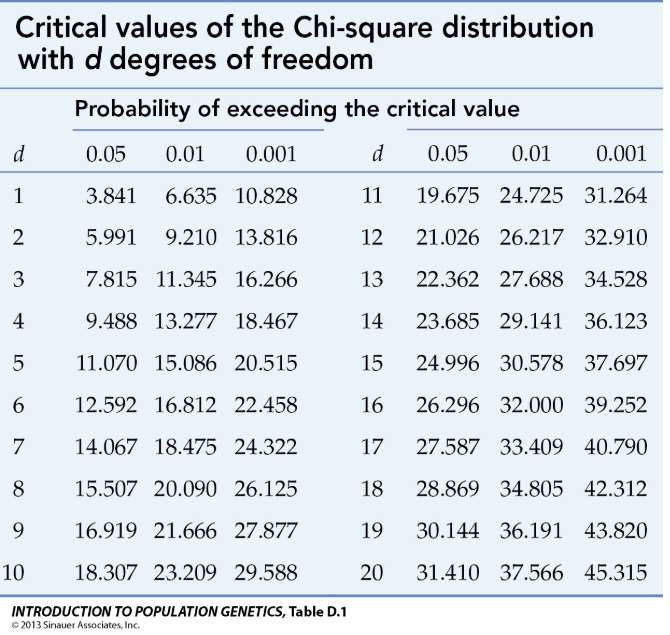

In [683]:
from scipy.stats import chi2

deg_f = 2
sig = 0.05

chi2.ppf(1-sig, deg_f)

5.991464547107979

# Final Answer: 
since the chi score is less than the tabular value then the null hypothesis is Accepted